In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Desktop/ml-100k/u.data',sep='\t',header=None,names=['user_id','item_id','rating','timestamp'])
df.head()

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [2]:
df = df.drop('timestamp',axis=1)
df.head()

user_id  item_id  rating
0      196      242       3
1      186      302       3
2       22      377       1
3      244       51       2
4      166      346       1

In [3]:
# one_hot encoding tous xristes
df_one_hot = pd.get_dummies(df,columns=['user_id'])
df_one_hot.head()

item_id  rating  user_id_1  user_id_2  user_id_3  user_id_4  user_id_5  \
0      242       3          0          0          0          0          0   
1      302       3          0          0          0          0          0   
2      377       1          0          0          0          0          0   
3       51       2          0          0          0          0          0   
4      346       1          0          0          0          0          0   

   user_id_6  user_id_7  user_id_8  ...  user_id_934  user_id_935  \
0          0          0          0  ...            0            0   
1          0          0          0  ...            0            0   
2          0          0          0  ...            0            0   
3          0          0          0  ...            0            0   
4          0          0          0  ...            0            0   

   user_id_936  user_id_937  user_id_938  user_id_939  user_id_940  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   user_id_941  user_id_942  user_id_943  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0  

[5 rows x 945 columns]

In [4]:
# krataw ston pinaka pou einai one hot tis stilles me tous xristes
users = df_one_hot.iloc[0:943,2:]
users.head()

user_id_1  user_id_2  user_id_3  user_id_4  user_id_5  user_id_6  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   user_id_7  user_id_8  user_id_9  user_id_10  ...  user_id_934  user_id_935  \
0          0          0          0           0  ...            0            0   
1          0          0          0           0  ...            0            0   
2          0          0          0           0  ...            0            0   
3          0          0          0           0  ...            0            0   
4          0          0          0           0  ...            0            0   

   user_id_936  user_id_937  user_id_938  user_id_939  user_id_940  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   user_id_941  user_id_942  user_id_943  
0            0            0            0  
1            0            0            0  
2            0            0            0  
3            0            0            0  
4            0            0            0  

[5 rows x 943 columns]

In [5]:
ratings = df.pivot(index='user_id',columns='item_id',values='rating')
ratings.head()

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

item_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                              
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 1682 columns]

Κώδικας που αφορόυσε στο κεντράρισμα των δεδομένων:

In [6]:
ratings_centered = ratings.subtract(ratings.mean(axis=1))
ratings_centered.head()

1         2         3         4         5         6         7     \
user_id                                                                         
1        1.389706 -0.709677  1.203704 -1.333333  0.125714  1.364929  0.034739   
2        0.389706       NaN       NaN       NaN       NaN       NaN       NaN   
3             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5        0.389706 -0.709677       NaN       NaN       NaN       NaN       NaN   

            8         9         10    ...  1673  1674  1675  1676  1677  1678  \
user_id                               ...                                       
1       -2.79661  0.727273 -1.206522  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2            NaN       NaN -2.206522  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3            NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4            NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
5            NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

         1679  1680  1681  1682  
user_id                          
1         NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN  

[5 rows x 1682 columns]

Κώδικας που αφορούσε στην αντικατάσταση των ελειπών τιμών με την μέση τιμή του διανύσματος αξιολόγησης:

In [ ]:
m = ratings.mean(axis=1)
for i, col in enumerate(ratings):
    ratings.iloc[:,i] = ratings.iloc[:,i].fillna(m)
ratings.head()

Αντικαθιστώ κάθε τιμή που λείπει με το 0

In [6]:
ratings = ratings.fillna(0)
ratings.head()

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         4.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

item_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                              
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1682 columns]

Κώδικας που αφορούσε στην κανονικοποίηση των δεδομένων:

In [78]:
from sklearn import preprocessing
# ratings_normalized = preprocessing.normalize(ratings,norm='l2') # kathe dianisma kanonikopoieitai kai to dot prosomoiazei cos-similarity
# ratings_normalized
scaler = preprocessing.StandardScaler()
ratings_scaled = scaler.fit_transform(ratings)
# --------------------------
min_max_scaler = preprocessing.MinMaxScaler()
ratings_scaled = min_max_scaler.fit_transform(ratings)
ratings_scaled

array([[1. , 0.6, 0.8, ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ]])

In [7]:
Y = np.array(ratings) # target- mitrwo me aksiologiseis xristwn gia kathe tainia
print(Y.shape)
X = np.array(users) # input - mitrwo me tous xristes se one hot encoding
X.shape

(943, 1682)


(943, 943)

##### Στη συνέχεια υλοποιούνται τα ζητούμενα...
###### Για κάθε υποερώτημα μπορείτε να δείτε αναλυτικά κάτω απο κάθε cell τις τιμές των μετρικών για κάθε fold ξεχωριστά 

### Α2.ΕΠΙΛΟΓΗ ΑΡΧΙΤΕΚΤΟΝΙΚΗΣ

Πρώτη δοκιμή με 10 κρυφούς κόμβους:

In [150]:
from sklearn.model_selection import KFold
import tensorflow as tf
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import keras
from keras import backend as K

def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

def mae(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true))

rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

# ME 10 KRIFOUS KOMVOYS
kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.001),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Epoch 1/500
754/754 [==============================] - 1s 867us/step - loss: 0.8774 - rmse: 0.9345 - mae: 0.2282
Epoch 2/500
754/754 [==============================] - 0s 448us/step - loss: 0.8773 - rmse: 0.9350 - mae: 0.2282
Epoch 3/500
754/754 [==============================] - 0s 406us/step - loss: 0.8773 - rmse: 0.9319 - mae: 0.2282
Epoch 4/500
754/754 [==============================] - 0s 448us/step - loss: 0.8773 - rmse: 0.9350 - mae: 0.2282
Epoch 5/500
754/754 [==============================] - 0s 528us/step - loss: 0.8773 - rmse: 0.9341 - mae: 0.2282
Epoch 6/500
754/754 [==============================] - 1s 981us/step - loss: 0.8773 - rmse: 0.9331 - mae: 0.2282
Epoch 7/500
754/754 [==============================] - 1s 939us/step - loss: 0.8773 - rmse: 0.9353 - mae: 0.2282
Epoch 8/500
754/754 [==============================] - 0s 461us/step - loss: 0.8773 - rmse: 0.9341 - mae: 0.2282
Epoch 9/500
754/754 [==============================] - 0s 426us/step - loss: 0.8773 - rmse: 0.93

754/754 [==============================] - 1s 860us/step - loss: 0.8761 - rmse: 0.9327 - mae: 0.2284
Epoch 140/500
754/754 [==============================] - 0s 385us/step - loss: 0.8761 - rmse: 0.9344 - mae: 0.2284
Epoch 141/500
754/754 [==============================] - 0s 372us/step - loss: 0.8761 - rmse: 0.9349 - mae: 0.2284
Epoch 142/500
754/754 [==============================] - 0s 376us/step - loss: 0.8761 - rmse: 0.9351 - mae: 0.2284
Epoch 143/500
754/754 [==============================] - 0s 383us/step - loss: 0.8761 - rmse: 0.9345 - mae: 0.2284
Epoch 144/500
754/754 [==============================] - 0s 398us/step - loss: 0.8760 - rmse: 0.9317 - mae: 0.2284
Epoch 145/500
754/754 [==============================] - 0s 631us/step - loss: 0.8760 - rmse: 0.9387 - mae: 0.2284
Epoch 146/500
754/754 [==============================] - 1s 861us/step - loss: 0.8760 - rmse: 0.9315 - mae: 0.2284
Epoch 147/500
754/754 [==============================] - 1s 919us/step - loss: 0.8760 - rmse: 

754/754 [==============================] - 0s 361us/step - loss: 0.8748 - rmse: 0.9332 - mae: 0.2288
Epoch 276/500
754/754 [==============================] - 0s 394us/step - loss: 0.8748 - rmse: 0.9319 - mae: 0.2288
Epoch 277/500
754/754 [==============================] - 0s 394us/step - loss: 0.8748 - rmse: 0.9328 - mae: 0.2288
Epoch 278/500
754/754 [==============================] - 0s 383us/step - loss: 0.8748 - rmse: 0.9332 - mae: 0.2288
Epoch 279/500
754/754 [==============================] - 0s 487us/step - loss: 0.8748 - rmse: 0.9307 - mae: 0.2288
Epoch 280/500
754/754 [==============================] - 1s 980us/step - loss: 0.8748 - rmse: 0.9338 - mae: 0.2288
Epoch 281/500
754/754 [==============================] - 1s 873us/step - loss: 0.8748 - rmse: 0.9327 - mae: 0.2288
Epoch 282/500
754/754 [==============================] - 1s 908us/step - loss: 0.8748 - rmse: 0.9335 - mae: 0.2288
Epoch 283/500
754/754 [==============================] - 1s 899us/step - loss: 0.8748 - rmse: 

754/754 [==============================] - 1s 897us/step - loss: 0.8742 - rmse: 0.9338 - mae: 0.22900s - loss: 0.8696 - rmse: 0.9296 - mae: 0.22
Epoch 345/500
754/754 [==============================] - 1s 901us/step - loss: 0.8742 - rmse: 0.9292 - mae: 0.2290
Epoch 346/500
754/754 [==============================] - 0s 594us/step - loss: 0.8742 - rmse: 0.9300 - mae: 0.2290
Epoch 347/500
754/754 [==============================] - 0s 371us/step - loss: 0.8742 - rmse: 0.9322 - mae: 0.2290
Epoch 348/500
754/754 [==============================] - 0s 386us/step - loss: 0.8742 - rmse: 0.9359 - mae: 0.22900s - loss: 0.8543 - rmse: 0.9213 - mae: 
Epoch 349/500
754/754 [==============================] - 0s 410us/step - loss: 0.8742 - rmse: 0.9323 - mae: 0.2290
Epoch 350/500
754/754 [==============================] - 0s 414us/step - loss: 0.8742 - rmse: 0.9336 - mae: 0.2290
Epoch 351/500
754/754 [==============================] - 0s 477us/step - loss: 0.8742 - rmse: 0.9311 - mae: 0.22900s - loss: 

754/754 [==============================] - 0s 353us/step - loss: 0.8730 - rmse: 0.9316 - mae: 0.2295
Epoch 482/500
754/754 [==============================] - 0s 385us/step - loss: 0.8730 - rmse: 0.9324 - mae: 0.2295
Epoch 483/500
754/754 [==============================] - 0s 408us/step - loss: 0.8730 - rmse: 0.9319 - mae: 0.2295
Epoch 484/500
754/754 [==============================] - 0s 417us/step - loss: 0.8730 - rmse: 0.9327 - mae: 0.2295
Epoch 485/500
754/754 [==============================] - 0s 415us/step - loss: 0.8729 - rmse: 0.9310 - mae: 0.2295
Epoch 486/500
754/754 [==============================] - 0s 662us/step - loss: 0.8729 - rmse: 0.9316 - mae: 0.2295
Epoch 487/500
754/754 [==============================] - 1s 899us/step - loss: 0.8729 - rmse: 0.9329 - mae: 0.2295
Epoch 488/500
754/754 [==============================] - 1s 909us/step - loss: 0.8729 - rmse: 0.9331 - mae: 0.2295
Epoch 489/500
754/754 [==============================] - 1s 882us/step - loss: 0.8729 - rmse: 

754/754 [==============================] - 0s 423us/step - loss: 0.8320 - rmse: 0.9096 - mae: 0.2164
Epoch 117/500
754/754 [==============================] - 1s 668us/step - loss: 0.8320 - rmse: 0.9075 - mae: 0.2164
Epoch 118/500
754/754 [==============================] - 1s 854us/step - loss: 0.8320 - rmse: 0.9030 - mae: 0.21640s - loss: 0.8042 - rmse: 0.8917 -
Epoch 119/500
754/754 [==============================] - 1s 908us/step - loss: 0.8320 - rmse: 0.9093 - mae: 0.21640s - loss: 0.8686 - rmse: 
Epoch 120/500
754/754 [==============================] - 1s 882us/step - loss: 0.8319 - rmse: 0.9095 - mae: 0.2164
Epoch 121/500
754/754 [==============================] - 1s 850us/step - loss: 0.8319 - rmse: 0.9047 - mae: 0.2164
Epoch 122/500
754/754 [==============================] - 0s 625us/step - loss: 0.8319 - rmse: 0.9033 - mae: 0.2164
Epoch 123/500
754/754 [==============================] - 0s 407us/step - loss: 0.8319 - rmse: 0.9073 - mae: 0.2164
Epoch 124/500
754/754 [===========

Epoch 185/500
754/754 [==============================] - 0s 363us/step - loss: 0.8314 - rmse: 0.9063 - mae: 0.2165
Epoch 186/500
754/754 [==============================] - 0s 387us/step - loss: 0.8314 - rmse: 0.9085 - mae: 0.2165
Epoch 187/500
754/754 [==============================] - 0s 407us/step - loss: 0.8314 - rmse: 0.9082 - mae: 0.2165
Epoch 188/500
754/754 [==============================] - 0s 436us/step - loss: 0.8314 - rmse: 0.9092 - mae: 0.2165
Epoch 189/500
754/754 [==============================] - 0s 466us/step - loss: 0.8314 - rmse: 0.9096 - mae: 0.2165
Epoch 190/500
754/754 [==============================] - 1s 890us/step - loss: 0.8314 - rmse: 0.9092 - mae: 0.2165
Epoch 191/500
754/754 [==============================] - 1s 922us/step - loss: 0.8313 - rmse: 0.9122 - mae: 0.2165
Epoch 192/500
754/754 [==============================] - 1s 903us/step - loss: 0.8313 - rmse: 0.9042 - mae: 0.2165
Epoch 193/500
754/754 [==============================] - 1s 917us/step - loss: 0

754/754 [==============================] - 1s 927us/step - loss: 0.8308 - rmse: 0.9121 - mae: 0.2166
Epoch 256/500
754/754 [==============================] - 1s 880us/step - loss: 0.8308 - rmse: 0.9108 - mae: 0.2166
Epoch 257/500
754/754 [==============================] - 0s 400us/step - loss: 0.8308 - rmse: 0.9114 - mae: 0.2166
Epoch 258/500
754/754 [==============================] - 0s 363us/step - loss: 0.8308 - rmse: 0.9060 - mae: 0.2167
Epoch 259/500
754/754 [==============================] - 0s 391us/step - loss: 0.8308 - rmse: 0.9099 - mae: 0.2167
Epoch 260/500
754/754 [==============================] - 0s 398us/step - loss: 0.8308 - rmse: 0.9098 - mae: 0.21670s - loss: 0.8296 - rmse: 0.9085 - mae: 0.21
Epoch 261/500
754/754 [==============================] - 0s 416us/step - loss: 0.8308 - rmse: 0.9094 - mae: 0.2167
Epoch 262/500
754/754 [==============================] - 0s 577us/step - loss: 0.8307 - rmse: 0.9114 - mae: 0.2167
Epoch 263/500
754/754 [===========================

Epoch 324/500
754/754 [==============================] - 0s 398us/step - loss: 0.8302 - rmse: 0.9077 - mae: 0.2168
Epoch 325/500
754/754 [==============================] - 0s 388us/step - loss: 0.8302 - rmse: 0.9101 - mae: 0.2168
Epoch 326/500
754/754 [==============================] - 0s 419us/step - loss: 0.8302 - rmse: 0.9098 - mae: 0.2168
Epoch 327/500
754/754 [==============================] - 0s 629us/step - loss: 0.8302 - rmse: 0.9070 - mae: 0.2168
Epoch 328/500
754/754 [==============================] - 1s 918us/step - loss: 0.8302 - rmse: 0.9062 - mae: 0.21680s - loss: 0.8129 - rmse: 0.89
Epoch 329/500
754/754 [==============================] - 1s 881us/step - loss: 0.8302 - rmse: 0.9114 - mae: 0.2168
Epoch 330/500
754/754 [==============================] - 1s 913us/step - loss: 0.8302 - rmse: 0.9049 - mae: 0.2168
Epoch 331/500
754/754 [==============================] - 1s 863us/step - loss: 0.8302 - rmse: 0.9113 - mae: 0.2169
Epoch 332/500
754/754 [===========================

754/754 [==============================] - 1s 925us/step - loss: 0.8297 - rmse: 0.9090 - mae: 0.21700s - loss: 0.8496 - rmse: 0.9188 - mae: 
Epoch 394/500
754/754 [==============================] - 1s 806us/step - loss: 0.8296 - rmse: 0.9084 - mae: 0.2170
Epoch 395/500
754/754 [==============================] - 0s 371us/step - loss: 0.8296 - rmse: 0.9094 - mae: 0.2170
Epoch 396/500
754/754 [==============================] - 0s 385us/step - loss: 0.8296 - rmse: 0.9094 - mae: 0.2171
Epoch 397/500
754/754 [==============================] - 0s 419us/step - loss: 0.8296 - rmse: 0.9050 - mae: 0.2171
Epoch 398/500
754/754 [==============================] - 0s 411us/step - loss: 0.8296 - rmse: 0.9067 - mae: 0.2171
Epoch 399/500
754/754 [==============================] - 0s 405us/step - loss: 0.8296 - rmse: 0.9079 - mae: 0.2171
Epoch 400/500
754/754 [==============================] - 1s 729us/step - loss: 0.8296 - rmse: 0.9074 - mae: 0.2171
Epoch 401/500
754/754 [==============================]

754/754 [==============================] - 1s 717us/step - loss: 0.8397 - rmse: 0.9127 - mae: 0.2174
Epoch 31/500
754/754 [==============================] - 0s 381us/step - loss: 0.8397 - rmse: 0.9154 - mae: 0.2174
Epoch 32/500
754/754 [==============================] - 0s 366us/step - loss: 0.8397 - rmse: 0.9118 - mae: 0.2174
Epoch 33/500
754/754 [==============================] - 0s 423us/step - loss: 0.8397 - rmse: 0.9134 - mae: 0.2174
Epoch 34/500
754/754 [==============================] - 0s 398us/step - loss: 0.8397 - rmse: 0.9151 - mae: 0.2174
Epoch 35/500
754/754 [==============================] - 0s 380us/step - loss: 0.8396 - rmse: 0.9104 - mae: 0.2174
Epoch 36/500
754/754 [==============================] - 1s 744us/step - loss: 0.8396 - rmse: 0.9127 - mae: 0.2174
Epoch 37/500
754/754 [==============================] - 1s 903us/step - loss: 0.8396 - rmse: 0.9173 - mae: 0.2174
Epoch 38/500
754/754 [==============================] - 1s 914us/step - loss: 0.8396 - rmse: 0.9113 -

754/754 [==============================] - 1s 806us/step - loss: 0.8385 - rmse: 0.9124 - mae: 0.21750s - loss: 0.8422 - rmse: 0.9161 - mae: 0.21
Epoch 168/500
754/754 [==============================] - 0s 448us/step - loss: 0.8385 - rmse: 0.9141 - mae: 0.2175
Epoch 169/500
754/754 [==============================] - 0s 391us/step - loss: 0.8385 - rmse: 0.9144 - mae: 0.2175
Epoch 170/500
754/754 [==============================] - 0s 393us/step - loss: 0.8385 - rmse: 0.9091 - mae: 0.2175
Epoch 171/500
754/754 [==============================] - 0s 402us/step - loss: 0.8385 - rmse: 0.9092 - mae: 0.2175
Epoch 172/500
754/754 [==============================] - 0s 437us/step - loss: 0.8385 - rmse: 0.9125 - mae: 0.2175
Epoch 173/500
754/754 [==============================] - 1s 704us/step - loss: 0.8385 - rmse: 0.9120 - mae: 0.2175
Epoch 174/500
754/754 [==============================] - 1s 913us/step - loss: 0.8385 - rmse: 0.9135 - mae: 0.2175
Epoch 175/500
754/754 [===========================

754/754 [==============================] - 1s 731us/step - loss: 0.8373 - rmse: 0.9116 - mae: 0.2177
Epoch 306/500
754/754 [==============================] - 1s 815us/step - loss: 0.8373 - rmse: 0.9096 - mae: 0.2177
Epoch 307/500
754/754 [==============================] - 1s 880us/step - loss: 0.8373 - rmse: 0.9138 - mae: 0.2177
Epoch 308/500
754/754 [==============================] - 1s 901us/step - loss: 0.8373 - rmse: 0.9130 - mae: 0.2177
Epoch 309/500
754/754 [==============================] - 1s 937us/step - loss: 0.8373 - rmse: 0.9123 - mae: 0.21770s - loss: 0.8424 - rmse: 0.
Epoch 310/500
754/754 [==============================] - 0s 507us/step - loss: 0.8373 - rmse: 0.9122 - mae: 0.2177
Epoch 311/500
754/754 [==============================] - 0s 362us/step - loss: 0.8373 - rmse: 0.9146 - mae: 0.2178
Epoch 312/500
754/754 [==============================] - 0s 409us/step - loss: 0.8373 - rmse: 0.9089 - mae: 0.2178
Epoch 313/500
754/754 [==============================] - 0s 395us/

754/754 [==============================] - 0s 396us/step - loss: 0.8362 - rmse: 0.9114 - mae: 0.2181
Epoch 443/500
754/754 [==============================] - 0s 399us/step - loss: 0.8362 - rmse: 0.9107 - mae: 0.2181
Epoch 444/500
754/754 [==============================] - 0s 415us/step - loss: 0.8362 - rmse: 0.9119 - mae: 0.2181
Epoch 445/500
754/754 [==============================] - 1s 869us/step - loss: 0.8362 - rmse: 0.9101 - mae: 0.2181
Epoch 446/500
754/754 [==============================] - 1s 875us/step - loss: 0.8362 - rmse: 0.9109 - mae: 0.2181
Epoch 447/500
754/754 [==============================] - 1s 865us/step - loss: 0.8362 - rmse: 0.9119 - mae: 0.2181
Epoch 448/500
754/754 [==============================] - 1s 901us/step - loss: 0.8361 - rmse: 0.9141 - mae: 0.21810s - loss: 0.8118 - rmse: 
Epoch 449/500
754/754 [==============================] - 1s 883us/step - loss: 0.8361 - rmse: 0.9107 - mae: 0.2181
Epoch 450/500
754/754 [==============================] - 1s 933us/st

755/755 [==============================] - 0s 396us/step - loss: 0.8980 - rmse: 0.9487 - mae: 0.2322
Epoch 79/500
755/755 [==============================] - 0s 573us/step - loss: 0.8980 - rmse: 0.9453 - mae: 0.2322
Epoch 80/500
755/755 [==============================] - 1s 900us/step - loss: 0.8980 - rmse: 0.9443 - mae: 0.2322
Epoch 81/500
755/755 [==============================] - 1s 888us/step - loss: 0.8980 - rmse: 0.9453 - mae: 0.2322
Epoch 82/500
755/755 [==============================] - 1s 914us/step - loss: 0.8979 - rmse: 0.9475 - mae: 0.2322
Epoch 83/500
755/755 [==============================] - 1s 895us/step - loss: 0.8979 - rmse: 0.9425 - mae: 0.2322
Epoch 84/500
755/755 [==============================] - 0s 628us/step - loss: 0.8979 - rmse: 0.9407 - mae: 0.2322
Epoch 85/500
755/755 [==============================] - 0s 414us/step - loss: 0.8979 - rmse: 0.9482 - mae: 0.2322
Epoch 86/500
755/755 [==============================] - 0s 462us/step - loss: 0.8979 - rmse: 0.9458 -

755/755 [==============================] - 0s 454us/step - loss: 0.8973 - rmse: 0.9400 - mae: 0.2323
Epoch 148/500
755/755 [==============================] - 0s 379us/step - loss: 0.8973 - rmse: 0.9435 - mae: 0.23230s - loss: 0.8907 - rmse: 0.9415 - mae: 
Epoch 149/500
755/755 [==============================] - 0s 385us/step - loss: 0.8973 - rmse: 0.9428 - mae: 0.2323
Epoch 150/500
755/755 [==============================] - 0s 424us/step - loss: 0.8973 - rmse: 0.9473 - mae: 0.2323
Epoch 151/500
755/755 [==============================] - 0s 444us/step - loss: 0.8973 - rmse: 0.9453 - mae: 0.2323
Epoch 152/500
755/755 [==============================] - 1s 723us/step - loss: 0.8973 - rmse: 0.9449 - mae: 0.23230s - loss: 0.8868 - rmse: 0.9393 - mae
Epoch 153/500
755/755 [==============================] - 1s 882us/step - loss: 0.8973 - rmse: 0.9409 - mae: 0.2323
Epoch 154/500
755/755 [==============================] - 1s 914us/step - loss: 0.8973 - rmse: 0.9443 - mae: 0.2323
Epoch 155/500
75

755/755 [==============================] - 0s 410us/step - loss: 0.8960 - rmse: 0.9440 - mae: 0.2326
Epoch 287/500
755/755 [==============================] - 1s 814us/step - loss: 0.8960 - rmse: 0.9457 - mae: 0.2326
Epoch 288/500
755/755 [==============================] - 1s 899us/step - loss: 0.8960 - rmse: 0.9449 - mae: 0.2327
Epoch 289/500
755/755 [==============================] - 1s 873us/step - loss: 0.8960 - rmse: 0.9405 - mae: 0.2327
Epoch 290/500
755/755 [==============================] - 1s 880us/step - loss: 0.8960 - rmse: 0.9437 - mae: 0.2327
Epoch 291/500
755/755 [==============================] - 1s 916us/step - loss: 0.8960 - rmse: 0.9413 - mae: 0.2327
Epoch 292/500
755/755 [==============================] - 0s 365us/step - loss: 0.8960 - rmse: 0.9436 - mae: 0.2327
Epoch 293/500
755/755 [==============================] - 0s 377us/step - loss: 0.8960 - rmse: 0.9451 - mae: 0.2327
Epoch 294/500
755/755 [==============================] - 0s 379us/step - loss: 0.8959 - rmse: 

Epoch 426/500
755/755 [==============================] - 0s 662us/step - loss: 0.8947 - rmse: 0.9427 - mae: 0.2331
Epoch 427/500
755/755 [==============================] - 0s 310us/step - loss: 0.8947 - rmse: 0.9373 - mae: 0.2331
Epoch 428/500
755/755 [==============================] - 0s 331us/step - loss: 0.8947 - rmse: 0.9421 - mae: 0.2331
Epoch 429/500
755/755 [==============================] - 0s 352us/step - loss: 0.8947 - rmse: 0.9420 - mae: 0.2331
Epoch 430/500
755/755 [==============================] - 0s 352us/step - loss: 0.8947 - rmse: 0.9444 - mae: 0.2331
Epoch 431/500
755/755 [==============================] - 0s 373us/step - loss: 0.8947 - rmse: 0.9453 - mae: 0.2331
Epoch 432/500
755/755 [==============================] - 0s 372us/step - loss: 0.8947 - rmse: 0.9425 - mae: 0.2331
Epoch 433/500
755/755 [==============================] - 0s 642us/step - loss: 0.8946 - rmse: 0.9439 - mae: 0.2331
Epoch 434/500
755/755 [==============================] - 1s 704us/step - loss: 0

755/755 [==============================] - 0s 331us/step - loss: 0.8749 - rmse: 0.9295 - mae: 0.22800s - loss: 0.9708 - rmse: 0.9781 - mae: 
Epoch 366/500
755/755 [==============================] - 0s 352us/step - loss: 0.8749 - rmse: 0.9344 - mae: 0.2280
Epoch 367/500
755/755 [==============================] - 0s 352us/step - loss: 0.8749 - rmse: 0.9296 - mae: 0.2280
Epoch 368/500
755/755 [==============================] - 0s 373us/step - loss: 0.8749 - rmse: 0.9312 - mae: 0.2280
Epoch 369/500
755/755 [==============================] - 0s 373us/step - loss: 0.8749 - rmse: 0.9326 - mae: 0.2280
Epoch 370/500
755/755 [==============================] - 0s 579us/step - loss: 0.8749 - rmse: 0.9300 - mae: 0.2280
Epoch 371/500
755/755 [==============================] - 1s 704us/step - loss: 0.8748 - rmse: 0.9346 - mae: 0.2280
Epoch 372/500
755/755 [==============================] - 1s 704us/step - loss: 0.8748 - rmse: 0.9347 - mae: 0.2280
Epoch 373/500
755/755 [==============================]

755/755 [==============================] - 0s 372us/step - loss: 0.8743 - rmse: 0.9313 - mae: 0.2282
Epoch 437/500
755/755 [==============================] - 0s 373us/step - loss: 0.8743 - rmse: 0.9300 - mae: 0.2282
Epoch 438/500
755/755 [==============================] - 0s 621us/step - loss: 0.8742 - rmse: 0.9332 - mae: 0.2282
Epoch 439/500
755/755 [==============================] - 1s 704us/step - loss: 0.8742 - rmse: 0.9254 - mae: 0.2282
Epoch 440/500
755/755 [==============================] - 1s 704us/step - loss: 0.8742 - rmse: 0.9323 - mae: 0.2282
Epoch 441/500
755/755 [==============================] - 1s 704us/step - loss: 0.8742 - rmse: 0.9347 - mae: 0.2282
Epoch 442/500
755/755 [==============================] - 1s 745us/step - loss: 0.8742 - rmse: 0.9302 - mae: 0.2282
Epoch 443/500
755/755 [==============================] - 1s 766us/step - loss: 0.8742 - rmse: 0.9333 - mae: 0.2282
Epoch 444/500
755/755 [==============================] - 0s 435us/step - loss: 0.8742 - rmse: 

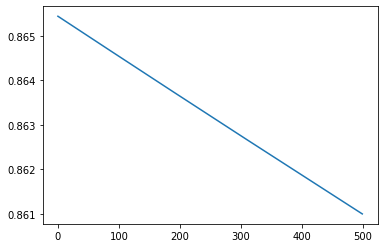

In [151]:
import matplotlib.pyplot as plt
plt.plot(mean_history)
# print(mean_history)

Δεύτερη δοκιμή με 50 κρυφούς κόμβους

In [158]:
# ME 50 KRIFOUS KOMVOUS
rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.001),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Epoch 1/500
754/754 [==============================] - 1s 934us/step - loss: 0.8773 - rmse: 0.9311 - mae: 0.2307
Epoch 2/500
754/754 [==============================] - 0s 512us/step - loss: 0.8773 - rmse: 0.9314 - mae: 0.2307
Epoch 3/500
754/754 [==============================] - 0s 588us/step - loss: 0.8773 - rmse: 0.9356 - mae: 0.2307
Epoch 4/500
754/754 [==============================] - 0s 541us/step - loss: 0.8773 - rmse: 0.9346 - mae: 0.2307
Epoch 5/500
754/754 [==============================] - 1s 737us/step - loss: 0.8773 - rmse: 0.9361 - mae: 0.2307
Epoch 6/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8772 - rmse: 0.9353 - mae: 0.2307
Epoch 7/500
754/754 [==============================] - 1s 797us/step - loss: 0.8772 - rmse: 0.9293 - mae: 0.2307
Epoch 8/500
754/754 [==============================] - 0s 472us/step - loss: 0.8772 - rmse: 0.9351 - mae: 0.2307
Epoch 9/500
754/754 [==============================] - 0s 588us/step - loss: 0.8772 - rmse: 0.9342

754/754 [==============================] - 1s 1ms/step - loss: 0.8760 - rmse: 0.9341 - mae: 0.2307
Epoch 140/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8760 - rmse: 0.9295 - mae: 0.2307
Epoch 141/500
754/754 [==============================] - 1s 700us/step - loss: 0.8760 - rmse: 0.9330 - mae: 0.2307
Epoch 142/500
754/754 [==============================] - 0s 482us/step - loss: 0.8760 - rmse: 0.9310 - mae: 0.2307
Epoch 143/500
754/754 [==============================] - 0s 472us/step - loss: 0.8759 - rmse: 0.9348 - mae: 0.2307
Epoch 144/500
754/754 [==============================] - 0s 479us/step - loss: 0.8759 - rmse: 0.9313 - mae: 0.2307
Epoch 145/500
754/754 [==============================] - 0s 640us/step - loss: 0.8759 - rmse: 0.9322 - mae: 0.2307
Epoch 146/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8759 - rmse: 0.9311 - mae: 0.2307
Epoch 147/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8759 - rmse: 0.9321 -

754/754 [==============================] - 0s 627us/step - loss: 0.8747 - rmse: 0.9302 - mae: 0.2310
Epoch 279/500
754/754 [==============================] - 1s 921us/step - loss: 0.8747 - rmse: 0.9301 - mae: 0.2310
Epoch 280/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8746 - rmse: 0.9357 - mae: 0.2310
Epoch 281/500
754/754 [==============================] - 1s 2ms/step - loss: 0.8746 - rmse: 0.9320 - mae: 0.2310
Epoch 282/500
754/754 [==============================] - 1s 973us/step - loss: 0.8746 - rmse: 0.9336 - mae: 0.2310
Epoch 283/500
754/754 [==============================] - 0s 473us/step - loss: 0.8746 - rmse: 0.9304 - mae: 0.2310
Epoch 284/500
754/754 [==============================] - 0s 488us/step - loss: 0.8746 - rmse: 0.9335 - mae: 0.2310
Epoch 285/500
754/754 [==============================] - 0s 541us/step - loss: 0.8746 - rmse: 0.9303 - mae: 0.2310
Epoch 286/500
754/754 [==============================] - 1s 724us/step - loss: 0.8746 - rmse: 0.93

754/754 [==============================] - 1s 1ms/step - loss: 0.8734 - rmse: 0.9293 - mae: 0.2313
Epoch 415/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8734 - rmse: 0.9322 - mae: 0.2313
Epoch 416/500
754/754 [==============================] - 1s 664us/step - loss: 0.8734 - rmse: 0.9310 - mae: 0.2313
Epoch 417/500
754/754 [==============================] - 0s 463us/step - loss: 0.8734 - rmse: 0.9314 - mae: 0.2314
Epoch 418/500
754/754 [==============================] - 0s 468us/step - loss: 0.8733 - rmse: 0.9317 - mae: 0.2314
Epoch 419/500
754/754 [==============================] - 0s 535us/step - loss: 0.8733 - rmse: 0.9293 - mae: 0.2314
Epoch 420/500
754/754 [==============================] - 0s 612us/step - loss: 0.8733 - rmse: 0.9326 - mae: 0.2314
Epoch 421/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8733 - rmse: 0.9324 - mae: 0.2314
Epoch 422/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8733 - rmse: 0.9313 -

Epoch 484/500
754/754 [==============================] - 1s 905us/step - loss: 0.8727 - rmse: 0.9297 - mae: 0.23160s - loss: 0.8671 - rmse: 0.9295 -
Epoch 485/500
754/754 [==============================] - 1s 790us/step - loss: 0.8727 - rmse: 0.9267 - mae: 0.2316
Epoch 486/500
754/754 [==============================] - 1s 864us/step - loss: 0.8727 - rmse: 0.9348 - mae: 0.2316
Epoch 487/500
754/754 [==============================] - 0s 530us/step - loss: 0.8727 - rmse: 0.9319 - mae: 0.2316
Epoch 488/500
754/754 [==============================] - 0s 367us/step - loss: 0.8727 - rmse: 0.9297 - mae: 0.2316
Epoch 489/500
754/754 [==============================] - 0s 513us/step - loss: 0.8727 - rmse: 0.9305 - mae: 0.2316
Epoch 490/500
754/754 [==============================] - 0s 421us/step - loss: 0.8727 - rmse: 0.9338 - mae: 0.2316
Epoch 491/500
754/754 [==============================] - 0s 428us/step - loss: 0.8727 - rmse: 0.9320 - mae: 0.2316
Epoch 492/500
754/754 [=======================

754/754 [==============================] - 0s 403us/step - loss: 0.8298 - rmse: 0.9088 - mae: 0.2186
Epoch 373/500
754/754 [==============================] - 1s 769us/step - loss: 0.8298 - rmse: 0.9071 - mae: 0.21860s - loss: 0.8242 - rmse: 0.9051 - mae
Epoch 374/500
754/754 [==============================] - 1s 815us/step - loss: 0.8297 - rmse: 0.9072 - mae: 0.2186
Epoch 375/500
754/754 [==============================] - 1s 719us/step - loss: 0.8297 - rmse: 0.9081 - mae: 0.21860s - loss: 0.8437 - rmse: 0.9152 - m
Epoch 376/500
754/754 [==============================] - 0s 363us/step - loss: 0.8297 - rmse: 0.9066 - mae: 0.21860s - loss: 0.8058 - rmse: 0.8970 - mae: 
Epoch 377/500
754/754 [==============================] - 0s 406us/step - loss: 0.8297 - rmse: 0.9061 - mae: 0.2186
Epoch 378/500
754/754 [==============================] - 0s 419us/step - loss: 0.8297 - rmse: 0.9051 - mae: 0.2186
Epoch 379/500
754/754 [==============================] - 0s 414us/step - loss: 0.8297 - rmse: 0

Epoch 440/500
754/754 [==============================] - 0s 427us/step - loss: 0.8292 - rmse: 0.9063 - mae: 0.2187
Epoch 441/500
754/754 [==============================] - 1s 722us/step - loss: 0.8292 - rmse: 0.9098 - mae: 0.2187
Epoch 442/500
754/754 [==============================] - 1s 853us/step - loss: 0.8292 - rmse: 0.9083 - mae: 0.2187
Epoch 443/500
754/754 [==============================] - 1s 854us/step - loss: 0.8292 - rmse: 0.9073 - mae: 0.2187
Epoch 444/500
754/754 [==============================] - 1s 888us/step - loss: 0.8292 - rmse: 0.9077 - mae: 0.21870s - loss: 0.7991 - rmse: 0.8929
Epoch 445/500
754/754 [==============================] - 1s 876us/step - loss: 0.8291 - rmse: 0.9058 - mae: 0.2187
Epoch 446/500
754/754 [==============================] - 0s 534us/step - loss: 0.8291 - rmse: 0.9066 - mae: 0.2187
Epoch 447/500
754/754 [==============================] - 0s 376us/step - loss: 0.8291 - rmse: 0.9045 - mae: 0.21870s - loss: 0.8502 - rmse: 0.9173 - mae: 0.22
Epoc

754/754 [==============================] - 1s 817us/step - loss: 0.8393 - rmse: 0.9130 - mae: 0.2192
Epoch 74/500
754/754 [==============================] - 0s 359us/step - loss: 0.8393 - rmse: 0.9126 - mae: 0.21920s - loss: 0.8542 - rmse: 0.9198 - mae
Epoch 75/500
754/754 [==============================] - 0s 372us/step - loss: 0.8393 - rmse: 0.9105 - mae: 0.2192
Epoch 76/500
754/754 [==============================] - 0s 406us/step - loss: 0.8393 - rmse: 0.9151 - mae: 0.2192
Epoch 77/500
754/754 [==============================] - 0s 406us/step - loss: 0.8393 - rmse: 0.9157 - mae: 0.2192
Epoch 78/500
754/754 [==============================] - 0s 412us/step - loss: 0.8393 - rmse: 0.9111 - mae: 0.2192
Epoch 79/500
754/754 [==============================] - 0s 619us/step - loss: 0.8393 - rmse: 0.9145 - mae: 0.2192
Epoch 80/500
754/754 [==============================] - 1s 841us/step - loss: 0.8393 - rmse: 0.9128 - mae: 0.2192
Epoch 81/500
754/754 [==============================] - 1s 867u

754/754 [==============================] - 1s 877us/step - loss: 0.8381 - rmse: 0.9109 - mae: 0.21920s - loss: 0.8442 - rmse: 0.9171 - mae: 0.22
Epoch 210/500
754/754 [==============================] - 1s 940us/step - loss: 0.8381 - rmse: 0.9142 - mae: 0.2192
Epoch 211/500
754/754 [==============================] - 1s 905us/step - loss: 0.8381 - rmse: 0.9131 - mae: 0.2192
Epoch 212/500
754/754 [==============================] - 1s 908us/step - loss: 0.8381 - rmse: 0.9128 - mae: 0.2192
Epoch 213/500
754/754 [==============================] - 0s 537us/step - loss: 0.8381 - rmse: 0.9140 - mae: 0.2192
Epoch 214/500
754/754 [==============================] - 0s 398us/step - loss: 0.8381 - rmse: 0.9122 - mae: 0.2192
Epoch 215/500
754/754 [==============================] - 0s 464us/step - loss: 0.8381 - rmse: 0.9144 - mae: 0.2192
Epoch 216/500
754/754 [==============================] - 0s 451us/step - loss: 0.8381 - rmse: 0.9135 - mae: 0.2192
Epoch 217/500
754/754 [===========================

754/754 [==============================] - 0s 450us/step - loss: 0.8369 - rmse: 0.9126 - mae: 0.2195
Epoch 347/500
754/754 [==============================] - 0s 559us/step - loss: 0.8369 - rmse: 0.9145 - mae: 0.2195
Epoch 348/500
754/754 [==============================] - 1s 979us/step - loss: 0.8369 - rmse: 0.9128 - mae: 0.2195
Epoch 349/500
754/754 [==============================] - 1s 880us/step - loss: 0.8369 - rmse: 0.9120 - mae: 0.2195
Epoch 350/500
754/754 [==============================] - 1s 986us/step - loss: 0.8369 - rmse: 0.9100 - mae: 0.2195
Epoch 351/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8369 - rmse: 0.9092 - mae: 0.2195
Epoch 352/500
754/754 [==============================] - 0s 512us/step - loss: 0.8369 - rmse: 0.9101 - mae: 0.2195
Epoch 353/500
754/754 [==============================] - 0s 410us/step - loss: 0.8369 - rmse: 0.9153 - mae: 0.2195
Epoch 354/500
754/754 [==============================] - 0s 445us/step - loss: 0.8369 - rmse: 0.

754/754 [==============================] - 0s 575us/step - loss: 0.8358 - rmse: 0.9093 - mae: 0.2198
Epoch 482/500
754/754 [==============================] - 0s 376us/step - loss: 0.8358 - rmse: 0.9121 - mae: 0.2198
Epoch 483/500
754/754 [==============================] - 0s 408us/step - loss: 0.8358 - rmse: 0.9129 - mae: 0.2198
Epoch 484/500
754/754 [==============================] - 0s 445us/step - loss: 0.8357 - rmse: 0.9112 - mae: 0.2198
Epoch 485/500
754/754 [==============================] - 0s 452us/step - loss: 0.8357 - rmse: 0.9098 - mae: 0.2198
Epoch 486/500
754/754 [==============================] - 1s 668us/step - loss: 0.8357 - rmse: 0.9129 - mae: 0.21980s - loss: 0.8176 - rmse: 0.9005 - mae: 0.
Epoch 487/500
754/754 [==============================] - 1s 928us/step - loss: 0.8357 - rmse: 0.9135 - mae: 0.2198
Epoch 488/500
754/754 [==============================] - 1s 875us/step - loss: 0.8357 - rmse: 0.9140 - mae: 0.2198
Epoch 489/500
754/754 [=============================

755/755 [==============================] - 1s 2ms/step - loss: 0.8977 - rmse: 0.9480 - mae: 0.2346
Epoch 117/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8977 - rmse: 0.9450 - mae: 0.2346
Epoch 118/500
755/755 [==============================] - 1s 737us/step - loss: 0.8976 - rmse: 0.9459 - mae: 0.2346
Epoch 119/500
755/755 [==============================] - 0s 471us/step - loss: 0.8976 - rmse: 0.9448 - mae: 0.2346
Epoch 120/500
755/755 [==============================] - 1s 818us/step - loss: 0.8976 - rmse: 0.9441 - mae: 0.2346
Epoch 121/500
755/755 [==============================] - 3s 4ms/step - loss: 0.8976 - rmse: 0.9419 - mae: 0.2346
Epoch 122/500
755/755 [==============================] - 1s 715us/step - loss: 0.8976 - rmse: 0.9433 - mae: 0.2346
Epoch 123/500
755/755 [==============================] - 0s 593us/step - loss: 0.8976 - rmse: 0.9445 - mae: 0.2346
Epoch 124/500
755/755 [==============================] - 0s 552us/step - loss: 0.8976 - rmse: 0.9403

755/755 [==============================] - 1s 2ms/step - loss: 0.8963 - rmse: 0.9455 - mae: 0.2347
Epoch 253/500
755/755 [==============================] - 1s 987us/step - loss: 0.8963 - rmse: 0.9451 - mae: 0.23470s - loss: 0.8896 - rmse: 0.9405 - mae: 0.
Epoch 254/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8963 - rmse: 0.9442 - mae: 0.2347
Epoch 255/500
755/755 [==============================] - 0s 384us/step - loss: 0.8963 - rmse: 0.9469 - mae: 0.2347
Epoch 256/500
755/755 [==============================] - 0s 400us/step - loss: 0.8963 - rmse: 0.9429 - mae: 0.2347
Epoch 257/500
755/755 [==============================] - 0s 419us/step - loss: 0.8963 - rmse: 0.9395 - mae: 0.2347
Epoch 258/500
755/755 [==============================] - 0s 480us/step - loss: 0.8963 - rmse: 0.9444 - mae: 0.23470s - loss: 0.9730 - rmse: 0.9857 - mae
Epoch 259/500
755/755 [==============================] - 0s 477us/step - loss: 0.8963 - rmse: 0.9451 - mae: 0.2347
Epoch 260/500
755/

755/755 [==============================] - 0s 408us/step - loss: 0.8950 - rmse: 0.9436 - mae: 0.2350
Epoch 387/500
755/755 [==============================] - 0s 413us/step - loss: 0.8950 - rmse: 0.9408 - mae: 0.2350
Epoch 388/500
755/755 [==============================] - 1s 678us/step - loss: 0.8950 - rmse: 0.9432 - mae: 0.2350
Epoch 389/500
755/755 [==============================] - 1s 847us/step - loss: 0.8950 - rmse: 0.9411 - mae: 0.2350
Epoch 390/500
755/755 [==============================] - 1s 891us/step - loss: 0.8950 - rmse: 0.9403 - mae: 0.2350
Epoch 391/500
755/755 [==============================] - 1s 860us/step - loss: 0.8950 - rmse: 0.9421 - mae: 0.2350
Epoch 392/500
755/755 [==============================] - 1s 862us/step - loss: 0.8950 - rmse: 0.9447 - mae: 0.2350
Epoch 393/500
755/755 [==============================] - 0s 604us/step - loss: 0.8949 - rmse: 0.9397 - mae: 0.2350
Epoch 394/500
755/755 [==============================] - 0s 384us/step - loss: 0.8949 - rmse: 

755/755 [==============================] - 0s 371us/step - loss: 0.8783 - rmse: 0.9306 - mae: 0.2291
Epoch 23/500
755/755 [==============================] - 0s 387us/step - loss: 0.8783 - rmse: 0.9346 - mae: 0.2291
Epoch 24/500
755/755 [==============================] - 0s 397us/step - loss: 0.8782 - rmse: 0.9369 - mae: 0.2291
Epoch 25/500
755/755 [==============================] - 0s 413us/step - loss: 0.8782 - rmse: 0.9349 - mae: 0.2291
Epoch 26/500
755/755 [==============================] - 0s 418us/step - loss: 0.8782 - rmse: 0.9357 - mae: 0.2291
Epoch 27/500
755/755 [==============================] - 1s 699us/step - loss: 0.8782 - rmse: 0.9323 - mae: 0.2291
Epoch 28/500
755/755 [==============================] - 1s 826us/step - loss: 0.8782 - rmse: 0.9331 - mae: 0.2291
Epoch 29/500
755/755 [==============================] - 1s 837us/step - loss: 0.8782 - rmse: 0.9381 - mae: 0.2291
Epoch 30/500
755/755 [==============================] - 1s 832us/step - loss: 0.8782 - rmse: 0.9371 -

Epoch 92/500
755/755 [==============================] - 1s 837us/step - loss: 0.8776 - rmse: 0.9348 - mae: 0.2290
Epoch 93/500
755/755 [==============================] - 1s 890us/step - loss: 0.8776 - rmse: 0.9350 - mae: 0.22900s - loss: 0.8749 - rmse: 
Epoch 94/500
755/755 [==============================] - 1s 842us/step - loss: 0.8776 - rmse: 0.9361 - mae: 0.2290
Epoch 95/500
755/755 [==============================] - 1s 858us/step - loss: 0.8776 - rmse: 0.9351 - mae: 0.2290
Epoch 96/500
755/755 [==============================] - 0s 477us/step - loss: 0.8776 - rmse: 0.9346 - mae: 0.2290
Epoch 97/500
755/755 [==============================] - 0s 376us/step - loss: 0.8775 - rmse: 0.9358 - mae: 0.2290
Epoch 98/500
755/755 [==============================] - 0s 403us/step - loss: 0.8775 - rmse: 0.9297 - mae: 0.2290
Epoch 99/500
755/755 [==============================] - 0s 418us/step - loss: 0.8775 - rmse: 0.9326 - mae: 0.2290
Epoch 100/500
755/755 [==============================] - 0s 41

755/755 [==============================] - 1s 879us/step - loss: 0.8763 - rmse: 0.9332 - mae: 0.2290
Epoch 231/500
755/755 [==============================] - 1s 892us/step - loss: 0.8763 - rmse: 0.9328 - mae: 0.22900s - loss: 0.9645 - rmse
Epoch 232/500
755/755 [==============================] - 0s 480us/step - loss: 0.8763 - rmse: 0.9346 - mae: 0.2290
Epoch 233/500
755/755 [==============================] - 0s 385us/step - loss: 0.8763 - rmse: 0.9339 - mae: 0.2290
Epoch 234/500
755/755 [==============================] - 0s 413us/step - loss: 0.8763 - rmse: 0.9299 - mae: 0.2290
Epoch 235/500
755/755 [==============================] - 0s 412us/step - loss: 0.8762 - rmse: 0.9351 - mae: 0.2290
Epoch 236/500
755/755 [==============================] - 0s 428us/step - loss: 0.8762 - rmse: 0.9316 - mae: 0.2290
Epoch 237/500
755/755 [==============================] - 0s 585us/step - loss: 0.8762 - rmse: 0.9316 - mae: 0.2290
Epoch 238/500
755/755 [==============================] - 1s 863us/step

755/755 [==============================] - 0s 376us/step - loss: 0.8750 - rmse: 0.9330 - mae: 0.2292
Epoch 366/500
755/755 [==============================] - 0s 403us/step - loss: 0.8750 - rmse: 0.9352 - mae: 0.2292
Epoch 367/500
755/755 [==============================] - 0s 418us/step - loss: 0.8750 - rmse: 0.9300 - mae: 0.2292
Epoch 368/500
755/755 [==============================] - 0s 418us/step - loss: 0.8750 - rmse: 0.9288 - mae: 0.2292
Epoch 369/500
755/755 [==============================] - 0s 429us/step - loss: 0.8750 - rmse: 0.9346 - mae: 0.2292
Epoch 370/500
755/755 [==============================] - 1s 826us/step - loss: 0.8750 - rmse: 0.9292 - mae: 0.2292
Epoch 371/500
755/755 [==============================] - 1s 900us/step - loss: 0.8750 - rmse: 0.9336 - mae: 0.2292
Epoch 372/500
755/755 [==============================] - 1s 847us/step - loss: 0.8750 - rmse: 0.9319 - mae: 0.2292
Epoch 373/500
755/755 [==============================] - 1s 911us/step - loss: 0.8750 - rmse: 

188/188 [==============================] - 0s 1ms/step
-----------------------------------------------------
Fold number 5: Sto test set exw loss :0.8098916893309736, rmse: 0.8988255858421326 kai mae:0.21374204754829407
------------------------------------------------------------------------
Average test scores gia ola ta folds:
> RMSE: 0.9217702388763428 (+- 0.052386712447290734)
> MAE: 0.22700797021389008 (+-0.02467195845498027)


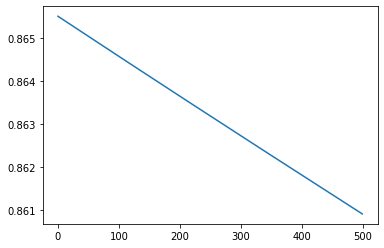

In [159]:
plt.plot(mean_history)

Τρίτη δοκιμή με 100 κρυφούς κόμβους:

In [165]:
# ME 100 KRIFOUS KOMVOUS
rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(100,activation='relu')) 
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.001),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]


Epoch 1/500
754/754 [==============================] - 1s 881us/step - loss: 0.8775 - rmse: 0.9338 - mae: 0.2316
Epoch 2/500
754/754 [==============================] - 0s 470us/step - loss: 0.8774 - rmse: 0.9350 - mae: 0.2316
Epoch 3/500
754/754 [==============================] - 0s 468us/step - loss: 0.8774 - rmse: 0.9332 - mae: 0.2316
Epoch 4/500
754/754 [==============================] - 0s 472us/step - loss: 0.8774 - rmse: 0.9367 - mae: 0.2316
Epoch 5/500
754/754 [==============================] - 0s 478us/step - loss: 0.8774 - rmse: 0.9359 - mae: 0.2316
Epoch 6/500
754/754 [==============================] - 0s 471us/step - loss: 0.8774 - rmse: 0.9321 - mae: 0.2316
Epoch 7/500
754/754 [==============================] - 0s 477us/step - loss: 0.8774 - rmse: 0.9344 - mae: 0.2316
Epoch 8/500
754/754 [==============================] - 0s 502us/step - loss: 0.8774 - rmse: 0.9324 - mae: 0.2316
Epoch 9/500
754/754 [==============================] - 1s 780us/step - loss: 0.8774 - rmse: 0.93

754/754 [==============================] - 1s 758us/step - loss: 0.8768 - rmse: 0.9322 - mae: 0.2315
Epoch 72/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8768 - rmse: 0.9350 - mae: 0.2315
Epoch 73/500
754/754 [==============================] - 1s 782us/step - loss: 0.8768 - rmse: 0.9331 - mae: 0.23150s - loss: 0.8781 - rmse: 0.9352
Epoch 74/500
754/754 [==============================] - 0s 471us/step - loss: 0.8767 - rmse: 0.9308 - mae: 0.2315
Epoch 75/500
754/754 [==============================] - 0s 475us/step - loss: 0.8767 - rmse: 0.9325 - mae: 0.2315
Epoch 76/500
754/754 [==============================] - 0s 525us/step - loss: 0.8767 - rmse: 0.9334 - mae: 0.2315
Epoch 77/500
754/754 [==============================] - 0s 525us/step - loss: 0.8767 - rmse: 0.9328 - mae: 0.2315
Epoch 78/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8767 - rmse: 0.9321 - mae: 0.2315
Epoch 79/500
754/754 [==============================] - 1s 1ms/step - los

754/754 [==============================] - 0s 450us/step - loss: 0.8761 - rmse: 0.9330 - mae: 0.2315
Epoch 141/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8761 - rmse: 0.9325 - mae: 0.2315
Epoch 142/500
754/754 [==============================] - 1s 996us/step - loss: 0.8761 - rmse: 0.9328 - mae: 0.2315
Epoch 143/500
754/754 [==============================] - 0s 502us/step - loss: 0.8761 - rmse: 0.9315 - mae: 0.2315
Epoch 144/500
754/754 [==============================] - 0s 418us/step - loss: 0.8761 - rmse: 0.9361 - mae: 0.2315
Epoch 145/500
754/754 [==============================] - 0s 430us/step - loss: 0.8760 - rmse: 0.9326 - mae: 0.2315
Epoch 146/500
754/754 [==============================] - 0s 444us/step - loss: 0.8760 - rmse: 0.9344 - mae: 0.2315
Epoch 147/500
754/754 [==============================] - 0s 435us/step - loss: 0.8760 - rmse: 0.9298 - mae: 0.2315
Epoch 148/500
754/754 [==============================] - 1s 986us/step - loss: 0.8760 - rmse: 0.

754/754 [==============================] - 0s 461us/step - loss: 0.8748 - rmse: 0.9321 - mae: 0.2316
Epoch 278/500
754/754 [==============================] - 1s 973us/step - loss: 0.8748 - rmse: 0.9300 - mae: 0.23160s - loss: 0.8827 - rmse: 0.9365 - mae: 
Epoch 279/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8748 - rmse: 0.9301 - mae: 0.2316: 0s - loss: 0.8801 - rmse: 0.9356
Epoch 280/500
754/754 [==============================] - 0s 577us/step - loss: 0.8747 - rmse: 0.9335 - mae: 0.2316
Epoch 281/500
754/754 [==============================] - 0s 448us/step - loss: 0.8747 - rmse: 0.9311 - mae: 0.2316
Epoch 282/500
754/754 [==============================] - 0s 432us/step - loss: 0.8747 - rmse: 0.9348 - mae: 0.2316
Epoch 283/500
754/754 [==============================] - 0s 442us/step - loss: 0.8747 - rmse: 0.9344 - mae: 0.2316
Epoch 284/500
754/754 [==============================] - 0s 451us/step - loss: 0.8747 - rmse: 0.9299 - mae: 0.2316
Epoch 285/500
754/754 

754/754 [==============================] - 0s 419us/step - loss: 0.8735 - rmse: 0.9362 - mae: 0.2319
Epoch 415/500
754/754 [==============================] - 0s 452us/step - loss: 0.8734 - rmse: 0.9287 - mae: 0.2319
Epoch 416/500
754/754 [==============================] - 0s 459us/step - loss: 0.8734 - rmse: 0.9331 - mae: 0.2319
Epoch 417/500
754/754 [==============================] - 0s 457us/step - loss: 0.8734 - rmse: 0.9319 - mae: 0.2319
Epoch 418/500
754/754 [==============================] - 1s 853us/step - loss: 0.8734 - rmse: 0.9337 - mae: 0.23190s - loss: 0.8736 - rmse: 0.9329 - m
Epoch 419/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8734 - rmse: 0.9305 - mae: 0.2319
Epoch 420/500
754/754 [==============================] - 1s 721us/step - loss: 0.8734 - rmse: 0.9316 - mae: 0.23190s - loss: 0.8204 - rmse: 0.9038
Epoch 421/500
754/754 [==============================] - 0s 432us/step - loss: 0.8734 - rmse: 0.9325 - mae: 0.2319
Epoch 422/500
754/754 [=====

754/754 [==============================] - 1s 1ms/step - loss: 0.8327 - rmse: 0.9084 - mae: 0.2200
Epoch 49/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8327 - rmse: 0.9071 - mae: 0.2200
Epoch 50/500
754/754 [==============================] - 0s 590us/step - loss: 0.8327 - rmse: 0.9091 - mae: 0.2200
Epoch 51/500
754/754 [==============================] - 0s 496us/step - loss: 0.8327 - rmse: 0.9074 - mae: 0.2200
Epoch 52/500
754/754 [==============================] - 0s 535us/step - loss: 0.8327 - rmse: 0.9091 - mae: 0.2200
Epoch 53/500
754/754 [==============================] - 1s 685us/step - loss: 0.8327 - rmse: 0.9118 - mae: 0.22000s - loss: 0.7623 - rmse: 0.8714
Epoch 54/500
754/754 [==============================] - 1s 2ms/step - loss: 0.8326 - rmse: 0.9126 - mae: 0.2200
Epoch 55/500
754/754 [==============================] - 1s 742us/step - loss: 0.8326 - rmse: 0.9081 - mae: 0.2200
Epoch 56/500
754/754 [==============================] - 0s 512us/step - los

Epoch 186/500
754/754 [==============================] - 0s 582us/step - loss: 0.8314 - rmse: 0.9096 - mae: 0.2199
Epoch 187/500
754/754 [==============================] - 0s 619us/step - loss: 0.8314 - rmse: 0.9066 - mae: 0.2199
Epoch 188/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8314 - rmse: 0.9095 - mae: 0.2199
Epoch 189/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8314 - rmse: 0.9067 - mae: 0.2199
Epoch 190/500
754/754 [==============================] - 0s 531us/step - loss: 0.8314 - rmse: 0.9132 - mae: 0.2199
Epoch 191/500
754/754 [==============================] - 0s 588us/step - loss: 0.8314 - rmse: 0.9065 - mae: 0.2199
Epoch 192/500
754/754 [==============================] - 0s 562us/step - loss: 0.8314 - rmse: 0.9084 - mae: 0.21990s - loss: 0.8451 - rmse: 0.9164 - mae: 
Epoch 193/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8314 - rmse: 0.9088 - mae: 0.2199
Epoch 194/500
754/754 [=======================

754/754 [==============================] - 0s 513us/step - loss: 0.8302 - rmse: 0.9087 - mae: 0.22000s - loss: 0.7875 - rmse: 0.8828 - mae: 
Epoch 323/500
754/754 [==============================] - 0s 548us/step - loss: 0.8302 - rmse: 0.9068 - mae: 0.22000s - loss: 0.7710 - rmse: 0.8757 - m
Epoch 324/500
754/754 [==============================] - 0s 525us/step - loss: 0.8302 - rmse: 0.9093 - mae: 0.2200
Epoch 325/500
754/754 [==============================] - 1s 726us/step - loss: 0.8302 - rmse: 0.9093 - mae: 0.22000s - loss: 0.8259 - rmse: 0.9067 - mae: 
Epoch 326/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8302 - rmse: 0.9068 - mae: 0.2200
Epoch 327/500
754/754 [==============================] - 1s 893us/step - loss: 0.8302 - rmse: 0.9064 - mae: 0.2200
Epoch 328/500
754/754 [==============================] - 0s 458us/step - loss: 0.8302 - rmse: 0.9043 - mae: 0.2200
Epoch 329/500
754/754 [==============================] - 0s 484us/step - loss: 0.8302 - rmse: 0

754/754 [==============================] - 0s 558us/step - loss: 0.8290 - rmse: 0.9065 - mae: 0.2202
Epoch 457/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8290 - rmse: 0.9066 - mae: 0.2202
Epoch 458/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8290 - rmse: 0.9110 - mae: 0.2202
Epoch 459/500
754/754 [==============================] - 0s 516us/step - loss: 0.8290 - rmse: 0.9078 - mae: 0.2202
Epoch 460/500
754/754 [==============================] - 0s 547us/step - loss: 0.8290 - rmse: 0.9058 - mae: 0.2202
Epoch 461/500
754/754 [==============================] - 0s 548us/step - loss: 0.8290 - rmse: 0.9068 - mae: 0.22020s - loss: 0.8086 - rmse: 0.8968 - mae
Epoch 462/500
754/754 [==============================] - 1s 952us/step - loss: 0.8290 - rmse: 0.9094 - mae: 0.2202
Epoch 463/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8290 - rmse: 0.9061 - mae: 0.2202
Epoch 464/500
754/754 [==============================] - 0s 63

754/754 [==============================] - 1s 1ms/step - loss: 0.8390 - rmse: 0.9140 - mae: 0.2213
Epoch 92/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8390 - rmse: 0.9100 - mae: 0.2213
Epoch 93/500
754/754 [==============================] - 0s 628us/step - loss: 0.8390 - rmse: 0.9120 - mae: 0.2213
Epoch 94/500
754/754 [==============================] - 0s 509us/step - loss: 0.8390 - rmse: 0.9097 - mae: 0.2213
Epoch 95/500
754/754 [==============================] - 0s 615us/step - loss: 0.8390 - rmse: 0.9094 - mae: 0.2213
Epoch 96/500
754/754 [==============================] - 0s 593us/step - loss: 0.8390 - rmse: 0.9127 - mae: 0.2213
Epoch 97/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8390 - rmse: 0.9147 - mae: 0.2213
Epoch 98/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8389 - rmse: 0.9141 - mae: 0.2213
Epoch 99/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8389 - rmse: 0.9105 - mae: 0.22

754/754 [==============================] - 1s 1ms/step - loss: 0.8378 - rmse: 0.9101 - mae: 0.2214: 0s - loss: 0.8158 - rmse: 0.
Epoch 230/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8377 - rmse: 0.9126 - mae: 0.2215
Epoch 231/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8377 - rmse: 0.9129 - mae: 0.2215
Epoch 232/500
754/754 [==============================] - 0s 532us/step - loss: 0.8377 - rmse: 0.9140 - mae: 0.2215
Epoch 233/500
754/754 [==============================] - 0s 456us/step - loss: 0.8377 - rmse: 0.9139 - mae: 0.2215
Epoch 234/500
754/754 [==============================] - 0s 469us/step - loss: 0.8377 - rmse: 0.9129 - mae: 0.2215
Epoch 235/500
754/754 [==============================] - 0s 512us/step - loss: 0.8377 - rmse: 0.9162 - mae: 0.2215
Epoch 236/500
754/754 [==============================] - 0s 636us/step - loss: 0.8377 - rmse: 0.9108 - mae: 0.2215
Epoch 237/500
754/754 [==============================] - 1s 1ms/step -

754/754 [==============================] - 0s 515us/step - loss: 0.8365 - rmse: 0.9127 - mae: 0.22170s - loss: 0.9087 - rmse: 0.9504 -
Epoch 368/500
754/754 [==============================] - 1s 784us/step - loss: 0.8365 - rmse: 0.9108 - mae: 0.2217
Epoch 369/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8365 - rmse: 0.9149 - mae: 0.2218: 0s - loss: 0.8057 - rmse: 0.89
Epoch 370/500
754/754 [==============================] - 1s 743us/step - loss: 0.8365 - rmse: 0.9090 - mae: 0.22180s - loss: 0.8284 - rmse: 0.90
Epoch 371/500
754/754 [==============================] - 0s 459us/step - loss: 0.8365 - rmse: 0.9095 - mae: 0.2218
Epoch 372/500
754/754 [==============================] - 0s 488us/step - loss: 0.8365 - rmse: 0.9142 - mae: 0.2218
Epoch 373/500
754/754 [==============================] - 0s 521us/step - loss: 0.8364 - rmse: 0.9124 - mae: 0.2218
Epoch 374/500
754/754 [==============================] - 0s 596us/step - loss: 0.8364 - rmse: 0.9105 - mae: 0.2218


Epoch 1/500
755/755 [==============================] - 1s 876us/step - loss: 0.8990 - rmse: 0.9472 - mae: 0.2362
Epoch 2/500
755/755 [==============================] - 0s 461us/step - loss: 0.8990 - rmse: 0.9437 - mae: 0.2362
Epoch 3/500
755/755 [==============================] - 1s 890us/step - loss: 0.8990 - rmse: 0.9485 - mae: 0.2362
Epoch 4/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8990 - rmse: 0.9467 - mae: 0.2362
Epoch 5/500
755/755 [==============================] - 1s 716us/step - loss: 0.8990 - rmse: 0.9479 - mae: 0.2362
Epoch 6/500
755/755 [==============================] - 0s 492us/step - loss: 0.8990 - rmse: 0.9448 - mae: 0.2362
Epoch 7/500
755/755 [==============================] - 0s 534us/step - loss: 0.8989 - rmse: 0.9454 - mae: 0.2362
Epoch 8/500
755/755 [==============================] - 0s 511us/step - loss: 0.8989 - rmse: 0.9450 - mae: 0.2362
Epoch 9/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8989 - rmse: 0.9451 -

755/755 [==============================] - 0s 483us/step - loss: 0.8976 - rmse: 0.9439 - mae: 0.2360
Epoch 139/500
755/755 [==============================] - 0s 491us/step - loss: 0.8976 - rmse: 0.9430 - mae: 0.2360
Epoch 140/500
755/755 [==============================] - 1s 760us/step - loss: 0.8976 - rmse: 0.9456 - mae: 0.2360
Epoch 141/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8975 - rmse: 0.9465 - mae: 0.2360: 0s - loss: 0.9139 - rmse: 
Epoch 142/500
755/755 [==============================] - 1s 792us/step - loss: 0.8975 - rmse: 0.9451 - mae: 0.23600s - loss: 0.9004 - rmse: 0.9454 - mae: 0.
Epoch 143/500
755/755 [==============================] - 0s 441us/step - loss: 0.8975 - rmse: 0.9444 - mae: 0.2360
Epoch 144/500
755/755 [==============================] - 0s 485us/step - loss: 0.8975 - rmse: 0.9441 - mae: 0.2360
Epoch 145/500
755/755 [==============================] - 0s 487us/step - loss: 0.8975 - rmse: 0.9431 - mae: 0.2360
Epoch 146/500
755/755 [===

755/755 [==============================] - 1s 1ms/step - loss: 0.8969 - rmse: 0.9445 - mae: 0.2360
Epoch 208/500
755/755 [==============================] - 0s 517us/step - loss: 0.8969 - rmse: 0.9463 - mae: 0.2360
Epoch 209/500
755/755 [==============================] - 0s 496us/step - loss: 0.8969 - rmse: 0.9423 - mae: 0.2360
Epoch 210/500
755/755 [==============================] - 0s 525us/step - loss: 0.8968 - rmse: 0.9406 - mae: 0.2360
Epoch 211/500
755/755 [==============================] - 0s 553us/step - loss: 0.8968 - rmse: 0.9439 - mae: 0.2360
Epoch 212/500
755/755 [==============================] - ETA: 0s - loss: 0.9002 - rmse: 0.9446 - mae: 0.2371 ETA: 0s - loss: 0.9038 - rmse: 0.9466 - mae: 0. - 1s 1ms/step - loss: 0.8968 - rmse: 0.9417 - mae: 0.2360
Epoch 213/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8968 - rmse: 0.9439 - mae: 0.2360
Epoch 214/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8968 - rmse: 0.9421 - mae: 0.2360


755/755 [==============================] - 1s 762us/step - loss: 0.8955 - rmse: 0.9464 - mae: 0.2361
Epoch 345/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8955 - rmse: 0.9405 - mae: 0.2361
Epoch 346/500
755/755 [==============================] - 1s 831us/step - loss: 0.8955 - rmse: 0.9412 - mae: 0.2361
Epoch 347/500
755/755 [==============================] - 0s 451us/step - loss: 0.8955 - rmse: 0.9444 - mae: 0.2361
Epoch 348/500
755/755 [==============================] - 0s 499us/step - loss: 0.8954 - rmse: 0.9442 - mae: 0.2361
Epoch 349/500
755/755 [==============================] - 0s 525us/step - loss: 0.8954 - rmse: 0.9468 - mae: 0.2361
Epoch 350/500
755/755 [==============================] - 0s 583us/step - loss: 0.8954 - rmse: 0.9423 - mae: 0.23610s - loss: 0.8796 - rmse: 0.9329 - mae: 
Epoch 351/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8954 - rmse: 0.9439 - mae: 0.2361
Epoch 352/500
755/755 [==============================] - 1

755/755 [==============================] - 0s 570us/step - loss: 0.8941 - rmse: 0.9416 - mae: 0.2364
Epoch 479/500
755/755 [==============================] - 0s 550us/step - loss: 0.8941 - rmse: 0.9434 - mae: 0.2364
Epoch 480/500
755/755 [==============================] - 1s 724us/step - loss: 0.8941 - rmse: 0.9401 - mae: 0.2364
Epoch 481/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8941 - rmse: 0.9426 - mae: 0.2364
Epoch 482/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8941 - rmse: 0.9440 - mae: 0.2364
Epoch 483/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8941 - rmse: 0.9437 - mae: 0.2364
Epoch 484/500
755/755 [==============================] - 0s 452us/step - loss: 0.8941 - rmse: 0.9447 - mae: 0.2364
Epoch 485/500
755/755 [==============================] - 0s 450us/step - loss: 0.8941 - rmse: 0.9473 - mae: 0.2364
Epoch 486/500
755/755 [==============================] - 0s 474us/step - loss: 0.8941 - rmse: 0.9416

755/755 [==============================] - 1s 1ms/step - loss: 0.8772 - rmse: 0.9307 - mae: 0.2310
Epoch 114/500
755/755 [==============================] - 0s 568us/step - loss: 0.8772 - rmse: 0.9365 - mae: 0.2310
Epoch 115/500
755/755 [==============================] - 0s 481us/step - loss: 0.8772 - rmse: 0.9353 - mae: 0.2310
Epoch 116/500
755/755 [==============================] - 0s 505us/step - loss: 0.8772 - rmse: 0.9352 - mae: 0.2310
Epoch 117/500
755/755 [==============================] - 0s 518us/step - loss: 0.8772 - rmse: 0.9336 - mae: 0.2310
Epoch 118/500
755/755 [==============================] - 1s 878us/step - loss: 0.8772 - rmse: 0.9317 - mae: 0.2310
Epoch 119/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8772 - rmse: 0.9343 - mae: 0.2310
Epoch 120/500
755/755 [==============================] - 0s 642us/step - loss: 0.8771 - rmse: 0.9339 - mae: 0.2310
Epoch 121/500
755/755 [==============================] - 0s 489us/step - loss: 0.8771 - rmse: 0.93

755/755 [==============================] - 0s 527us/step - loss: 0.8759 - rmse: 0.9333 - mae: 0.2311
Epoch 251/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8759 - rmse: 0.9320 - mae: 0.2311
Epoch 252/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8758 - rmse: 0.9324 - mae: 0.2312
Epoch 253/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8758 - rmse: 0.9327 - mae: 0.2312
Epoch 254/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8758 - rmse: 0.9341 - mae: 0.2312
Epoch 255/500
755/755 [==============================] - 0s 495us/step - loss: 0.8758 - rmse: 0.9348 - mae: 0.2312
Epoch 256/500
755/755 [==============================] - 0s 446us/step - loss: 0.8758 - rmse: 0.9344 - mae: 0.2312
Epoch 257/500
755/755 [==============================] - 0s 458us/step - loss: 0.8758 - rmse: 0.9337 - mae: 0.2312
Epoch 258/500
755/755 [==============================] - 0s 483us/step - loss: 0.8758 - rmse: 0.9325 -

755/755 [==============================] - 0s 478us/step - loss: 0.8746 - rmse: 0.9343 - mae: 0.23140s - loss: 0.9415 - rmse: 0.9690 - mae
Epoch 386/500
755/755 [==============================] - 0s 480us/step - loss: 0.8745 - rmse: 0.9311 - mae: 0.23140s - loss: 0.8431 - rmse: 0.9132 - mae
Epoch 387/500
755/755 [==============================] - 1s 821us/step - loss: 0.8745 - rmse: 0.9339 - mae: 0.2314
Epoch 388/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8745 - rmse: 0.9307 - mae: 0.2314
Epoch 389/500
755/755 [==============================] - 1s 980us/step - loss: 0.8745 - rmse: 0.9326 - mae: 0.2314
Epoch 390/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8745 - rmse: 0.9325 - mae: 0.2314
Epoch 391/500
755/755 [==============================] - 1s 833us/step - loss: 0.8745 - rmse: 0.9324 - mae: 0.23140s - loss: 0.8234 - rmse: 0.9030
Epoch 392/500
755/755 [==============================] - 0s 436us/step - loss: 0.8745 - rmse: 0.9292 - ma

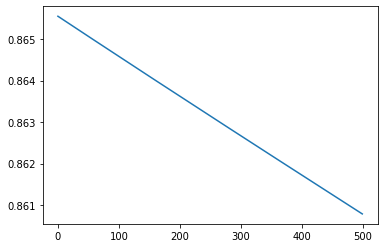

In [166]:
plt.plot(mean_history)

### Α3. Μεταβολές στο ρυθμό εκπαίδευσης και σταθεράς ορμής

Πρώτη δοκιμή με learning rate η=0.001 και momentum = 0.2 

In [167]:
# lr=0.001 kai momentum = 0.2
rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.001,momentum=0.2),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Epoch 1/500
754/754 [==============================] - ETA: 0s - loss: 0.8718 - rmse: 0.9284 - mae: 0.2308 ETA: 0s - loss: 0.8584 - rmse: 0.9206 - mae: 0. - 1s 938us/step - loss: 0.8775 - rmse: 0.9335 - mae: 0.2320
Epoch 2/500
754/754 [==============================] - 0s 534us/step - loss: 0.8775 - rmse: 0.9350 - mae: 0.23200s - loss: 0.8471 - rmse: 0.9185 - mae
Epoch 3/500
754/754 [==============================] - 0s 464us/step - loss: 0.8774 - rmse: 0.9341 - mae: 0.2320
Epoch 4/500
754/754 [==============================] - 0s 459us/step - loss: 0.8774 - rmse: 0.9359 - mae: 0.23200s - loss: 0.8683 - rmse: 0.9308 - m
Epoch 5/500
754/754 [==============================] - ETA: 0s - loss: 0.8847 - rmse: 0.9383 - mae: 0.23 - 0s 460us/step - loss: 0.8774 - rmse: 0.9331 - mae: 0.2320
Epoch 6/500
754/754 [==============================] - 1s 961us/step - loss: 0.8774 - rmse: 0.9321 - mae: 0.2320
Epoch 7/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8774 - rmse: 0.93

754/754 [==============================] - 1s 944us/step - loss: 0.8758 - rmse: 0.9332 - mae: 0.23190s - loss: 0.8701 - rmse: 0.9288 - mae: 
Epoch 137/500
754/754 [==============================] - 1s 847us/step - loss: 0.8758 - rmse: 0.9350 - mae: 0.2319
Epoch 138/500
754/754 [==============================] - 0s 427us/step - loss: 0.8758 - rmse: 0.9349 - mae: 0.2319
Epoch 139/500
754/754 [==============================] - 0s 434us/step - loss: 0.8758 - rmse: 0.9320 - mae: 0.2319
Epoch 140/500
754/754 [==============================] - 0s 448us/step - loss: 0.8757 - rmse: 0.9341 - mae: 0.2319
Epoch 141/500
754/754 [==============================] - 0s 457us/step - loss: 0.8757 - rmse: 0.9342 - mae: 0.2319
Epoch 142/500
754/754 [==============================] - 1s 681us/step - loss: 0.8757 - rmse: 0.9340 - mae: 0.2319
Epoch 143/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8757 - rmse: 0.9306 - mae: 0.2319
Epoch 144/500
754/754 [==============================] -

754/754 [==============================] - 0s 473us/step - loss: 0.8741 - rmse: 0.9340 - mae: 0.2322
Epoch 274/500
754/754 [==============================] - 0s 595us/step - loss: 0.8741 - rmse: 0.9345 - mae: 0.2322
Epoch 275/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8741 - rmse: 0.9299 - mae: 0.2322
Epoch 276/500
754/754 [==============================] - 1s 938us/step - loss: 0.8741 - rmse: 0.9329 - mae: 0.2322
Epoch 277/500
754/754 [==============================] - 0s 444us/step - loss: 0.8741 - rmse: 0.9328 - mae: 0.2322
Epoch 278/500
754/754 [==============================] - 0s 442us/step - loss: 0.8740 - rmse: 0.9332 - mae: 0.2322
Epoch 279/500
754/754 [==============================] - 0s 447us/step - loss: 0.8740 - rmse: 0.9334 - mae: 0.2322
Epoch 280/500
754/754 [==============================] - 0s 501us/step - loss: 0.8740 - rmse: 0.9352 - mae: 0.2322
Epoch 281/500
754/754 [==============================] - 0s 640us/step - loss: 0.8740 - rmse: 0.

754/754 [==============================] - 0s 471us/step - loss: 0.8733 - rmse: 0.9349 - mae: 0.23240s - loss: 0.8768 - rmse: 0.9344 - mae: 0.
Epoch 342/500
754/754 [==============================] - 0s 448us/step - loss: 0.8733 - rmse: 0.9313 - mae: 0.2324
Epoch 343/500
754/754 [==============================] - 0s 579us/step - loss: 0.8732 - rmse: 0.9319 - mae: 0.23240s - loss: 0.8782 - rmse: 0.9351 - mae: 
Epoch 344/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8732 - rmse: 0.9322 - mae: 0.2324
Epoch 345/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8732 - rmse: 0.9305 - mae: 0.2324
Epoch 346/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8732 - rmse: 0.9327 - mae: 0.2324
Epoch 347/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8732 - rmse: 0.9280 - mae: 0.2325
Epoch 348/500
754/754 [==============================] - 0s 459us/step - loss: 0.8732 - rmse: 0.9319 - mae: 0.2325
Epoch 349/500
754/75

754/754 [==============================] - 1s 977us/step - loss: 0.8716 - rmse: 0.9320 - mae: 0.23300s - loss: 0.7008 - rmse
Epoch 475/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8716 - rmse: 0.9326 - mae: 0.2330
Epoch 476/500
754/754 [==============================] - 0s 435us/step - loss: 0.8716 - rmse: 0.9305 - mae: 0.2330
Epoch 477/500
754/754 [==============================] - 0s 433us/step - loss: 0.8716 - rmse: 0.9332 - mae: 0.2330
Epoch 478/500
754/754 [==============================] - 0s 476us/step - loss: 0.8716 - rmse: 0.9271 - mae: 0.2330
Epoch 479/500
754/754 [==============================] - 0s 467us/step - loss: 0.8716 - rmse: 0.9321 - mae: 0.2330
Epoch 480/500
754/754 [==============================] - 0s 609us/step - loss: 0.8716 - rmse: 0.9305 - mae: 0.2331
Epoch 481/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8716 - rmse: 0.9299 - mae: 0.2331
Epoch 482/500
754/754 [==============================] - 1s 1ms/step - los

754/754 [==============================] - 1s 946us/step - loss: 0.8318 - rmse: 0.9114 - mae: 0.2196
Epoch 109/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8317 - rmse: 0.9081 - mae: 0.2196
Epoch 110/500
754/754 [==============================] - 1s 853us/step - loss: 0.8317 - rmse: 0.9099 - mae: 0.2196
Epoch 111/500
754/754 [==============================] - 0s 413us/step - loss: 0.8317 - rmse: 0.9059 - mae: 0.2196
Epoch 112/500
754/754 [==============================] - 0s 455us/step - loss: 0.8317 - rmse: 0.9095 - mae: 0.21960s - loss: 0.8230 - rmse: 0.9056 - mae: 
Epoch 113/500
754/754 [==============================] - 0s 452us/step - loss: 0.8317 - rmse: 0.9111 - mae: 0.2196
Epoch 114/500
754/754 [==============================] - 0s 476us/step - loss: 0.8317 - rmse: 0.9059 - mae: 0.2196
Epoch 115/500
754/754 [==============================] - 1s 743us/step - loss: 0.8317 - rmse: 0.9101 - mae: 0.21960s - loss: 0.8319 - rmse: 0.9094
Epoch 116/500
754/754 [=

754/754 [==============================] - 1s 966us/step - loss: 0.8302 - rmse: 0.9097 - mae: 0.2198
Epoch 244/500
754/754 [==============================] - 1s 990us/step - loss: 0.8302 - rmse: 0.9110 - mae: 0.21980s - loss: 0.8297 - rmse: 0.9091 - mae: 0.
Epoch 245/500
754/754 [==============================] - 1s 953us/step - loss: 0.8302 - rmse: 0.9060 - mae: 0.2198
Epoch 246/500
754/754 [==============================] - 0s 432us/step - loss: 0.8302 - rmse: 0.9088 - mae: 0.2198
Epoch 247/500
754/754 [==============================] - 0s 437us/step - loss: 0.8302 - rmse: 0.9100 - mae: 0.2198
Epoch 248/500
754/754 [==============================] - 0s 464us/step - loss: 0.8302 - rmse: 0.9077 - mae: 0.2198
Epoch 249/500
754/754 [==============================] - 0s 483us/step - loss: 0.8302 - rmse: 0.9093 - mae: 0.2198
Epoch 250/500
754/754 [==============================] - 0s 631us/step - loss: 0.8302 - rmse: 0.9054 - mae: 0.2198
Epoch 251/500
754/754 [=============================

754/754 [==============================] - 1s 892us/step - loss: 0.8287 - rmse: 0.9072 - mae: 0.22020s - loss: 0.8549 - rmse: 0.9212 - mae: 
Epoch 379/500
754/754 [==============================] - 1s 991us/step - loss: 0.8287 - rmse: 0.9074 - mae: 0.2203
Epoch 380/500
754/754 [==============================] - 1s 998us/step - loss: 0.8287 - rmse: 0.9055 - mae: 0.2203
Epoch 381/500
754/754 [==============================] - 1s 991us/step - loss: 0.8287 - rmse: 0.9044 - mae: 0.2203
Epoch 382/500
754/754 [==============================] - 1s 767us/step - loss: 0.8287 - rmse: 0.9069 - mae: 0.2203
Epoch 383/500
754/754 [==============================] - 0s 433us/step - loss: 0.8287 - rmse: 0.9082 - mae: 0.2203
Epoch 384/500
754/754 [==============================] - 0s 446us/step - loss: 0.8287 - rmse: 0.9038 - mae: 0.2203
Epoch 385/500
754/754 [==============================] - 0s 474us/step - loss: 0.8287 - rmse: 0.9068 - mae: 0.2203
Epoch 386/500
754/754 [==============================]

754/754 [==============================] - 1s 1ms/step - loss: 0.8398 - rmse: 0.9144 - mae: 0.2212: 0s - loss: 0.8183 - rmse: 0.9002 - mae
Epoch 15/500
754/754 [==============================] - 0s 573us/step - loss: 0.8398 - rmse: 0.9146 - mae: 0.2212
Epoch 16/500
754/754 [==============================] - 0s 439us/step - loss: 0.8398 - rmse: 0.9133 - mae: 0.2212
Epoch 17/500
754/754 [==============================] - 0s 459us/step - loss: 0.8398 - rmse: 0.9162 - mae: 0.2212
Epoch 18/500
754/754 [==============================] - 0s 475us/step - loss: 0.8398 - rmse: 0.9159 - mae: 0.2212
Epoch 19/500
754/754 [==============================] - 0s 490us/step - loss: 0.8398 - rmse: 0.9081 - mae: 0.2212
Epoch 20/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8397 - rmse: 0.9149 - mae: 0.2212
Epoch 21/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8397 - rmse: 0.9093 - mae: 0.2212
Epoch 22/500
754/754 [==============================] - 1s 1ms/step

754/754 [==============================] - 1s 951us/step - loss: 0.8383 - rmse: 0.9150 - mae: 0.2211
Epoch 149/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8383 - rmse: 0.9115 - mae: 0.2211
Epoch 150/500
754/754 [==============================] - 1s 909us/step - loss: 0.8382 - rmse: 0.9093 - mae: 0.2211
Epoch 151/500
754/754 [==============================] - 0s 420us/step - loss: 0.8382 - rmse: 0.9133 - mae: 0.2211
Epoch 152/500
754/754 [==============================] - 0s 446us/step - loss: 0.8382 - rmse: 0.9143 - mae: 0.2211
Epoch 153/500
754/754 [==============================] - 0s 476us/step - loss: 0.8382 - rmse: 0.9145 - mae: 0.2211
Epoch 154/500
754/754 [==============================] - 0s 493us/step - loss: 0.8382 - rmse: 0.9118 - mae: 0.2211
Epoch 155/500
754/754 [==============================] - 1s 709us/step - loss: 0.8382 - rmse: 0.9137 - mae: 0.2211
Epoch 156/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8382 - rmse: 0.91

754/754 [==============================] - ETA: 0s - loss: 0.8409 - rmse: 0.9131 - mae: 0.2223 ETA: 0s - loss: 0.8371 - rmse: 0.9107 - mae:  - 1s 1ms/step - loss: 0.8368 - rmse: 0.9090 - mae: 0.2213
Epoch 281/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8368 - rmse: 0.9117 - mae: 0.2213
Epoch 282/500
754/754 [==============================] - 0s 449us/step - loss: 0.8367 - rmse: 0.9123 - mae: 0.22130s - loss: 0.8315 - rmse: 0.9100 - mae: 
Epoch 283/500
754/754 [==============================] - 0s 463us/step - loss: 0.8367 - rmse: 0.9102 - mae: 0.2213
Epoch 284/500
754/754 [==============================] - 0s 485us/step - loss: 0.8367 - rmse: 0.9090 - mae: 0.2213
Epoch 285/500
754/754 [==============================] - 0s 475us/step - loss: 0.8367 - rmse: 0.9112 - mae: 0.2213
Epoch 286/500
754/754 [==============================] - 1s 2ms/step - loss: 0.8367 - rmse: 0.9133 - mae: 0.2213
Epoch 287/500
754/754 [==============================] - 1s 1ms/step - loss

754/754 [==============================] - 0s 645us/step - loss: 0.8352 - rmse: 0.9096 - mae: 0.2218
Epoch 417/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8352 - rmse: 0.9094 - mae: 0.2218
Epoch 418/500
754/754 [==============================] - 1s 992us/step - loss: 0.8352 - rmse: 0.9106 - mae: 0.2218
Epoch 419/500
754/754 [==============================] - 0s 424us/step - loss: 0.8352 - rmse: 0.9136 - mae: 0.2218
Epoch 420/500
754/754 [==============================] - 0s 437us/step - loss: 0.8352 - rmse: 0.9100 - mae: 0.2218
Epoch 421/500
754/754 [==============================] - 0s 493us/step - loss: 0.8352 - rmse: 0.9152 - mae: 0.2218
Epoch 422/500
754/754 [==============================] - 0s 608us/step - loss: 0.8352 - rmse: 0.9134 - mae: 0.22180s - loss: 0.8886 - rmse: 0.9404 -
Epoch 423/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8351 - rmse: 0.9084 - mae: 0.2218: 0s - loss: 0.8242 - rm
Epoch 424/500
754/754 [=================

755/755 [==============================] - 0s 464us/step - loss: 0.8981 - rmse: 0.9443 - mae: 0.2357
Epoch 52/500
755/755 [==============================] - 0s 637us/step - loss: 0.8980 - rmse: 0.9428 - mae: 0.23570s - loss: 0.8867 - rmse: 0.9394 - mae: 
Epoch 53/500
755/755 [==============================] - 0s 512us/step - loss: 0.8980 - rmse: 0.9474 - mae: 0.2357
Epoch 54/500
755/755 [==============================] - 0s 649us/step - loss: 0.8980 - rmse: 0.9399 - mae: 0.2357
Epoch 55/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8980 - rmse: 0.9443 - mae: 0.2357
Epoch 56/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8980 - rmse: 0.9458 - mae: 0.2357
Epoch 57/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8980 - rmse: 0.9443 - mae: 0.2357: 0s - loss: 0.8592 - rmse: 0.9250 - mae: 
Epoch 58/500
755/755 [==============================] - 1s 812us/step - loss: 0.8980 - rmse: 0.9445 - mae: 0.23570s - loss: 0.8297 - rmse: 

755/755 [==============================] - 1s 999us/step - loss: 0.8963 - rmse: 0.9447 - mae: 0.2358
Epoch 191/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8963 - rmse: 0.9413 - mae: 0.2358: 0s - loss: 0.9043 - rmse: 0.9472 - m
Epoch 192/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8963 - rmse: 0.9443 - mae: 0.2358
Epoch 193/500
755/755 [==============================] - 0s 534us/step - loss: 0.8963 - rmse: 0.9445 - mae: 0.2358
Epoch 194/500
755/755 [==============================] - 0s 446us/step - loss: 0.8963 - rmse: 0.9443 - mae: 0.2358
Epoch 195/500
755/755 [==============================] - 0s 471us/step - loss: 0.8963 - rmse: 0.9416 - mae: 0.2358
Epoch 196/500
755/755 [==============================] - 0s 462us/step - loss: 0.8962 - rmse: 0.9471 - mae: 0.2358
Epoch 197/500
755/755 [==============================] - 0s 472us/step - loss: 0.8962 - rmse: 0.9452 - mae: 0.2358
Epoch 198/500
755/755 [==============================] - 1s 

Epoch 257/500
755/755 [==============================] - 0s 436us/step - loss: 0.8955 - rmse: 0.9404 - mae: 0.2360
Epoch 258/500
755/755 [==============================] - 0s 472us/step - loss: 0.8955 - rmse: 0.9429 - mae: 0.2360
Epoch 259/500
755/755 [==============================] - 0s 473us/step - loss: 0.8955 - rmse: 0.9420 - mae: 0.2360
Epoch 260/500
755/755 [==============================] - 0s 545us/step - loss: 0.8955 - rmse: 0.9437 - mae: 0.2360
Epoch 261/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8954 - rmse: 0.9426 - mae: 0.2360
Epoch 262/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8954 - rmse: 0.9439 - mae: 0.2360: 0s - loss: 0.8781 - rmse: 
Epoch 263/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8954 - rmse: 0.9427 - mae: 0.2360
Epoch 264/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8954 - rmse: 0.9427 - mae: 0.2360
Epoch 265/500
755/755 [==============================] - 0s 

755/755 [==============================] - 0s 480us/step - loss: 0.8946 - rmse: 0.9437 - mae: 0.23620s - loss: 0.9007 - rmse: 0.9458 - mae: 
Epoch 326/500
755/755 [==============================] - 1s 843us/step - loss: 0.8946 - rmse: 0.9450 - mae: 0.2362
Epoch 327/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8946 - rmse: 0.9462 - mae: 0.2362
Epoch 328/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8946 - rmse: 0.9423 - mae: 0.2362
Epoch 329/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8946 - rmse: 0.9418 - mae: 0.2362
Epoch 330/500
755/755 [==============================] - 1s 818us/step - loss: 0.8946 - rmse: 0.9437 - mae: 0.2362
Epoch 331/500
755/755 [==============================] - 0s 433us/step - loss: 0.8946 - rmse: 0.9440 - mae: 0.2362
Epoch 332/500
755/755 [==============================] - 0s 460us/step - loss: 0.8946 - rmse: 0.9450 - mae: 0.2362
Epoch 333/500
755/755 [==============================] - 0s 

755/755 [==============================] - 0s 469us/step - loss: 0.8930 - rmse: 0.9416 - mae: 0.2368
Epoch 462/500
755/755 [==============================] - 0s 500us/step - loss: 0.8930 - rmse: 0.9440 - mae: 0.2368
Epoch 463/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8929 - rmse: 0.9412 - mae: 0.2368
Epoch 464/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8929 - rmse: 0.9419 - mae: 0.2368
Epoch 465/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8929 - rmse: 0.9418 - mae: 0.2368
Epoch 466/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8929 - rmse: 0.9404 - mae: 0.2368
Epoch 467/500
755/755 [==============================] - 0s 564us/step - loss: 0.8929 - rmse: 0.9430 - mae: 0.2368
Epoch 468/500
755/755 [==============================] - 0s 446us/step - loss: 0.8929 - rmse: 0.9365 - mae: 0.23680s - loss: 0.8951 - rmse: 0.9410 - mae: 0.
Epoch 469/500
755/755 [==============================] - 0s 

755/755 [==============================] - 0s 453us/step - loss: 0.8780 - rmse: 0.9348 - mae: 0.2309
Epoch 28/500
755/755 [==============================] - 0s 473us/step - loss: 0.8780 - rmse: 0.9340 - mae: 0.2309
Epoch 29/500
755/755 [==============================] - 0s 585us/step - loss: 0.8780 - rmse: 0.9346 - mae: 0.2309
Epoch 30/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8780 - rmse: 0.9342 - mae: 0.2309
Epoch 31/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8780 - rmse: 0.9364 - mae: 0.2309
Epoch 32/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8780 - rmse: 0.9335 - mae: 0.2309
Epoch 33/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8779 - rmse: 0.9340 - mae: 0.2309
Epoch 34/500
755/755 [==============================] - 0s 604us/step - loss: 0.8779 - rmse: 0.9355 - mae: 0.2309
Epoch 35/500
755/755 [==============================] - 0s 442us/step - loss: 0.8779 - rmse: 0.9349 - mae: 0.

755/755 [==============================] - 0s 467us/step - loss: 0.8763 - rmse: 0.9317 - mae: 0.23090s - loss: 0.8647 - rmse: 0.9254 - mae: 0.22
Epoch 164/500
755/755 [==============================] - 0s 457us/step - loss: 0.8763 - rmse: 0.9357 - mae: 0.2309
Epoch 165/500
755/755 [==============================] - 0s 480us/step - loss: 0.8763 - rmse: 0.9372 - mae: 0.2309
Epoch 166/500
755/755 [==============================] - 1s 785us/step - loss: 0.8763 - rmse: 0.9310 - mae: 0.2309
Epoch 167/500
755/755 [==============================] - 1s 973us/step - loss: 0.8763 - rmse: 0.9332 - mae: 0.2309
Epoch 168/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8763 - rmse: 0.9325 - mae: 0.2309
Epoch 169/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8763 - rmse: 0.9347 - mae: 0.2309
Epoch 170/500
755/755 [==============================] - 1s 862us/step - loss: 0.8762 - rmse: 0.9342 - mae: 0.2309
Epoch 171/500
755/755 [==============================]

755/755 [==============================] - 0s 487us/step - loss: 0.8747 - rmse: 0.9337 - mae: 0.2312
Epoch 300/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8746 - rmse: 0.9286 - mae: 0.2312
Epoch 301/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8746 - rmse: 0.9299 - mae: 0.2312
Epoch 302/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8746 - rmse: 0.9314 - mae: 0.2312
Epoch 303/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8746 - rmse: 0.9291 - mae: 0.2312: 0s - loss: 0.8982 - rmse: 0.9463 -
Epoch 304/500
755/755 [==============================] - 0s 582us/step - loss: 0.8746 - rmse: 0.9329 - mae: 0.2312
Epoch 305/500
755/755 [==============================] - 0s 453us/step - loss: 0.8746 - rmse: 0.9305 - mae: 0.2312
Epoch 306/500
755/755 [==============================] - 0s 482us/step - loss: 0.8746 - rmse: 0.9315 - mae: 0.23120s - loss: 0.8728 - rmse: 0.9309 - mae: 0.23
Epoch 307/500
755/755 

755/755 [==============================] - 1s 757us/step - loss: 0.8730 - rmse: 0.9285 - mae: 0.2317
Epoch 437/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8730 - rmse: 0.9341 - mae: 0.2318
Epoch 438/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8730 - rmse: 0.9312 - mae: 0.2318
Epoch 439/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8729 - rmse: 0.9317 - mae: 0.2318
Epoch 440/500
755/755 [==============================] - 1s 895us/step - loss: 0.8729 - rmse: 0.9342 - mae: 0.2318
Epoch 441/500
755/755 [==============================] - 0s 422us/step - loss: 0.8729 - rmse: 0.9324 - mae: 0.2318
Epoch 442/500
755/755 [==============================] - 0s 459us/step - loss: 0.8729 - rmse: 0.9305 - mae: 0.2318
Epoch 443/500
755/755 [==============================] - 0s 499us/step - loss: 0.8729 - rmse: 0.9286 - mae: 0.2318
Epoch 444/500
755/755 [==============================] - 0s 499us/step - loss: 0.8729 - rmse: 0.9334

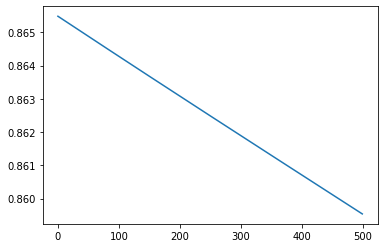

In [168]:
plt.plot(mean_history)

Δεύτερη δοκιμή με learning rate η=0.001 και momentum = 0.6

In [169]:
# lr=0.001 kai momentum = 0.6
rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(100,activation='relu')) # oi relu pane mono sta hidden nmzw
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.001,momentum=0.6),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Epoch 1/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8776 - rmse: 0.9359 - mae: 0.2338
Epoch 2/500
754/754 [==============================] - 0s 502us/step - loss: 0.8775 - rmse: 0.9350 - mae: 0.2338
Epoch 3/500
754/754 [==============================] - 0s 523us/step - loss: 0.8775 - rmse: 0.9325 - mae: 0.2338
Epoch 4/500
754/754 [==============================] - 0s 489us/step - loss: 0.8775 - rmse: 0.9358 - mae: 0.23380s - loss: 0.8523 - rmse: 0.9216 - mae: 0.
Epoch 5/500
754/754 [==============================] - 0s 510us/step - loss: 0.8775 - rmse: 0.9298 - mae: 0.23380s - loss: 0.8369 - rmse: 0.9122 - m
Epoch 6/500
754/754 [==============================] - 0s 511us/step - loss: 0.8774 - rmse: 0.9334 - mae: 0.2338
Epoch 7/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8774 - rmse: 0.9289 - mae: 0.2338
Epoch 8/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8774 - rmse: 0.9335 - mae: 0.2338
Epoch 9/500
754/754 [===

754/754 [==============================] - 1s 1ms/step - loss: 0.8740 - rmse: 0.9330 - mae: 0.2338
Epoch 139/500
754/754 [==============================] - 0s 476us/step - loss: 0.8740 - rmse: 0.9312 - mae: 0.2338
Epoch 140/500
754/754 [==============================] - 0s 477us/step - loss: 0.8740 - rmse: 0.9335 - mae: 0.2338
Epoch 141/500
754/754 [==============================] - 0s 494us/step - loss: 0.8739 - rmse: 0.9306 - mae: 0.2338
Epoch 142/500
754/754 [==============================] - 0s 525us/step - loss: 0.8739 - rmse: 0.9334 - mae: 0.2338
Epoch 143/500
754/754 [==============================] - 1s 943us/step - loss: 0.8739 - rmse: 0.9324 - mae: 0.2338
Epoch 144/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8739 - rmse: 0.9330 - mae: 0.2338
Epoch 145/500
754/754 [==============================] - 0s 581us/step - loss: 0.8738 - rmse: 0.9309 - mae: 0.2338
Epoch 146/500
754/754 [==============================] - ETA: 0s - loss: 0.8845 - rmse: 0.9380 - m

754/754 [==============================] - 0s 501us/step - loss: 0.8705 - rmse: 0.9356 - mae: 0.2349
Epoch 277/500
754/754 [==============================] - 0s 511us/step - loss: 0.8705 - rmse: 0.9282 - mae: 0.2349
Epoch 278/500
754/754 [==============================] - 0s 537us/step - loss: 0.8704 - rmse: 0.9251 - mae: 0.2349
Epoch 279/500
754/754 [==============================] - 1s 781us/step - loss: 0.8704 - rmse: 0.9303 - mae: 0.2349
Epoch 280/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8704 - rmse: 0.9308 - mae: 0.2349
Epoch 281/500
754/754 [==============================] - 1s 800us/step - loss: 0.8704 - rmse: 0.9282 - mae: 0.2350
Epoch 282/500
754/754 [==============================] - 0s 481us/step - loss: 0.8703 - rmse: 0.9283 - mae: 0.2350
Epoch 283/500
754/754 [==============================] - 0s 524us/step - loss: 0.8703 - rmse: 0.9307 - mae: 0.2350
Epoch 284/500
754/754 [==============================] - 0s 497us/step - loss: 0.8703 - rmse: 0.

754/754 [==============================] - 1s 1ms/step - loss: 0.8669 - rmse: 0.9316 - mae: 0.2367
Epoch 416/500
754/754 [==============================] - 0s 467us/step - loss: 0.8669 - rmse: 0.9294 - mae: 0.2367
Epoch 417/500
754/754 [==============================] - 0s 513us/step - loss: 0.8668 - rmse: 0.9238 - mae: 0.2367
Epoch 418/500
754/754 [==============================] - 0s 544us/step - loss: 0.8668 - rmse: 0.9285 - mae: 0.2367
Epoch 419/500
754/754 [==============================] - 0s 512us/step - loss: 0.8668 - rmse: 0.9276 - mae: 0.2367
Epoch 420/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8667 - rmse: 0.9255 - mae: 0.2367
Epoch 421/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8667 - rmse: 0.9290 - mae: 0.2368
Epoch 422/500
754/754 [==============================] - 0s 501us/step - loss: 0.8667 - rmse: 0.9277 - mae: 0.2368
Epoch 423/500
754/754 [==============================] - 0s 501us/step - loss: 0.8667 - rmse: 0.9295

754/754 [==============================] - 0s 517us/step - loss: 0.8318 - rmse: 0.9092 - mae: 0.2219
Epoch 52/500
754/754 [==============================] - 0s 496us/step - loss: 0.8317 - rmse: 0.9084 - mae: 0.2219
Epoch 53/500
754/754 [==============================] - 1s 998us/step - loss: 0.8317 - rmse: 0.9088 - mae: 0.22190s - loss: 0.8152 - rmse: 0.90
Epoch 54/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8317 - rmse: 0.9097 - mae: 0.2219
Epoch 55/500
754/754 [==============================] - 0s 580us/step - loss: 0.8317 - rmse: 0.9046 - mae: 0.2219
Epoch 56/500
754/754 [==============================] - 0s 502us/step - loss: 0.8316 - rmse: 0.9133 - mae: 0.22190s - loss: 0.7651 - rmse: 0.8720 - m
Epoch 57/500
754/754 [==============================] - 0s 546us/step - loss: 0.8316 - rmse: 0.9115 - mae: 0.2219
Epoch 58/500
754/754 [==============================] - 0s 529us/step - loss: 0.8316 - rmse: 0.9077 - mae: 0.2219
Epoch 59/500
754/754 [===============

754/754 [==============================] - 0s 477us/step - loss: 0.8285 - rmse: 0.9092 - mae: 0.2226
Epoch 189/500
754/754 [==============================] - 0s 520us/step - loss: 0.8284 - rmse: 0.9090 - mae: 0.2226
Epoch 190/500
754/754 [==============================] - 0s 516us/step - loss: 0.8284 - rmse: 0.9075 - mae: 0.2226
Epoch 191/500
754/754 [==============================] - 0s 528us/step - loss: 0.8284 - rmse: 0.9092 - mae: 0.2226
Epoch 192/500
754/754 [==============================] - 0s 545us/step - loss: 0.8284 - rmse: 0.9102 - mae: 0.2226
Epoch 193/500
754/754 [==============================] - 0s 558us/step - loss: 0.8283 - rmse: 0.9038 - mae: 0.2227
Epoch 194/500
754/754 [==============================] - 0s 528us/step - loss: 0.8283 - rmse: 0.9059 - mae: 0.2227
Epoch 195/500
754/754 [==============================] - 0s 617us/step - loss: 0.8283 - rmse: 0.9061 - mae: 0.2227
Epoch 196/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8283 - rmse: 0.

754/754 [==============================] - 0s 492us/step - loss: 0.8268 - rmse: 0.9065 - mae: 0.2233
Epoch 258/500
754/754 [==============================] - 0s 525us/step - loss: 0.8268 - rmse: 0.9089 - mae: 0.2233
Epoch 259/500
754/754 [==============================] - 0s 531us/step - loss: 0.8268 - rmse: 0.9056 - mae: 0.2233
Epoch 260/500
754/754 [==============================] - 1s 666us/step - loss: 0.8267 - rmse: 0.9098 - mae: 0.2233
Epoch 261/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8267 - rmse: 0.9059 - mae: 0.2233
Epoch 262/500
754/754 [==============================] - 1s 915us/step - loss: 0.8267 - rmse: 0.9018 - mae: 0.2233
Epoch 263/500
754/754 [==============================] - 0s 501us/step - loss: 0.8267 - rmse: 0.9058 - mae: 0.2234
Epoch 264/500
754/754 [==============================] - 0s 504us/step - loss: 0.8266 - rmse: 0.9045 - mae: 0.2234
Epoch 265/500
754/754 [==============================] - 0s 546us/step - loss: 0.8266 - rmse: 0.

Epoch 327/500
754/754 [==============================] - 0s 650us/step - loss: 0.8251 - rmse: 0.9088 - mae: 0.2241
Epoch 328/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8251 - rmse: 0.9062 - mae: 0.2241
Epoch 329/500
754/754 [==============================] - 1s 923us/step - loss: 0.8251 - rmse: 0.9070 - mae: 0.2242
Epoch 330/500
754/754 [==============================] - 0s 477us/step - loss: 0.8250 - rmse: 0.9048 - mae: 0.2242
Epoch 331/500
754/754 [==============================] - 0s 503us/step - loss: 0.8250 - rmse: 0.9028 - mae: 0.2242
Epoch 332/500
754/754 [==============================] - 0s 537us/step - loss: 0.8250 - rmse: 0.9057 - mae: 0.2242
Epoch 333/500
754/754 [==============================] - 0s 555us/step - loss: 0.8250 - rmse: 0.9092 - mae: 0.2242
Epoch 334/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8249 - rmse: 0.9045 - mae: 0.2242
Epoch 335/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8249 

754/754 [==============================] - 0s 530us/step - loss: 0.8217 - rmse: 0.9075 - mae: 0.2261
Epoch 465/500
754/754 [==============================] - 0s 570us/step - loss: 0.8217 - rmse: 0.9029 - mae: 0.2262
Epoch 466/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8217 - rmse: 0.9041 - mae: 0.2262
Epoch 467/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8217 - rmse: 0.9004 - mae: 0.2262
Epoch 468/500
754/754 [==============================] - 0s 483us/step - loss: 0.8216 - rmse: 0.9048 - mae: 0.2262
Epoch 469/500
754/754 [==============================] - 0s 536us/step - loss: 0.8216 - rmse: 0.9022 - mae: 0.2262
Epoch 470/500
754/754 [==============================] - 0s 531us/step - loss: 0.8216 - rmse: 0.9025 - mae: 0.2262
Epoch 471/500
754/754 [==============================] - 0s 537us/step - loss: 0.8216 - rmse: 0.9045 - mae: 0.2263
Epoch 472/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8215 - rmse: 0.9041

754/754 [==============================] - 0s 497us/step - loss: 0.8374 - rmse: 0.9134 - mae: 0.2226
Epoch 103/500
754/754 [==============================] - 0s 518us/step - loss: 0.8374 - rmse: 0.9086 - mae: 0.2226
Epoch 104/500
754/754 [==============================] - 0s 608us/step - loss: 0.8374 - rmse: 0.9116 - mae: 0.22260s - loss: 0.9183 - rmse: 0.9566
Epoch 105/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8374 - rmse: 0.9131 - mae: 0.2226
Epoch 106/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8373 - rmse: 0.9099 - mae: 0.2226
Epoch 107/500
754/754 [==============================] - 0s 477us/step - loss: 0.8373 - rmse: 0.9089 - mae: 0.2226
Epoch 108/500
754/754 [==============================] - 0s 498us/step - loss: 0.8373 - rmse: 0.9125 - mae: 0.2226
Epoch 109/500
754/754 [==============================] - 0s 572us/step - loss: 0.8373 - rmse: 0.9139 - mae: 0.2226
Epoch 110/500
754/754 [==============================] - 0s 548us/

754/754 [==============================] - 1s 1ms/step - loss: 0.8358 - rmse: 0.9103 - mae: 0.2230
Epoch 173/500
754/754 [==============================] - 0s 593us/step - loss: 0.8358 - rmse: 0.9134 - mae: 0.2230
Epoch 174/500
754/754 [==============================] - 0s 524us/step - loss: 0.8357 - rmse: 0.9145 - mae: 0.2230
Epoch 175/500
754/754 [==============================] - 0s 527us/step - loss: 0.8357 - rmse: 0.9116 - mae: 0.2230
Epoch 176/500
754/754 [==============================] - 0s 541us/step - loss: 0.8357 - rmse: 0.9144 - mae: 0.2230
Epoch 177/500
754/754 [==============================] - 1s 969us/step - loss: 0.8357 - rmse: 0.9099 - mae: 0.2231
Epoch 178/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8356 - rmse: 0.9097 - mae: 0.2231
Epoch 179/500
754/754 [==============================] - 0s 591us/step - loss: 0.8356 - rmse: 0.9094 - mae: 0.2231
Epoch 180/500
754/754 [==============================] - 0s 538us/step - loss: 0.8356 - rmse: 0.91

754/754 [==============================] - 0s 499us/step - loss: 0.8325 - rmse: 0.9086 - mae: 0.2244
Epoch 313/500
754/754 [==============================] - 0s 517us/step - loss: 0.8324 - rmse: 0.9093 - mae: 0.2244
Epoch 314/500
754/754 [==============================] - 0s 530us/step - loss: 0.8324 - rmse: 0.9071 - mae: 0.2244
Epoch 315/500
754/754 [==============================] - 1s 975us/step - loss: 0.8324 - rmse: 0.9094 - mae: 0.2245
Epoch 316/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8324 - rmse: 0.9110 - mae: 0.2245
Epoch 317/500
754/754 [==============================] - 0s 590us/step - loss: 0.8323 - rmse: 0.9128 - mae: 0.22450s - loss: 0.8058 - rmse: 0.8958 - mae: 
Epoch 318/500
754/754 [==============================] - 0s 517us/step - loss: 0.8323 - rmse: 0.9108 - mae: 0.2245
Epoch 319/500
754/754 [==============================] - 0s 551us/step - loss: 0.8323 - rmse: 0.9084 - mae: 0.2245
Epoch 320/500
754/754 [==============================] -

754/754 [==============================] - 0s 571us/step - loss: 0.8292 - rmse: 0.9080 - mae: 0.2263
Epoch 450/500
754/754 [==============================] - 0s 498us/step - loss: 0.8291 - rmse: 0.9079 - mae: 0.2263
Epoch 451/500
754/754 [==============================] - 0s 521us/step - loss: 0.8291 - rmse: 0.9048 - mae: 0.2263
Epoch 452/500
754/754 [==============================] - 0s 532us/step - loss: 0.8291 - rmse: 0.9079 - mae: 0.2263
Epoch 453/500
754/754 [==============================] - 1s 958us/step - loss: 0.8291 - rmse: 0.9086 - mae: 0.2263
Epoch 454/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8290 - rmse: 0.9099 - mae: 0.2263
Epoch 455/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8290 - rmse: 0.9051 - mae: 0.2264
Epoch 456/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8290 - rmse: 0.9095 - mae: 0.2264
Epoch 457/500
754/754 [==============================] - 0s 608us/step - loss: 0.8290 - rmse: 0.9067

755/755 [==============================] - 0s 518us/step - loss: 0.8981 - rmse: 0.9427 - mae: 0.2380
Epoch 19/500
755/755 [==============================] - 0s 548us/step - loss: 0.8981 - rmse: 0.9459 - mae: 0.2380
Epoch 20/500
755/755 [==============================] - 1s 936us/step - loss: 0.8981 - rmse: 0.9429 - mae: 0.2380
Epoch 21/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8981 - rmse: 0.9453 - mae: 0.2380: 0s - loss: 0.8851 - rmse: 0.9378 - mae: 0.
Epoch 22/500
755/755 [==============================] - 1s 694us/step - loss: 0.8980 - rmse: 0.9426 - mae: 0.2380
Epoch 23/500
755/755 [==============================] - ETA: 0s - loss: 0.9055 - rmse: 0.9493 - mae: 0.24 - 0s 495us/step - loss: 0.8980 - rmse: 0.9423 - mae: 0.2380
Epoch 24/500
755/755 [==============================] - 0s 509us/step - loss: 0.8980 - rmse: 0.9443 - mae: 0.23800s - loss: 0.9167 - rmse: 0.9540 - mae: 0.
Epoch 25/500
755/755 [==============================] - 0s 545us/step - loss: 0

755/755 [==============================] - 0s 482us/step - loss: 0.8943 - rmse: 0.9420 - mae: 0.2386
Epoch 154/500
755/755 [==============================] - 0s 516us/step - loss: 0.8943 - rmse: 0.9459 - mae: 0.2386
Epoch 155/500
755/755 [==============================] - 1s 672us/step - loss: 0.8943 - rmse: 0.9384 - mae: 0.2386
Epoch 156/500
755/755 [==============================] - 1s 907us/step - loss: 0.8942 - rmse: 0.9430 - mae: 0.2386
Epoch 157/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8942 - rmse: 0.9436 - mae: 0.2386
Epoch 158/500
755/755 [==============================] - 1s 687us/step - loss: 0.8942 - rmse: 0.9397 - mae: 0.2386
Epoch 159/500
755/755 [==============================] - 0s 487us/step - loss: 0.8941 - rmse: 0.9407 - mae: 0.2386
Epoch 160/500
755/755 [==============================] - 0s 541us/step - loss: 0.8941 - rmse: 0.9431 - mae: 0.2386
Epoch 161/500
755/755 [==============================] - 0s 537us/step - loss: 0.8941 - rmse: 0.

755/755 [==============================] - 0s 533us/step - loss: 0.8904 - rmse: 0.9400 - mae: 0.2403
Epoch 291/500
755/755 [==============================] - 0s 516us/step - loss: 0.8904 - rmse: 0.9375 - mae: 0.2403
Epoch 292/500
755/755 [==============================] - 1s 910us/step - loss: 0.8903 - rmse: 0.9411 - mae: 0.2403
Epoch 293/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8903 - rmse: 0.9423 - mae: 0.2403
Epoch 294/500
755/755 [==============================] - 1s 700us/step - loss: 0.8903 - rmse: 0.9407 - mae: 0.2403
Epoch 295/500
755/755 [==============================] - 0s 462us/step - loss: 0.8902 - rmse: 0.9388 - mae: 0.2404
Epoch 296/500
755/755 [==============================] - 0s 488us/step - loss: 0.8902 - rmse: 0.9419 - mae: 0.2404
Epoch 297/500
755/755 [==============================] - 0s 517us/step - loss: 0.8902 - rmse: 0.9401 - mae: 0.2404
Epoch 298/500
755/755 [==============================] - 0s 576us/step - loss: 0.8902 - rmse: 0.

755/755 [==============================] - 1s 857us/step - loss: 0.8863 - rmse: 0.9358 - mae: 0.2427
Epoch 429/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8862 - rmse: 0.9406 - mae: 0.2427
Epoch 430/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8862 - rmse: 0.9398 - mae: 0.2428
Epoch 431/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8862 - rmse: 0.9369 - mae: 0.2428: 0s - loss: 0.9153 - rmse: 0.9549 -
Epoch 432/500
755/755 [==============================] - 1s 775us/step - loss: 0.8861 - rmse: 0.9374 - mae: 0.2428
Epoch 433/500
755/755 [==============================] - 0s 496us/step - loss: 0.8861 - rmse: 0.9352 - mae: 0.2428
Epoch 434/500
755/755 [==============================] - 0s 521us/step - loss: 0.8861 - rmse: 0.9387 - mae: 0.2428
Epoch 435/500
755/755 [==============================] - 0s 507us/step - loss: 0.8860 - rmse: 0.9397 - mae: 0.2429
Epoch 436/500
755/755 [==============================] - 0s 599u

Epoch 497/500
755/755 [==============================] - 0s 502us/step - loss: 0.8841 - rmse: 0.9388 - mae: 0.2442
Epoch 498/500
755/755 [==============================] - 1s 967us/step - loss: 0.8841 - rmse: 0.9377 - mae: 0.2442
Epoch 499/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8840 - rmse: 0.9390 - mae: 0.2442
Epoch 500/500
188/188 [==============================] - 1s 3ms/step
-----------------------------------------------------
Fold number 4: Sto test set exw loss :0.719359371256321, rmse: 0.8441665768623352 kai mae:0.2057676911354065
Epoch 1/500
755/755 [==============================] - 1s 996us/step - loss: 0.8783 - rmse: 0.9335 - mae: 0.2328
Epoch 2/500
755/755 [==============================] - 1s 800us/step - loss: 0.8783 - rmse: 0.9365 - mae: 0.2328
Epoch 3/500
755/755 [==============================] - 1s 2ms/step - loss: 0.8783 - rmse: 0.9345 - mae: 0.2328
Epoch 4/500
755/755 [==============================] - 1s 720us/step - loss: 0.8782 - rm

755/755 [==============================] - 1s 1ms/step - loss: 0.8749 - rmse: 0.9348 - mae: 0.2330
Epoch 134/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8748 - rmse: 0.9351 - mae: 0.2330
Epoch 135/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8748 - rmse: 0.9334 - mae: 0.2330
Epoch 136/500
755/755 [==============================] - 1s 910us/step - loss: 0.8748 - rmse: 0.9311 - mae: 0.23300s - loss: 0.7992 - rmse: 0. - ETA: 0s - loss: 0.8793 - rmse: 0.9352 - mae: 0.23
Epoch 137/500
755/755 [==============================] - 0s 469us/step - loss: 0.8748 - rmse: 0.9300 - mae: 0.2330
Epoch 138/500
755/755 [==============================] - 0s 493us/step - loss: 0.8747 - rmse: 0.9336 - mae: 0.2330
Epoch 139/500
755/755 [==============================] - 0s 505us/step - loss: 0.8747 - rmse: 0.9310 - mae: 0.2330
Epoch 140/500
755/755 [==============================] - 0s 518us/step - loss: 0.8747 - rmse: 0.9339 - mae: 0.23300s - loss: 0.8530 - r

755/755 [==============================] - 1s 937us/step - loss: 0.8712 - rmse: 0.9308 - mae: 0.2343
Epoch 274/500
755/755 [==============================] - 0s 493us/step - loss: 0.8711 - rmse: 0.9315 - mae: 0.2343
Epoch 275/500
755/755 [==============================] - 0s 560us/step - loss: 0.8711 - rmse: 0.9307 - mae: 0.2343
Epoch 276/500
755/755 [==============================] - 0s 549us/step - loss: 0.8711 - rmse: 0.9292 - mae: 0.2343
Epoch 277/500
755/755 [==============================] - 0s 525us/step - loss: 0.8711 - rmse: 0.9298 - mae: 0.2343
Epoch 278/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8710 - rmse: 0.9312 - mae: 0.2344
Epoch 279/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8710 - rmse: 0.9267 - mae: 0.2344
Epoch 280/500
755/755 [==============================] - 0s 536us/step - loss: 0.8710 - rmse: 0.9291 - mae: 0.2344
Epoch 281/500
755/755 [==============================] - 0s 479us/step - loss: 0.8709 - rmse: 0.92

755/755 [==============================] - 0s 601us/step - loss: 0.8674 - rmse: 0.9248 - mae: 0.2363
Epoch 411/500
755/755 [==============================] - 0s 483us/step - loss: 0.8674 - rmse: 0.9282 - mae: 0.2363
Epoch 412/500
755/755 [==============================] - 0s 488us/step - loss: 0.8674 - rmse: 0.9280 - mae: 0.2364
Epoch 413/500
755/755 [==============================] - 0s 511us/step - loss: 0.8674 - rmse: 0.9299 - mae: 0.23640s - loss: 0.8679 - rmse: 0.9289 - mae: 0.23
Epoch 414/500
755/755 [==============================] - 1s 677us/step - loss: 0.8673 - rmse: 0.9271 - mae: 0.23640s - loss: 0.8578 - rmse: 0.9237 - m
Epoch 415/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8673 - rmse: 0.9338 - mae: 0.2364
Epoch 416/500
755/755 [==============================] - 1s 963us/step - loss: 0.8673 - rmse: 0.9290 - mae: 0.2364
Epoch 417/500
755/755 [==============================] - 0s 451us/step - loss: 0.8672 - rmse: 0.9314 - mae: 0.2364
Epoch 418/500
75

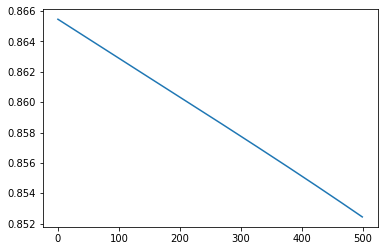

In [170]:
plt.plot(mean_history)

Δοκιμή με learning rate η=0.05 και momentum = 0.6

In [171]:
# lr=0.05 kai momentum = 0.6
rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.05,momentum=0.6),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Epoch 1/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8770 - rmse: 0.9312 - mae: 0.2337
Epoch 2/500
754/754 [==============================] - 0s 630us/step - loss: 0.8756 - rmse: 0.9299 - mae: 0.2336
Epoch 3/500
754/754 [==============================] - 0s 573us/step - loss: 0.8743 - rmse: 0.9306 - mae: 0.2338
Epoch 4/500
754/754 [==============================] - 0s 609us/step - loss: 0.8730 - rmse: 0.9319 - mae: 0.2341
Epoch 5/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8716 - rmse: 0.9306 - mae: 0.2345
Epoch 6/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8703 - rmse: 0.9297 - mae: 0.2350
Epoch 7/500
754/754 [==============================] - 0s 640us/step - loss: 0.8689 - rmse: 0.9294 - mae: 0.2357
Epoch 8/500
754/754 [==============================] - 0s 558us/step - loss: 0.8676 - rmse: 0.9276 - mae: 0.2364
Epoch 9/500
754/754 [==============================] - 0s 569us/step - loss: 0.8662 - rmse: 0.9261 - m

754/754 [==============================] - 0s 650us/step - loss: 0.7137 - rmse: 0.8436 - mae: 0.3681
Epoch 142/500
754/754 [==============================] - 0s 505us/step - loss: 0.7136 - rmse: 0.8434 - mae: 0.3691
Epoch 143/500
754/754 [==============================] - 0s 527us/step - loss: 0.7136 - rmse: 0.8424 - mae: 0.3686
Epoch 144/500
754/754 [==============================] - 0s 547us/step - loss: 0.7136 - rmse: 0.8399 - mae: 0.3689
Epoch 145/500
754/754 [==============================] - 1s 740us/step - loss: 0.7135 - rmse: 0.8444 - mae: 0.3683
Epoch 146/500
754/754 [==============================] - 1s 1ms/step - loss: 0.7135 - rmse: 0.8410 - mae: 0.3682
Epoch 147/500
754/754 [==============================] - 1s 890us/step - loss: 0.7134 - rmse: 0.8412 - mae: 0.3682
Epoch 148/500
754/754 [==============================] - 0s 491us/step - loss: 0.7134 - rmse: 0.8428 - mae: 0.3687
Epoch 149/500
754/754 [==============================] - 0s 533us/step - loss: 0.7134 - rmse: 0.

754/754 [==============================] - 1s 1ms/step - loss: 0.7075 - rmse: 0.8393 - mae: 0.3680
Epoch 280/500
754/754 [==============================] - 1s 959us/step - loss: 0.7074 - rmse: 0.8393 - mae: 0.3676
Epoch 281/500
754/754 [==============================] - 0s 488us/step - loss: 0.7074 - rmse: 0.8394 - mae: 0.3682
Epoch 282/500
754/754 [==============================] - 0s 535us/step - loss: 0.7073 - rmse: 0.8406 - mae: 0.3679
Epoch 283/500
754/754 [==============================] - 0s 537us/step - loss: 0.7073 - rmse: 0.8388 - mae: 0.3680
Epoch 284/500
754/754 [==============================] - 0s 522us/step - loss: 0.7072 - rmse: 0.8401 - mae: 0.3682
Epoch 285/500
754/754 [==============================] - 1s 1ms/step - loss: 0.7071 - rmse: 0.8387 - mae: 0.3680
Epoch 286/500
754/754 [==============================] - 1s 1ms/step - loss: 0.7071 - rmse: 0.8398 - mae: 0.3680: 0s - loss: 0.7216 - rmse: 0.84
Epoch 287/500
754/754 [==============================] - 1s 1ms/step

754/754 [==============================] - 0s 544us/step - loss: 0.6984 - rmse: 0.8320 - mae: 0.36570s - loss: 0.6835 - rmse: 0.8255 - mae: 0.
Epoch 421/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6984 - rmse: 0.8333 - mae: 0.3666
Epoch 422/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6983 - rmse: 0.8325 - mae: 0.3649
Epoch 423/500
754/754 [==============================] - 0s 543us/step - loss: 0.6983 - rmse: 0.8334 - mae: 0.3628
Epoch 424/500
754/754 [==============================] - 0s 526us/step - loss: 0.6982 - rmse: 0.8345 - mae: 0.3654
Epoch 425/500
754/754 [==============================] - 0s 546us/step - loss: 0.6982 - rmse: 0.8361 - mae: 0.3659
Epoch 426/500
754/754 [==============================] - 0s 544us/step - loss: 0.6981 - rmse: 0.8338 - mae: 0.3651
Epoch 427/500
754/754 [==============================] - 1s 899us/step - loss: 0.6980 - rmse: 0.8330 - mae: 0.3655
Epoch 428/500
754/754 [==============================] -

754/754 [==============================] - 1s 1ms/step - loss: 0.6868 - rmse: 0.8263 - mae: 0.3548
Epoch 58/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6864 - rmse: 0.8271 - mae: 0.3550
Epoch 59/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6861 - rmse: 0.8282 - mae: 0.3543
Epoch 60/500
754/754 [==============================] - 0s 524us/step - loss: 0.6858 - rmse: 0.8239 - mae: 0.35460s - loss: 0.7203 - rmse: 0.8467 - m
Epoch 61/500
754/754 [==============================] - 0s 514us/step - loss: 0.6856 - rmse: 0.8263 - mae: 0.3540
Epoch 62/500
754/754 [==============================] - 0s 529us/step - loss: 0.6854 - rmse: 0.8216 - mae: 0.3535
Epoch 63/500
754/754 [==============================] - 0s 559us/step - loss: 0.6852 - rmse: 0.8247 - mae: 0.3531
Epoch 64/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6851 - rmse: 0.8241 - mae: 0.3526
Epoch 65/500
754/754 [==============================] - 1s 1ms/step - los

754/754 [==============================] - 0s 545us/step - loss: 0.6806 - rmse: 0.8214 - mae: 0.3525
Epoch 196/500
754/754 [==============================] - 1s 973us/step - loss: 0.6805 - rmse: 0.8229 - mae: 0.3519
Epoch 197/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6805 - rmse: 0.8254 - mae: 0.3512
Epoch 198/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6805 - rmse: 0.8225 - mae: 0.3521
Epoch 199/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6804 - rmse: 0.8227 - mae: 0.3520
Epoch 200/500
754/754 [==============================] - 0s 635us/step - loss: 0.6804 - rmse: 0.8232 - mae: 0.3521
Epoch 201/500
754/754 [==============================] - 0s 533us/step - loss: 0.6804 - rmse: 0.8221 - mae: 0.3516
Epoch 202/500
754/754 [==============================] - 0s 557us/step - loss: 0.6803 - rmse: 0.8252 - mae: 0.3520
Epoch 203/500
754/754 [==============================] - 0s 530us/step - loss: 0.6802 - rmse: 0.8215

Epoch 266/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6776 - rmse: 0.8222 - mae: 0.3511
Epoch 267/500
754/754 [==============================] - 1s 782us/step - loss: 0.6776 - rmse: 0.8205 - mae: 0.3518
Epoch 268/500
754/754 [==============================] - 0s 486us/step - loss: 0.6775 - rmse: 0.8202 - mae: 0.3523
Epoch 269/500
754/754 [==============================] - 0s 525us/step - loss: 0.6775 - rmse: 0.8213 - mae: 0.3511
Epoch 270/500
754/754 [==============================] - 0s 557us/step - loss: 0.6774 - rmse: 0.8194 - mae: 0.3522
Epoch 271/500
754/754 [==============================] - 1s 751us/step - loss: 0.6774 - rmse: 0.8206 - mae: 0.35160s - loss: 0.6893 - rmse: 0.8292 - m
Epoch 272/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6773 - rmse: 0.8223 - mae: 0.3511
Epoch 273/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6773 - rmse: 0.8203 - mae: 0.3510: 0s - loss: 0.6738 - rmse: 0.8186 - mae: 0.
Epoch 

Epoch 336/500
754/754 [==============================] - 0s 547us/step - loss: 0.6740 - rmse: 0.8192 - mae: 0.3517
Epoch 337/500
754/754 [==============================] - 1s 812us/step - loss: 0.6739 - rmse: 0.8165 - mae: 0.3507
Epoch 338/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6738 - rmse: 0.8183 - mae: 0.3509
Epoch 339/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6738 - rmse: 0.8178 - mae: 0.3508
Epoch 340/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6737 - rmse: 0.8191 - mae: 0.3508
Epoch 341/500
754/754 [==============================] - 1s 736us/step - loss: 0.6736 - rmse: 0.8196 - mae: 0.3507
Epoch 342/500
754/754 [==============================] - 0s 505us/step - loss: 0.6736 - rmse: 0.8147 - mae: 0.3508
Epoch 343/500
754/754 [==============================] - 0s 526us/step - loss: 0.6736 - rmse: 0.8177 - mae: 0.3515
Epoch 344/500
754/754 [==============================] - 0s 538us/step - loss: 0.6735 

754/754 [==============================] - 1s 879us/step - loss: 0.6662 - rmse: 0.8130 - mae: 0.3493
Epoch 477/500
754/754 [==============================] - 0s 443us/step - loss: 0.6662 - rmse: 0.8146 - mae: 0.3477
Epoch 478/500
754/754 [==============================] - 0s 484us/step - loss: 0.6661 - rmse: 0.8148 - mae: 0.3484
Epoch 479/500
754/754 [==============================] - 0s 497us/step - loss: 0.6661 - rmse: 0.8133 - mae: 0.3496
Epoch 480/500
754/754 [==============================] - 0s 521us/step - loss: 0.6660 - rmse: 0.8139 - mae: 0.3496
Epoch 481/500
754/754 [==============================] - 1s 903us/step - loss: 0.6660 - rmse: 0.8147 - mae: 0.34710s - loss: 0.6691 - rmse: 0.8153 - mae: 
Epoch 482/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6659 - rmse: 0.8127 - mae: 0.3498: 0s - loss: 0.6697 - rmse: 0.8169 - mae: 0.35
Epoch 483/500
754/754 [==============================] - 1s 998us/step - loss: 0.6659 - rmse: 0.8122 - mae: 0.34740s - loss: 

754/754 [==============================] - 1s 1ms/step - loss: 0.6886 - rmse: 0.8295 - mae: 0.3539
Epoch 113/500
754/754 [==============================] - 0s 496us/step - loss: 0.6886 - rmse: 0.8278 - mae: 0.3534
Epoch 114/500
754/754 [==============================] - 0s 541us/step - loss: 0.6886 - rmse: 0.8285 - mae: 0.3545
Epoch 115/500
754/754 [==============================] - 0s 549us/step - loss: 0.6886 - rmse: 0.8269 - mae: 0.3533
Epoch 116/500
754/754 [==============================] - 0s 544us/step - loss: 0.6885 - rmse: 0.8266 - mae: 0.35340s - loss: 0.7023 - rmse: 0.8356 - mae: 
Epoch 117/500
754/754 [==============================] - 1s 982us/step - loss: 0.6885 - rmse: 0.8255 - mae: 0.3531
Epoch 118/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6885 - rmse: 0.8287 - mae: 0.3531
Epoch 119/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6884 - rmse: 0.8267 - mae: 0.3533
Epoch 120/500
754/754 [==============================] - 1s 

Epoch 182/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6864 - rmse: 0.8250 - mae: 0.3536
Epoch 183/500
754/754 [==============================] - 1s 975us/step - loss: 0.6863 - rmse: 0.8258 - mae: 0.3533
Epoch 184/500
754/754 [==============================] - 0s 472us/step - loss: 0.6863 - rmse: 0.8291 - mae: 0.3532
Epoch 185/500
754/754 [==============================] - 0s 552us/step - loss: 0.6863 - rmse: 0.8260 - mae: 0.35360s - loss: 0.6758 - rmse: 0.8216
Epoch 186/500
754/754 [==============================] - 0s 547us/step - loss: 0.6862 - rmse: 0.8271 - mae: 0.3537
Epoch 187/500
754/754 [==============================] - 0s 639us/step - loss: 0.6862 - rmse: 0.8252 - mae: 0.3536
Epoch 188/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6862 - rmse: 0.8300 - mae: 0.3533
Epoch 189/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6861 - rmse: 0.8280 - mae: 0.3536
Epoch 190/500
754/754 [==============================]

754/754 [==============================] - 1s 1ms/step - loss: 0.6797 - rmse: 0.8235 - mae: 0.3520
Epoch 323/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6797 - rmse: 0.8187 - mae: 0.3509
Epoch 324/500
754/754 [==============================] - 1s 919us/step - loss: 0.6795 - rmse: 0.8225 - mae: 0.35260s - loss: 0.6719 - rmse: 0.8179 - mae: 0.
Epoch 325/500
754/754 [==============================] - 0s 493us/step - loss: 0.6795 - rmse: 0.8197 - mae: 0.3533
Epoch 326/500
754/754 [==============================] - 0s 518us/step - loss: 0.6794 - rmse: 0.8206 - mae: 0.3531
Epoch 327/500
754/754 [==============================] - 0s 535us/step - loss: 0.6794 - rmse: 0.8191 - mae: 0.3520
Epoch 328/500
754/754 [==============================] - 0s 521us/step - loss: 0.6793 - rmse: 0.8217 - mae: 0.3513
Epoch 329/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6792 - rmse: 0.8205 - mae: 0.3525
Epoch 330/500
754/754 [==============================] - 1

Epoch 464/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6706 - rmse: 0.8149 - mae: 0.3504
Epoch 465/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6706 - rmse: 0.8145 - mae: 0.3478
Epoch 466/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6705 - rmse: 0.8172 - mae: 0.3490
Epoch 467/500
754/754 [==============================] - 0s 581us/step - loss: 0.6704 - rmse: 0.8154 - mae: 0.34810s - loss: 0.6294 - rmse: 0.7933
Epoch 468/500
754/754 [==============================] - 0s 534us/step - loss: 0.6704 - rmse: 0.8172 - mae: 0.3499
Epoch 469/500
754/754 [==============================] - 0s 643us/step - loss: 0.6704 - rmse: 0.8192 - mae: 0.3490
Epoch 470/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6702 - rmse: 0.8160 - mae: 0.3490
Epoch 471/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6703 - rmse: 0.8175 - mae: 0.3495
Epoch 472/500
754/754 [==============================] - 1

755/755 [==============================] - 1s 1ms/step - loss: 0.7307 - rmse: 0.8528 - mae: 0.3739
Epoch 104/500
755/755 [==============================] - 0s 511us/step - loss: 0.7307 - rmse: 0.8523 - mae: 0.3743
Epoch 105/500
755/755 [==============================] - 0s 517us/step - loss: 0.7307 - rmse: 0.8532 - mae: 0.3738
Epoch 106/500
755/755 [==============================] - 0s 498us/step - loss: 0.7306 - rmse: 0.8561 - mae: 0.3737
Epoch 107/500
755/755 [==============================] - 0s 509us/step - loss: 0.7306 - rmse: 0.8529 - mae: 0.3748
Epoch 108/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7306 - rmse: 0.8531 - mae: 0.3739
Epoch 109/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7305 - rmse: 0.8512 - mae: 0.3739
Epoch 110/500
755/755 [==============================] - 1s 971us/step - loss: 0.7305 - rmse: 0.8520 - mae: 0.37410s - loss: 0.7299 - rmse: 0.8513 - mae: 0.37
Epoch 111/500
755/755 [==============================] -

755/755 [==============================] - 1s 1ms/step - loss: 0.7250 - rmse: 0.8511 - mae: 0.3738
Epoch 240/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7249 - rmse: 0.8484 - mae: 0.3740
Epoch 241/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7248 - rmse: 0.8480 - mae: 0.3745
Epoch 242/500
755/755 [==============================] - 1s 727us/step - loss: 0.7248 - rmse: 0.8489 - mae: 0.3742
Epoch 243/500
755/755 [==============================] - 1s 765us/step - loss: 0.7248 - rmse: 0.8479 - mae: 0.3732
Epoch 244/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7247 - rmse: 0.8482 - mae: 0.3738
Epoch 245/500
755/755 [==============================] - 1s 2ms/step - loss: 0.7247 - rmse: 0.8512 - mae: 0.3731
Epoch 246/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7246 - rmse: 0.8480 - mae: 0.3738
Epoch 247/500
755/755 [==============================] - 1s 2ms/step - loss: 0.7246 - rmse: 0.8487 - mae: 

755/755 [==============================] - 0s 560us/step - loss: 0.7166 - rmse: 0.8471 - mae: 0.3711
Epoch 378/500
755/755 [==============================] - 0s 541us/step - loss: 0.7165 - rmse: 0.8442 - mae: 0.3729
Epoch 379/500
755/755 [==============================] - 0s 568us/step - loss: 0.7165 - rmse: 0.8461 - mae: 0.3708
Epoch 380/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7164 - rmse: 0.8438 - mae: 0.3726
Epoch 381/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7163 - rmse: 0.8429 - mae: 0.3711
Epoch 382/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7163 - rmse: 0.8439 - mae: 0.3716
Epoch 383/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7162 - rmse: 0.8439 - mae: 0.3705
Epoch 384/500
755/755 [==============================] - 0s 510us/step - loss: 0.7162 - rmse: 0.8456 - mae: 0.3712
Epoch 385/500
755/755 [==============================] - 0s 527us/step - loss: 0.7161 - rmse: 0.8431 -

755/755 [==============================] - 0s 618us/step - loss: 0.8629 - rmse: 0.9287 - mae: 0.2392
Epoch 13/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8614 - rmse: 0.9240 - mae: 0.2404
Epoch 14/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8599 - rmse: 0.9256 - mae: 0.2415
Epoch 15/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8583 - rmse: 0.9232 - mae: 0.2427
Epoch 16/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8567 - rmse: 0.9233 - mae: 0.2441
Epoch 17/500
755/755 [==============================] - 0s 504us/step - loss: 0.8549 - rmse: 0.9222 - mae: 0.2455
Epoch 18/500
755/755 [==============================] - 0s 526us/step - loss: 0.8531 - rmse: 0.9184 - mae: 0.2470
Epoch 19/500
755/755 [==============================] - 0s 548us/step - loss: 0.8512 - rmse: 0.9203 - mae: 0.2486
Epoch 20/500
755/755 [==============================] - 0s 569us/step - loss: 0.8492 - rmse: 0.9207 - mae: 0.

Epoch 152/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7139 - rmse: 0.8410 - mae: 0.3677
Epoch 153/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7139 - rmse: 0.8406 - mae: 0.3674
Epoch 154/500
755/755 [==============================] - 1s 971us/step - loss: 0.7138 - rmse: 0.8424 - mae: 0.3673
Epoch 155/500
755/755 [==============================] - 0s 540us/step - loss: 0.7138 - rmse: 0.8415 - mae: 0.3678
Epoch 156/500
755/755 [==============================] - 0s 573us/step - loss: 0.7137 - rmse: 0.8416 - mae: 0.3676
Epoch 157/500
755/755 [==============================] - 0s 577us/step - loss: 0.7137 - rmse: 0.8415 - mae: 0.3672
Epoch 158/500
755/755 [==============================] - 1s 830us/step - loss: 0.7137 - rmse: 0.8449 - mae: 0.3665
Epoch 159/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7136 - rmse: 0.8430 - mae: 0.3670
Epoch 160/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7136 - 

755/755 [==============================] - 0s 527us/step - loss: 0.7068 - rmse: 0.8370 - mae: 0.3671
Epoch 290/500
755/755 [==============================] - 0s 514us/step - loss: 0.7066 - rmse: 0.8417 - mae: 0.3662
Epoch 291/500
755/755 [==============================] - 0s 549us/step - loss: 0.7066 - rmse: 0.8396 - mae: 0.3670
Epoch 292/500
755/755 [==============================] - 0s 576us/step - loss: 0.7065 - rmse: 0.8379 - mae: 0.3673
Epoch 293/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7064 - rmse: 0.8420 - mae: 0.3674
Epoch 294/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7063 - rmse: 0.8370 - mae: 0.3660
Epoch 295/500
755/755 [==============================] - ETA: 0s - loss: 0.7001 - rmse: 0.8348 - mae: 0.36 - 1s 1ms/step - loss: 0.7063 - rmse: 0.8405 - mae: 0.3673
Epoch 296/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7062 - rmse: 0.8399 - mae: 0.3672
Epoch 297/500
755/755 [===========================

755/755 [==============================] - 0s 558us/step - loss: 0.7016 - rmse: 0.8360 - mae: 0.3658
Epoch 360/500
755/755 [==============================] - 0s 574us/step - loss: 0.7014 - rmse: 0.8364 - mae: 0.3648
Epoch 361/500
755/755 [==============================] - 1s 908us/step - loss: 0.7014 - rmse: 0.8360 - mae: 0.3655
Epoch 362/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7013 - rmse: 0.8373 - mae: 0.3657
Epoch 363/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7012 - rmse: 0.8363 - mae: 0.3656
Epoch 364/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7012 - rmse: 0.8363 - mae: 0.3664
Epoch 365/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7011 - rmse: 0.8348 - mae: 0.3654
Epoch 366/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7010 - rmse: 0.8366 - mae: 0.3649
Epoch 367/500
755/755 [==============================] - 1s 699us/step - loss: 0.7009 - rmse: 0.8366 - m

755/755 [==============================] - 0s 563us/step - loss: 0.6919 - rmse: 0.8306 - mae: 0.3596
Epoch 500/500
188/188 [==============================] - 0s 2ms/step
-----------------------------------------------------
Fold number 5: Sto test set exw loss :0.6989889943853338, rmse: 0.8353073000907898 kai mae:0.3647601306438446
------------------------------------------------------------------------
Average test scores gia ola ta folds:
> RMSE: 0.8484920144081116 (+- 0.040379193303486306)
> MAE: 0.36810389161109924 (+-0.015133767260127882)


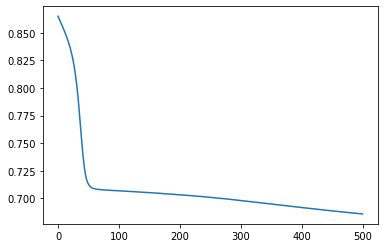

In [172]:
plt.plot(mean_history)

Δοκιμή με learning rate η=0.1 και momentum = 0.6

In [173]:
# lr=0.1 kai momentum = 0.6
rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.1,momentum=0.6),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Epoch 1/500
754/754 [==============================] - 1s 844us/step - loss: 0.8765 - rmse: 0.9315 - mae: 0.2320
Epoch 2/500
754/754 [==============================] - 0s 430us/step - loss: 0.8740 - rmse: 0.9323 - mae: 0.2322
Epoch 3/500
754/754 [==============================] - 0s 468us/step - loss: 0.8715 - rmse: 0.9317 - mae: 0.2330
Epoch 4/500
754/754 [==============================] - 0s 419us/step - loss: 0.8691 - rmse: 0.9247 - mae: 0.2341
Epoch 5/500
754/754 [==============================] - 0s 440us/step - loss: 0.8666 - rmse: 0.9302 - mae: 0.2353
Epoch 6/500
754/754 [==============================] - 0s 431us/step - loss: 0.8641 - rmse: 0.9266 - mae: 0.2368
Epoch 7/500
754/754 [==============================] - 0s 486us/step - loss: 0.8615 - rmse: 0.9262 - mae: 0.2385
Epoch 8/500
754/754 [==============================] - 0s 415us/step - loss: 0.8589 - rmse: 0.9184 - mae: 0.2404
Epoch 9/500
754/754 [==============================] - 0s 422us/step - loss: 0.8561 - rmse: 0.92

754/754 [==============================] - 1s 931us/step - loss: 0.7080 - rmse: 0.8419 - mae: 0.3672
Epoch 139/500
754/754 [==============================] - 0s 551us/step - loss: 0.7079 - rmse: 0.8402 - mae: 0.3676
Epoch 140/500
754/754 [==============================] - 0s 416us/step - loss: 0.7078 - rmse: 0.8398 - mae: 0.3699
Epoch 141/500
754/754 [==============================] - 0s 448us/step - loss: 0.7077 - rmse: 0.8393 - mae: 0.3681
Epoch 142/500
754/754 [==============================] - 0s 437us/step - loss: 0.7076 - rmse: 0.8374 - mae: 0.3672
Epoch 143/500
754/754 [==============================] - 0s 433us/step - loss: 0.7075 - rmse: 0.8378 - mae: 0.3662
Epoch 144/500
754/754 [==============================] - 1s 1ms/step - loss: 0.7073 - rmse: 0.8401 - mae: 0.3670
Epoch 145/500
754/754 [==============================] - 1s 1ms/step - loss: 0.7072 - rmse: 0.8380 - mae: 0.3670: 0s - loss: 0.6966 - rmse: 0.8331 - mae
Epoch 146/500
754/754 [==============================] - 0

754/754 [==============================] - 1s 1ms/step - loss: 0.6925 - rmse: 0.8279 - mae: 0.3629
Epoch 278/500
754/754 [==============================] - 1s 985us/step - loss: 0.6922 - rmse: 0.8326 - mae: 0.3593
Epoch 279/500
754/754 [==============================] - 1s 695us/step - loss: 0.6921 - rmse: 0.8295 - mae: 0.3615
Epoch 280/500
754/754 [==============================] - 0s 443us/step - loss: 0.6922 - rmse: 0.8283 - mae: 0.3601
Epoch 281/500
754/754 [==============================] - 0s 451us/step - loss: 0.6919 - rmse: 0.8322 - mae: 0.3574
Epoch 282/500
754/754 [==============================] - 0s 444us/step - loss: 0.6920 - rmse: 0.8284 - mae: 0.3629
Epoch 283/500
754/754 [==============================] - 0s 467us/step - loss: 0.6918 - rmse: 0.8318 - mae: 0.3599
Epoch 284/500
754/754 [==============================] - 1s 897us/step - loss: 0.6919 - rmse: 0.8273 - mae: 0.3591
Epoch 285/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6915 - rmse: 0.83

754/754 [==============================] - 1s 1ms/step - loss: 0.6847 - rmse: 0.8249 - mae: 0.3547: 0s - loss: 0.6973 - rmse: 0.83
Epoch 414/500
754/754 [==============================] - 0s 428us/step - loss: 0.6845 - rmse: 0.8267 - mae: 0.3554
Epoch 415/500
754/754 [==============================] - 0s 429us/step - loss: 0.6847 - rmse: 0.8248 - mae: 0.3558
Epoch 416/500
754/754 [==============================] - 0s 445us/step - loss: 0.6847 - rmse: 0.8264 - mae: 0.3565
Epoch 417/500
754/754 [==============================] - 0s 503us/step - loss: 0.6844 - rmse: 0.8271 - mae: 0.3583
Epoch 418/500
754/754 [==============================] - 0s 533us/step - loss: 0.6849 - rmse: 0.8247 - mae: 0.3544
Epoch 419/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6846 - rmse: 0.8269 - mae: 0.3553
Epoch 420/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6842 - rmse: 0.8270 - mae: 0.3532
Epoch 421/500
754/754 [==============================] - 0s 424us/st

754/754 [==============================] - 0s 485us/step - loss: 0.6841 - rmse: 0.8248 - mae: 0.3518
Epoch 49/500
754/754 [==============================] - 1s 857us/step - loss: 0.6841 - rmse: 0.8221 - mae: 0.3509
Epoch 50/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6840 - rmse: 0.8254 - mae: 0.3510: 0s - loss: 0.6739 - rmse: 0.8180 - m
Epoch 51/500
754/754 [==============================] - 1s 750us/step - loss: 0.6840 - rmse: 0.8218 - mae: 0.3518
Epoch 52/500
754/754 [==============================] - 0s 448us/step - loss: 0.6840 - rmse: 0.8234 - mae: 0.3504
Epoch 53/500
754/754 [==============================] - 0s 485us/step - loss: 0.6839 - rmse: 0.8264 - mae: 0.3503
Epoch 54/500
754/754 [==============================] - 0s 502us/step - loss: 0.6838 - rmse: 0.8263 - mae: 0.3502
Epoch 55/500
754/754 [==============================] - 0s 512us/step - loss: 0.6838 - rmse: 0.8261 - mae: 0.3519
Epoch 56/500
754/754 [==============================] - 1s 1ms/st

754/754 [==============================] - 1s 1ms/step - loss: 0.6734 - rmse: 0.8183 - mae: 0.3515: 0s - loss: 0.6991 - rmse: 0.8347 - m
Epoch 186/500
754/754 [==============================] - 1s 728us/step - loss: 0.6732 - rmse: 0.8212 - mae: 0.3493
Epoch 187/500
754/754 [==============================] - 0s 464us/step - loss: 0.6731 - rmse: 0.8192 - mae: 0.3498
Epoch 188/500
754/754 [==============================] - 0s 473us/step - loss: 0.6731 - rmse: 0.8197 - mae: 0.3527
Epoch 189/500
754/754 [==============================] - 0s 484us/step - loss: 0.6729 - rmse: 0.8204 - mae: 0.3509
Epoch 190/500
754/754 [==============================] - 0s 501us/step - loss: 0.6729 - rmse: 0.8191 - mae: 0.3513
Epoch 191/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6727 - rmse: 0.8179 - mae: 0.3497
Epoch 192/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6726 - rmse: 0.8167 - mae: 0.3505
Epoch 193/500
754/754 [==============================] - 1s 1m

754/754 [==============================] - 1s 1ms/step - loss: 0.6609 - rmse: 0.8107 - mae: 0.3437
Epoch 322/500
754/754 [==============================] - 1s 979us/step - loss: 0.6607 - rmse: 0.8115 - mae: 0.3446
Epoch 323/500
754/754 [==============================] - 0s 427us/step - loss: 0.6606 - rmse: 0.8131 - mae: 0.3437
Epoch 324/500
754/754 [==============================] - 0s 464us/step - loss: 0.6606 - rmse: 0.8140 - mae: 0.3434
Epoch 325/500
754/754 [==============================] - 0s 515us/step - loss: 0.6607 - rmse: 0.8109 - mae: 0.3459
Epoch 326/500
754/754 [==============================] - 0s 481us/step - loss: 0.6606 - rmse: 0.8109 - mae: 0.3452
Epoch 327/500
754/754 [==============================] - 1s 859us/step - loss: 0.6606 - rmse: 0.8133 - mae: 0.3468
Epoch 328/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6603 - rmse: 0.8093 - mae: 0.3440
Epoch 329/500
754/754 [==============================] - 1s 764us/step - loss: 0.6603 - rmse: 0.81

754/754 [==============================] - 0s 491us/step - loss: 0.6548 - rmse: 0.8048 - mae: 0.3388
Epoch 458/500
754/754 [==============================] - 0s 482us/step - loss: 0.6549 - rmse: 0.8085 - mae: 0.3404
Epoch 459/500
754/754 [==============================] - ETA: 0s - loss: 0.6608 - rmse: 0.8111 - mae: 0.34 - 0s 485us/step - loss: 0.6548 - rmse: 0.8080 - mae: 0.3398
Epoch 460/500
754/754 [==============================] - 1s 984us/step - loss: 0.6547 - rmse: 0.8078 - mae: 0.3404
Epoch 461/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6546 - rmse: 0.8046 - mae: 0.3403
Epoch 462/500
754/754 [==============================] - 0s 537us/step - loss: 0.6547 - rmse: 0.8036 - mae: 0.3423
Epoch 463/500
754/754 [==============================] - 0s 455us/step - loss: 0.6548 - rmse: 0.8069 - mae: 0.3399
Epoch 464/500
754/754 [==============================] - 0s 510us/step - loss: 0.6545 - rmse: 0.8085 - mae: 0.3400
Epoch 465/500
754/754 [=====================

754/754 [==============================] - 0s 445us/step - loss: 0.6869 - rmse: 0.8253 - mae: 0.3530
Epoch 94/500
754/754 [==============================] - 0s 455us/step - loss: 0.6868 - rmse: 0.8284 - mae: 0.35280s - loss: 0.6930 - rmse: 0.8311 - mae: 
Epoch 95/500
754/754 [==============================] - 0s 525us/step - loss: 0.6868 - rmse: 0.8281 - mae: 0.3527
Epoch 96/500
754/754 [==============================] - 0s 495us/step - loss: 0.6868 - rmse: 0.8261 - mae: 0.3531
Epoch 97/500
754/754 [==============================] - 1s 788us/step - loss: 0.6866 - rmse: 0.8299 - mae: 0.3530
Epoch 98/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6866 - rmse: 0.8245 - mae: 0.3544
Epoch 99/500
754/754 [==============================] - 1s 756us/step - loss: 0.6865 - rmse: 0.8257 - mae: 0.3525
Epoch 100/500
754/754 [==============================] - 0s 456us/step - loss: 0.6865 - rmse: 0.8256 - mae: 0.3550
Epoch 101/500
754/754 [==============================] - 0s 46

754/754 [==============================] - 1s 914us/step - loss: 0.6726 - rmse: 0.8184 - mae: 0.3487
Epoch 231/500
754/754 [==============================] - 0s 434us/step - loss: 0.6725 - rmse: 0.8184 - mae: 0.3530
Epoch 232/500
754/754 [==============================] - 0s 452us/step - loss: 0.6723 - rmse: 0.8183 - mae: 0.3487
Epoch 233/500
754/754 [==============================] - 0s 488us/step - loss: 0.6723 - rmse: 0.8187 - mae: 0.3511
Epoch 234/500
754/754 [==============================] - 0s 505us/step - loss: 0.6721 - rmse: 0.8186 - mae: 0.3508
Epoch 235/500
754/754 [==============================] - 1s 797us/step - loss: 0.6721 - rmse: 0.8166 - mae: 0.3513
Epoch 236/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6719 - rmse: 0.8170 - mae: 0.3469
Epoch 237/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6717 - rmse: 0.8170 - mae: 0.3485
Epoch 238/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6718 - rmse: 0.8180

754/754 [==============================] - 0s 441us/step - loss: 0.6603 - rmse: 0.8118 - mae: 0.3419
Epoch 370/500
754/754 [==============================] - 0s 466us/step - loss: 0.6602 - rmse: 0.8099 - mae: 0.3450
Epoch 371/500
754/754 [==============================] - 0s 491us/step - loss: 0.6603 - rmse: 0.8117 - mae: 0.3403
Epoch 372/500
754/754 [==============================] - 0s 493us/step - loss: 0.6600 - rmse: 0.8121 - mae: 0.3444
Epoch 373/500
754/754 [==============================] - 1s 874us/step - loss: 0.6602 - rmse: 0.8092 - mae: 0.3426
Epoch 374/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6600 - rmse: 0.8123 - mae: 0.3418
Epoch 375/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6599 - rmse: 0.8106 - mae: 0.3430
Epoch 376/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6599 - rmse: 0.8111 - mae: 0.3430
Epoch 377/500
754/754 [==============================] - 0s 656us/step - loss: 0.6598 - rmse: 0.8108

755/755 [==============================] - 1s 1ms/step - loss: 0.8854 - rmse: 0.9366 - mae: 0.2401
Epoch 7/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8829 - rmse: 0.9355 - mae: 0.2416
Epoch 8/500
755/755 [==============================] - 1s 1ms/step - loss: 0.8804 - rmse: 0.9361 - mae: 0.2432: 0s - loss: 0.8426 - rmse: 0.
Epoch 9/500
755/755 [==============================] - 1s 735us/step - loss: 0.8777 - rmse: 0.9349 - mae: 0.2451
Epoch 10/500
755/755 [==============================] - 0s 436us/step - loss: 0.8749 - rmse: 0.9344 - mae: 0.2471
Epoch 11/500
755/755 [==============================] - 0s 469us/step - loss: 0.8719 - rmse: 0.9318 - mae: 0.2494
Epoch 12/500
755/755 [==============================] - 0s 484us/step - loss: 0.8687 - rmse: 0.9291 - mae: 0.2520
Epoch 13/500
755/755 [==============================] - 0s 475us/step - loss: 0.8652 - rmse: 0.9289 - mae: 0.2549
Epoch 14/500
755/755 [==============================] - 1s 942us/step - loss: 0.

755/755 [==============================] - 0s 488us/step - loss: 0.7232 - rmse: 0.8507 - mae: 0.3723
Epoch 144/500
755/755 [==============================] - 0s 495us/step - loss: 0.7232 - rmse: 0.8453 - mae: 0.3739
Epoch 145/500
755/755 [==============================] - 1s 904us/step - loss: 0.7231 - rmse: 0.8481 - mae: 0.3719
Epoch 146/500
755/755 [==============================] - ETA: 0s - loss: 0.7173 - rmse: 0.8458 - mae: 0.37 - 1s 1ms/step - loss: 0.7229 - rmse: 0.8510 - mae: 0.3726
Epoch 147/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7228 - rmse: 0.8499 - mae: 0.3734
Epoch 148/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7227 - rmse: 0.8478 - mae: 0.3726
Epoch 149/500
755/755 [==============================] - 1s 724us/step - loss: 0.7225 - rmse: 0.8458 - mae: 0.3748
Epoch 150/500
755/755 [==============================] - 0s 440us/step - loss: 0.7224 - rmse: 0.8494 - mae: 0.3718
Epoch 151/500
755/755 [=========================

755/755 [==============================] - 0s 547us/step - loss: 0.7088 - rmse: 0.8409 - mae: 0.3661
Epoch 277/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7087 - rmse: 0.8389 - mae: 0.3671
Epoch 278/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7087 - rmse: 0.8428 - mae: 0.3662
Epoch 279/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7085 - rmse: 0.8390 - mae: 0.3672
Epoch 280/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7085 - rmse: 0.8395 - mae: 0.3669
Epoch 281/500
755/755 [==============================] - 0s 479us/step - loss: 0.7083 - rmse: 0.8425 - mae: 0.3653
Epoch 282/500
755/755 [==============================] - 0s 459us/step - loss: 0.7084 - rmse: 0.8404 - mae: 0.3659
Epoch 283/500
755/755 [==============================] - 0s 490us/step - loss: 0.7083 - rmse: 0.8401 - mae: 0.3683
Epoch 284/500
755/755 [==============================] - ETA: 0s - loss: 0.7072 - rmse: 0.8396 - mae: 

755/755 [==============================] - 1s 1ms/step - loss: 0.7015 - rmse: 0.8335 - mae: 0.3622
Epoch 415/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7019 - rmse: 0.8358 - mae: 0.3624
Epoch 416/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7018 - rmse: 0.8356 - mae: 0.3607
Epoch 417/500
755/755 [==============================] - 1s 947us/step - loss: 0.7015 - rmse: 0.8340 - mae: 0.3629
Epoch 418/500
755/755 [==============================] - 0s 486us/step - loss: 0.7016 - rmse: 0.8364 - mae: 0.3600
Epoch 419/500
755/755 [==============================] - 0s 535us/step - loss: 0.7016 - rmse: 0.8366 - mae: 0.3636
Epoch 420/500
755/755 [==============================] - 0s 511us/step - loss: 0.7018 - rmse: 0.8337 - mae: 0.3604
Epoch 421/500
755/755 [==============================] - 0s 532us/step - loss: 0.7016 - rmse: 0.8380 - mae: 0.3609
Epoch 422/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7012 - rmse: 0.8337 -

755/755 [==============================] - ETA: 0s - loss: 0.6984 - rmse: 0.8342 - mae: 0.35 - 0s 608us/step - loss: 0.6997 - rmse: 0.8355 - mae: 0.3598
Epoch 485/500
755/755 [==============================] - 1s 1ms/step - loss: 0.6998 - rmse: 0.8351 - mae: 0.3621: 0s - loss: 0.6969 - rmse: 0.8320 - mae
Epoch 486/500
755/755 [==============================] - 1s 1ms/step - loss: 0.6996 - rmse: 0.8366 - mae: 0.3599
Epoch 487/500
755/755 [==============================] - 1s 1ms/step - loss: 0.6995 - rmse: 0.8354 - mae: 0.3594
Epoch 488/500
755/755 [==============================] - 1s 954us/step - loss: 0.6999 - rmse: 0.8355 - mae: 0.3631
Epoch 489/500
755/755 [==============================] - 0s 465us/step - loss: 0.6995 - rmse: 0.8345 - mae: 0.3625
Epoch 490/500
755/755 [==============================] - 0s 521us/step - loss: 0.6993 - rmse: 0.8341 - mae: 0.3615
Epoch 491/500
755/755 [==============================] - 0s 544us/step - loss: 0.6995 - rmse: 0.8375 - mae: 0.3568
Epoch 49

755/755 [==============================] - 1s 1ms/step - loss: 0.7161 - rmse: 0.8440 - mae: 0.3671: 0s - loss: 0.7120 - rmse: 0.8424
Epoch 53/500
755/755 [==============================] - 1s 714us/step - loss: 0.7160 - rmse: 0.8451 - mae: 0.3664
Epoch 54/500
755/755 [==============================] - 0s 473us/step - loss: 0.7160 - rmse: 0.8412 - mae: 0.3676
Epoch 55/500
755/755 [==============================] - 0s 517us/step - loss: 0.7159 - rmse: 0.8444 - mae: 0.3664
Epoch 56/500
755/755 [==============================] - 0s 530us/step - loss: 0.7158 - rmse: 0.8454 - mae: 0.3673
Epoch 57/500
755/755 [==============================] - 1s 741us/step - loss: 0.7158 - rmse: 0.8421 - mae: 0.3676
Epoch 58/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7157 - rmse: 0.8447 - mae: 0.3675
Epoch 59/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7156 - rmse: 0.8439 - mae: 0.3669
Epoch 60/500
755/755 [==============================] - 1s 1ms/step - los

755/755 [==============================] - 1s 874us/step - loss: 0.6811 - rmse: 0.8237 - mae: 0.3536
Epoch 453/500
755/755 [==============================] - 1s 870us/step - loss: 0.6810 - rmse: 0.8221 - mae: 0.3529
Epoch 454/500
755/755 [==============================] - 1s 875us/step - loss: 0.6808 - rmse: 0.8240 - mae: 0.3513
Epoch 455/500
755/755 [==============================] - 0s 482us/step - loss: 0.6807 - rmse: 0.8241 - mae: 0.3516
Epoch 456/500
755/755 [==============================] - 0s 390us/step - loss: 0.6810 - rmse: 0.8230 - mae: 0.3530
Epoch 457/500
755/755 [==============================] - 0s 407us/step - loss: 0.6807 - rmse: 0.8235 - mae: 0.3544
Epoch 458/500
755/755 [==============================] - 0s 414us/step - loss: 0.6807 - rmse: 0.8225 - mae: 0.3514
Epoch 459/500
755/755 [==============================] - 0s 414us/step - loss: 0.6811 - rmse: 0.8217 - mae: 0.3524
Epoch 460/500
755/755 [==============================] - 0s 579us/step - loss: 0.6808 - rmse: 

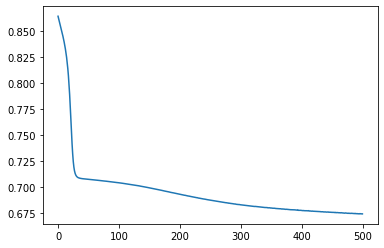

In [174]:
plt.plot(mean_history)

### Α4. Ομαλοποίηση

Με συντελεστή φθοράς r=0.1

In [19]:
# l1 regularization - r=0.1
rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(100,activation='relu',kernel_regularizer=keras.regularizers.l1(0.1)))
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.1,momentum=0.6),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Epoch 1/500
754/754 [==============================] - 1s 824us/step - loss: 91.7466 - rmse: 0.9310 - mae: 0.2280
Epoch 2/500
754/754 [==============================] - 0s 445us/step - loss: 58.6876 - rmse: 0.9339 - mae: 0.2284
Epoch 3/500
754/754 [==============================] - 0s 441us/step - loss: 58.5307 - rmse: 0.9275 - mae: 0.2297
Epoch 4/500
754/754 [==============================] - 0s 451us/step - loss: 58.3772 - rmse: 0.9310 - mae: 0.2309
Epoch 5/500
754/754 [==============================] - 0s 456us/step - loss: 58.5465 - rmse: 0.9252 - mae: 0.2323
Epoch 6/500
754/754 [==============================] - 0s 473us/step - loss: 58.4695 - rmse: 0.9288 - mae: 0.2336
Epoch 7/500
754/754 [==============================] - 0s 487us/step - loss: 58.3133 - rmse: 0.9280 - mae: 0.2350
Epoch 8/500
754/754 [==============================] - 0s 474us/step - loss: 58.3015 - rmse: 0.9254 - mae: 0.2365
Epoch 9/500
754/754 [==============================] - 0s 493us/step - loss: 58.4360 - r

754/754 [==============================] - 1s 1ms/step - loss: 54.9218 - rmse: 0.8461 - mae: 0.3670
Epoch 138/500
754/754 [==============================] - 0s 459us/step - loss: 54.9606 - rmse: 0.8473 - mae: 0.3671
Epoch 139/500
754/754 [==============================] - 0s 443us/step - loss: 54.9619 - rmse: 0.8443 - mae: 0.3677
Epoch 140/500
754/754 [==============================] - 0s 429us/step - loss: 54.8935 - rmse: 0.8427 - mae: 0.3680
Epoch 141/500
754/754 [==============================] - 0s 418us/step - loss: 54.9602 - rmse: 0.8437 - mae: 0.3678
Epoch 142/500
754/754 [==============================] - 0s 485us/step - loss: 54.9924 - rmse: 0.8440 - mae: 0.3675 0s - loss: 55.1708 - rmse: 0.8479 - mae: 0.368
Epoch 143/500
754/754 [==============================] - 1s 1ms/step - loss: 54.9240 - rmse: 0.8416 - mae: 0.3670
Epoch 144/500
754/754 [==============================] - 1s 1ms/step - loss: 54.8870 - rmse: 0.8478 - mae: 0.3671
Epoch 145/500
754/754 [======================

754/754 [==============================] - 0s 456us/step - loss: 54.7591 - rmse: 0.8462 - mae: 0.3675
Epoch 207/500
754/754 [==============================] - 0s 424us/step - loss: 54.7333 - rmse: 0.8441 - mae: 0.3675
Epoch 208/500
754/754 [==============================] - 0s 433us/step - loss: 54.7723 - rmse: 0.8416 - mae: 0.3676
Epoch 209/500
754/754 [==============================] - 0s 615us/step - loss: 54.7729 - rmse: 0.8446 - mae: 0.3671 0s - loss: 54.7157 - rmse: 0.8464 - mae: 0.367
Epoch 210/500
754/754 [==============================] - 1s 1ms/step - loss: 54.7145 - rmse: 0.8433 - mae: 0.3673
Epoch 211/500
754/754 [==============================] - 1s 943us/step - loss: 54.7693 - rmse: 0.8427 - mae: 0.3675 0s - loss: 55.0114 - rmse: 0.8514 - mae: 0.370
Epoch 212/500
754/754 [==============================] - 0s 426us/step - loss: 54.8065 - rmse: 0.8456 - mae: 0.3672
Epoch 213/500
754/754 [==============================] - 0s 411us/step - loss: 54.7368 - rmse: 0.8423 - mae: 0

Epoch 273/500
754/754 [==============================] - 1s 813us/step - loss: 54.5697 - rmse: 0.8448 - mae: 0.3675
Epoch 274/500
754/754 [==============================] - 1s 966us/step - loss: 54.5888 - rmse: 0.8444 - mae: 0.3673
Epoch 275/500
754/754 [==============================] - 1s 747us/step - loss: 54.6737 - rmse: 0.8403 - mae: 0.3672
Epoch 276/500
754/754 [==============================] - 0s 457us/step - loss: 54.5948 - rmse: 0.8445 - mae: 0.3669
Epoch 277/500
754/754 [==============================] - 0s 437us/step - loss: 54.5749 - rmse: 0.8441 - mae: 0.3670
Epoch 278/500
754/754 [==============================] - 0s 480us/step - loss: 54.6067 - rmse: 0.8455 - mae: 0.3670
Epoch 279/500
754/754 [==============================] - 0s 450us/step - loss: 54.6168 - rmse: 0.8440 - mae: 0.3673
Epoch 280/500
754/754 [==============================] - 1s 755us/step - loss: 54.5436 - rmse: 0.8456 - mae: 0.3669
Epoch 281/500
754/754 [==============================] - 1s 969us/step -

754/754 [==============================] - 1s 1ms/step - loss: 54.3564 - rmse: 0.8439 - mae: 0.3678A: 0s - loss: 54.5253 - rmse: 0.8519 - mae: 0.
Epoch 411/500
754/754 [==============================] - 1s 763us/step - loss: 54.4079 - rmse: 0.8450 - mae: 0.3671
Epoch 412/500
754/754 [==============================] - 0s 415us/step - loss: 54.3884 - rmse: 0.8461 - mae: 0.3673
Epoch 413/500
754/754 [==============================] - 0s 420us/step - loss: 54.3495 - rmse: 0.8441 - mae: 0.3673
Epoch 414/500
754/754 [==============================] - 0s 418us/step - loss: 54.3608 - rmse: 0.8443 - mae: 0.3673
Epoch 415/500
754/754 [==============================] - 0s 428us/step - loss: 54.4247 - rmse: 0.8468 - mae: 0.3674
Epoch 416/500
754/754 [==============================] - 0s 510us/step - loss: 54.3701 - rmse: 0.8433 - mae: 0.3675
Epoch 417/500
754/754 [==============================] - 1s 994us/step - loss: 54.3502 - rmse: 0.8438 - mae: 0.3670
Epoch 418/500
754/754 [===================

754/754 [==============================] - 0s 417us/step - loss: 55.1955 - rmse: 0.8305 - mae: 0.3295
Epoch 44/500
754/754 [==============================] - 0s 411us/step - loss: 55.1955 - rmse: 0.8290 - mae: 0.3324
Epoch 45/500
754/754 [==============================] - 0s 439us/step - loss: 55.1067 - rmse: 0.8301 - mae: 0.3347
Epoch 46/500
754/754 [==============================] - 1s 750us/step - loss: 55.0337 - rmse: 0.8289 - mae: 0.3372
Epoch 47/500
754/754 [==============================] - 1s 1ms/step - loss: 55.0584 - rmse: 0.8277 - mae: 0.3390
Epoch 48/500
754/754 [==============================] - 1s 818us/step - loss: 54.9910 - rmse: 0.8267 - mae: 0.3406
Epoch 49/500
754/754 [==============================] - 0s 431us/step - loss: 54.9374 - rmse: 0.8277 - mae: 0.3425
Epoch 50/500
754/754 [==============================] - 0s 410us/step - loss: 54.9529 - rmse: 0.8280 - mae: 0.3434
Epoch 51/500
754/754 [==============================] - 0s 418us/step - loss: 55.0096 - rmse: 0

754/754 [==============================] - 0s 558us/step - loss: 54.6443 - rmse: 0.8260 - mae: 0.3506
Epoch 182/500
754/754 [==============================] - 1s 957us/step - loss: 54.5666 - rmse: 0.8240 - mae: 0.3502
Epoch 183/500
754/754 [==============================] - 1s 1ms/step - loss: 54.5985 - rmse: 0.8260 - mae: 0.3507
Epoch 184/500
754/754 [==============================] - 0s 431us/step - loss: 54.6668 - rmse: 0.8255 - mae: 0.3506 0s - loss: 54.9924 - rmse: 0.8341 - mae: 0
Epoch 185/500
754/754 [==============================] - 0s 413us/step - loss: 54.6093 - rmse: 0.8256 - mae: 0.3503
Epoch 186/500
754/754 [==============================] - 0s 398us/step - loss: 54.5696 - rmse: 0.8252 - mae: 0.3505
Epoch 187/500
754/754 [==============================] - 0s 436us/step - loss: 54.6365 - rmse: 0.8255 - mae: 0.3502
Epoch 188/500
754/754 [==============================] - 0s 436us/step - loss: 54.6087 - rmse: 0.8293 - mae: 0.3502
Epoch 189/500
754/754 [======================

754/754 [==============================] - 0s 441us/step - loss: 54.2693 - rmse: 0.8290 - mae: 0.3504
Epoch 319/500
754/754 [==============================] - 0s 525us/step - loss: 54.2473 - rmse: 0.8214 - mae: 0.3509
Epoch 320/500
754/754 [==============================] - 1s 972us/step - loss: 54.3011 - rmse: 0.8266 - mae: 0.3505
Epoch 321/500
754/754 [==============================] - 1s 1ms/step - loss: 54.3029 - rmse: 0.8264 - mae: 0.3508A: 0s - loss: 54.2462 - rmse: 0.8253 - mae: 0.350
Epoch 322/500
754/754 [==============================] - 0s 475us/step - loss: 54.2410 - rmse: 0.8262 - mae: 0.3507
Epoch 323/500
754/754 [==============================] - 0s 420us/step - loss: 54.2812 - rmse: 0.8247 - mae: 0.3506
Epoch 324/500
754/754 [==============================] - 0s 430us/step - loss: 54.3251 - rmse: 0.8255 - mae: 0.3506
Epoch 325/500
754/754 [==============================] - 0s 439us/step - loss: 54.2700 - rmse: 0.8272 - mae: 0.3503
Epoch 326/500
754/754 [================

754/754 [==============================] - 1s 964us/step - loss: 54.1182 - rmse: 0.8257 - mae: 0.3506
Epoch 454/500
754/754 [==============================] - 1s 868us/step - loss: 54.0953 - rmse: 0.8238 - mae: 0.3510
Epoch 455/500
754/754 [==============================] - 0s 416us/step - loss: 54.0640 - rmse: 0.8249 - mae: 0.3505
Epoch 456/500
754/754 [==============================] - 0s 418us/step - loss: 54.0903 - rmse: 0.8242 - mae: 0.3506
Epoch 457/500
754/754 [==============================] - 0s 416us/step - loss: 54.1423 - rmse: 0.8247 - mae: 0.3508
Epoch 458/500
754/754 [==============================] - 0s 432us/step - loss: 54.0735 - rmse: 0.8242 - mae: 0.3506
Epoch 459/500
754/754 [==============================] - 0s 473us/step - loss: 54.0526 - rmse: 0.8268 - mae: 0.3510
Epoch 460/500
754/754 [==============================] - 1s 991us/step - loss: 54.0947 - rmse: 0.8264 - mae: 0.3505
Epoch 461/500
754/754 [==============================] - 1s 986us/step - loss: 54.1057

754/754 [==============================] - 0s 412us/step - loss: 55.3495 - rmse: 0.8260 - mae: 0.3526
Epoch 90/500
754/754 [==============================] - 0s 421us/step - loss: 55.3361 - rmse: 0.8273 - mae: 0.3526
Epoch 91/500
754/754 [==============================] - 0s 436us/step - loss: 55.2821 - rmse: 0.8299 - mae: 0.3519
Epoch 92/500
754/754 [==============================] - 0s 447us/step - loss: 55.2880 - rmse: 0.8317 - mae: 0.3523
Epoch 93/500
754/754 [==============================] - 1s 667us/step - loss: 55.3796 - rmse: 0.8259 - mae: 0.3525
Epoch 94/500
754/754 [==============================] - 1s 975us/step - loss: 55.2829 - rmse: 0.8297 - mae: 0.3520
Epoch 95/500
754/754 [==============================] - 1s 880us/step - loss: 55.2645 - rmse: 0.8297 - mae: 0.3523
Epoch 96/500
754/754 [==============================] - 0s 399us/step - loss: 55.3163 - rmse: 0.8303 - mae: 0.3527
Epoch 97/500
754/754 [==============================] - 0s 404us/step - loss: 55.3329 - rmse:

754/754 [==============================] - 0s 456us/step - loss: 55.0160 - rmse: 0.8261 - mae: 0.3520
Epoch 226/500
754/754 [==============================] - 0s 464us/step - loss: 55.0946 - rmse: 0.8295 - mae: 0.3523
Epoch 227/500
754/754 [==============================] - 1s 1ms/step - loss: 55.0094 - rmse: 0.8297 - mae: 0.3521
Epoch 228/500
754/754 [==============================] - 1s 991us/step - loss: 54.9578 - rmse: 0.8279 - mae: 0.3526
Epoch 229/500
754/754 [==============================] - 0s 466us/step - loss: 55.0291 - rmse: 0.8281 - mae: 0.3518
Epoch 230/500
754/754 [==============================] - 0s 401us/step - loss: 55.0330 - rmse: 0.8298 - mae: 0.3524
Epoch 231/500
754/754 [==============================] - 0s 438us/step - loss: 54.9613 - rmse: 0.8267 - mae: 0.3522
Epoch 232/500
754/754 [==============================] - 0s 459us/step - loss: 55.0011 - rmse: 0.8280 - mae: 0.3525
Epoch 233/500
754/754 [==============================] - 0s 454us/step - loss: 55.0656 -

754/754 [==============================] - 1s 849us/step - loss: 54.7615 - rmse: 0.8282 - mae: 0.3525 0s - loss: 54.5194 - rmse: 0.8410 - mae: 0.356 - ETA: 0s - loss: 55.0746 - rmse: 0.8426 - mae: 0.3 - ETA: 0s - loss: 54.9680 - rmse: 0.8295 - mae: 0.352
Epoch 362/500
754/754 [==============================] - 0s 412us/step - loss: 54.7951 - rmse: 0.8246 - mae: 0.3525
Epoch 363/500
754/754 [==============================] - 0s 432us/step - loss: 54.8031 - rmse: 0.8292 - mae: 0.3520
Epoch 364/500
754/754 [==============================] - 0s 430us/step - loss: 54.7331 - rmse: 0.8301 - mae: 0.3522
Epoch 365/500
754/754 [==============================] - 0s 434us/step - loss: 54.7894 - rmse: 0.8301 - mae: 0.3521
Epoch 366/500
754/754 [==============================] - 0s 475us/step - loss: 54.8327 - rmse: 0.8313 - mae: 0.3525
Epoch 367/500
754/754 [==============================] - 1s 1ms/step - loss: 54.7666 - rmse: 0.8276 - mae: 0.3526
Epoch 368/500
754/754 [============================

754/754 [==============================] - 0s 444us/step - loss: 54.5078 - rmse: 0.8252 - mae: 0.3524
Epoch 498/500
754/754 [==============================] - 0s 453us/step - loss: 54.5398 - rmse: 0.8264 - mae: 0.3524 0s - loss: 54.9484 - rmse: 0.8374 - mae: 0
Epoch 499/500
754/754 [==============================] - 1s 980us/step - loss: 54.5988 - rmse: 0.8299 - mae: 0.3520
Epoch 500/500
189/189 [==============================] - 0s 852us/step
-----------------------------------------------------
Fold number 3: Sto test set exw loss :57.99307549693597, rmse: 0.8830907940864563 kai mae:0.37645891308784485
Epoch 1/500
755/755 [==============================] - 1s 844us/step - loss: 91.8589 - rmse: 0.9415 - mae: 0.2319
Epoch 2/500
755/755 [==============================] - 0s 473us/step - loss: 58.6912 - rmse: 0.9452 - mae: 0.2324
Epoch 3/500
755/755 [==============================] - 1s 976us/step - loss: 58.5366 - rmse: 0.9419 - mae: 0.2336
Epoch 4/500
755/755 [=========================

755/755 [==============================] - 0s 445us/step - loss: 54.9275 - rmse: 0.8523 - mae: 0.3739
Epoch 131/500
755/755 [==============================] - 0s 437us/step - loss: 55.0001 - rmse: 0.8561 - mae: 0.3734
Epoch 132/500
755/755 [==============================] - 0s 454us/step - loss: 54.9801 - rmse: 0.8539 - mae: 0.3732
Epoch 133/500
755/755 [==============================] - 1s 1ms/step - loss: 54.9057 - rmse: 0.8543 - mae: 0.3736
Epoch 134/500
755/755 [==============================] - 1s 1ms/step - loss: 54.9485 - rmse: 0.8556 - mae: 0.3732A: 0s - loss: 54.7783 - rmse: 0.8420 - mae:
Epoch 135/500
755/755 [==============================] - 0s 596us/step - loss: 55.0291 - rmse: 0.8528 - mae: 0.3732
Epoch 136/500
755/755 [==============================] - 0s 414us/step - loss: 54.9509 - rmse: 0.8527 - mae: 0.3738
Epoch 137/500
755/755 [==============================] - 0s 435us/step - loss: 54.9146 - rmse: 0.8538 - mae: 0.3731
Epoch 138/500
755/755 [========================

755/755 [==============================] - 1s 669us/step - loss: 54.6570 - rmse: 0.8541 - mae: 0.3729
Epoch 266/500
755/755 [==============================] - 0s 394us/step - loss: 54.5953 - rmse: 0.8550 - mae: 0.3731
Epoch 267/500
755/755 [==============================] - 0s 439us/step - loss: 54.6462 - rmse: 0.8546 - mae: 0.3730
Epoch 268/500
755/755 [==============================] - 0s 439us/step - loss: 54.6864 - rmse: 0.8543 - mae: 0.3728
Epoch 269/500
755/755 [==============================] - 0s 440us/step - loss: 54.6281 - rmse: 0.8553 - mae: 0.3733
Epoch 270/500
755/755 [==============================] - 1s 703us/step - loss: 54.5993 - rmse: 0.8544 - mae: 0.3730
Epoch 271/500
755/755 [==============================] - 1s 1ms/step - loss: 54.6637 - rmse: 0.8531 - mae: 0.3734A: 0s - loss: 54.6385 - rmse: 0.8854 - m
Epoch 272/500
755/755 [==============================] - 1s 852us/step - loss: 54.6415 - rmse: 0.8540 - mae: 0.3732
Epoch 273/500
755/755 [=========================

755/755 [==============================] - 0s 393us/step - loss: 54.2848 - rmse: 0.8548 - mae: 0.3733
Epoch 403/500
755/755 [==============================] - 0s 414us/step - loss: 54.2518 - rmse: 0.8530 - mae: 0.3737
Epoch 404/500
755/755 [==============================] - ETA: 0s - loss: 54.2307 - rmse: 0.8511 - mae: 0.372 - 0s 642us/step - loss: 54.2945 - rmse: 0.8550 - mae: 0.3730
Epoch 405/500
755/755 [==============================] - 1s 828us/step - loss: 54.2999 - rmse: 0.8539 - mae: 0.3729
Epoch 406/500
755/755 [==============================] - 1s 931us/step - loss: 54.2435 - rmse: 0.8560 - mae: 0.3734
Epoch 407/500
755/755 [==============================] - 0s 414us/step - loss: 54.2748 - rmse: 0.8530 - mae: 0.3737
Epoch 408/500
755/755 [==============================] - 0s 414us/step - loss: 54.3068 - rmse: 0.8556 - mae: 0.3734
Epoch 409/500
755/755 [==============================] - 0s 414us/step - loss: 54.2565 - rmse: 0.8551 - mae: 0.3734
Epoch 410/500
755/755 [=========

755/755 [==============================] - 1s 1ms/step - loss: 55.5801 - rmse: 0.8632 - mae: 0.3252
Epoch 37/500
755/755 [==============================] - 1s 1ms/step - loss: 55.5894 - rmse: 0.8600 - mae: 0.3299
Epoch 38/500
755/755 [==============================] - 0s 483us/step - loss: 55.4146 - rmse: 0.8579 - mae: 0.3345
Epoch 39/500
755/755 [==============================] - 0s 521us/step - loss: 55.3358 - rmse: 0.8505 - mae: 0.3390
Epoch 40/500
755/755 [==============================] - 0s 561us/step - loss: 55.3618 - rmse: 0.8535 - mae: 0.3423
Epoch 41/500
755/755 [==============================] - 1s 750us/step - loss: 55.3339 - rmse: 0.8508 - mae: 0.3458
Epoch 42/500
755/755 [==============================] - 1s 1ms/step - loss: 55.1809 - rmse: 0.8510 - mae: 0.3489
Epoch 43/500
755/755 [==============================] - 1s 790us/step - loss: 55.2136 - rmse: 0.8490 - mae: 0.3520
Epoch 44/500
755/755 [==============================] - 0s 439us/step - loss: 55.2476 - rmse: 0.846

755/755 [==============================] - 0s 429us/step - loss: 54.8838 - rmse: 0.8459 - mae: 0.3661
Epoch 175/500
755/755 [==============================] - 0s 458us/step - loss: 54.8294 - rmse: 0.8420 - mae: 0.3667
Epoch 176/500
755/755 [==============================] - 0s 520us/step - loss: 54.8671 - rmse: 0.8429 - mae: 0.3664
Epoch 177/500
755/755 [==============================] - 1s 1ms/step - loss: 54.9408 - rmse: 0.8474 - mae: 0.3662
Epoch 178/500
755/755 [==============================] - 1s 1ms/step - loss: 54.8403 - rmse: 0.8465 - mae: 0.3665
Epoch 179/500
755/755 [==============================] - 0s 466us/step - loss: 54.8174 - rmse: 0.8429 - mae: 0.3665 0s - loss: 55.3894 - rmse: 0.8205 - mae: 0
Epoch 180/500
755/755 [==============================] - 0s 464us/step - loss: 54.8732 - rmse: 0.8459 - mae: 0.3667
Epoch 181/500
755/755 [==============================] - 0s 481us/step - loss: 54.8793 - rmse: 0.8421 - mae: 0.3662
Epoch 182/500
755/755 [========================

755/755 [==============================] - 1s 701us/step - loss: 54.7182 - rmse: 0.8456 - mae: 0.3668
Epoch 244/500
755/755 [==============================] - 0s 424us/step - loss: 54.7018 - rmse: 0.8472 - mae: 0.3669
Epoch 245/500
755/755 [==============================] - 0s 442us/step - loss: 54.6499 - rmse: 0.8461 - mae: 0.3664
Epoch 246/500
755/755 [==============================] - 0s 482us/step - loss: 54.6913 - rmse: 0.8481 - mae: 0.3667
Epoch 247/500
755/755 [==============================] - 0s 472us/step - loss: 54.7673 - rmse: 0.8417 - mae: 0.3672
Epoch 248/500
755/755 [==============================] - 1s 903us/step - loss: 54.6665 - rmse: 0.8452 - mae: 0.3669
Epoch 249/500
755/755 [==============================] - 1s 1ms/step - loss: 54.6424 - rmse: 0.8472 - mae: 0.3659
Epoch 250/500
755/755 [==============================] - 1s 673us/step - loss: 54.7128 - rmse: 0.8453 - mae: 0.3666
Epoch 251/500
755/755 [==============================] - 0s 504us/step - loss: 54.7184 -

755/755 [==============================] - 0s 453us/step - loss: 54.4753 - rmse: 0.8469 - mae: 0.3666
Epoch 380/500
755/755 [==============================] - 0s 430us/step - loss: 54.5454 - rmse: 0.8443 - mae: 0.3663
Epoch 381/500
755/755 [==============================] - 0s 449us/step - loss: 54.4909 - rmse: 0.8472 - mae: 0.3663
Epoch 382/500
755/755 [==============================] - 0s 443us/step - loss: 54.4492 - rmse: 0.8453 - mae: 0.3667
Epoch 383/500
755/755 [==============================] - 1s 948us/step - loss: 54.4857 - rmse: 0.8432 - mae: 0.3665 0s - loss: 54.8272 - rmse: 0.8286 - mae
Epoch 384/500
755/755 [==============================] - 1s 937us/step - loss: 54.4941 - rmse: 0.8443 - mae: 0.3665
Epoch 385/500
755/755 [==============================] - 0s 592us/step - loss: 54.4341 - rmse: 0.8432 - mae: 0.3665
Epoch 386/500
755/755 [==============================] - 0s 430us/step - loss: 54.4756 - rmse: 0.8439 - mae: 0.3664
Epoch 387/500
755/755 [=======================

Epoch 448/500
755/755 [==============================] - 0s 458us/step - loss: 54.3277 - rmse: 0.8457 - mae: 0.3659
Epoch 449/500
755/755 [==============================] - 0s 429us/step - loss: 54.3811 - rmse: 0.8447 - mae: 0.3663
Epoch 450/500
755/755 [==============================] - 0s 439us/step - loss: 54.4414 - rmse: 0.8421 - mae: 0.3658
Epoch 451/500
755/755 [==============================] - 0s 441us/step - loss: 54.3814 - rmse: 0.8482 - mae: 0.3657
Epoch 452/500
755/755 [==============================] - 1s 776us/step - loss: 54.3291 - rmse: 0.8441 - mae: 0.3662
Epoch 453/500
755/755 [==============================] - 1s 986us/step - loss: 54.3932 - rmse: 0.8434 - mae: 0.3664
Epoch 454/500
755/755 [==============================] - 1s 1ms/step - loss: 54.3788 - rmse: 0.8442 - mae: 0.3662
Epoch 455/500
755/755 [==============================] - 0s 438us/step - loss: 54.3381 - rmse: 0.8456 - mae: 0.3663
Epoch 456/500
755/755 [==============================] - 0s 463us/step - l

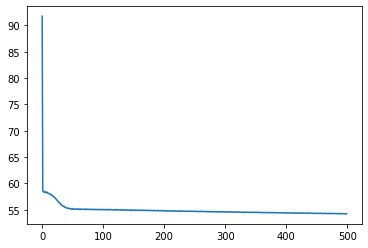

In [22]:
plt.plot(mean_history)

Με συντελεστή φθοράς r=0.5

In [23]:
# l1 regularization - r=0.5
rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(100,activation='relu',kernel_regularizer=keras.regularizers.l1(0.5)))
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.1,momentum=0.6),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Epoch 1/500
754/754 [==============================] - 1s 938us/step - loss: 2149.3480 - rmse: 0.9351 - mae: 0.2319
Epoch 2/500
754/754 [==============================] - 0s 537us/step - loss: 2181.0747 - rmse: 0.9292 - mae: 0.2322
Epoch 3/500
754/754 [==============================] - 0s 552us/step - loss: 2181.5378 - rmse: 0.9323 - mae: 0.2327
Epoch 4/500
754/754 [==============================] - 0s 494us/step - loss: 2180.3317 - rmse: 0.9303 - mae: 0.2336 0s - loss: 2197.3822 - rmse: 0.9287 - mae: 0.2
Epoch 5/500
754/754 [==============================] - 0s 535us/step - loss: 2155.7610 - rmse: 0.9272 - mae: 0.2343
Epoch 6/500
754/754 [==============================] - 0s 528us/step - loss: 2188.4386 - rmse: 0.9278 - mae: 0.2354
Epoch 7/500
754/754 [==============================] - 0s 479us/step - loss: 2172.3620 - rmse: 0.9257 - mae: 0.2364
Epoch 8/500
754/754 [==============================] - 0s 462us/step - loss: 2169.4312 - rmse: 0.9218 - mae: 0.2375
Epoch 9/500
754/754 [====

754/754 [==============================] - 0s 452us/step - loss: 2140.5155 - rmse: 0.8470 - mae: 0.3674
Epoch 137/500
754/754 [==============================] - 0s 476us/step - loss: 2130.1282 - rmse: 0.8459 - mae: 0.3683
Epoch 138/500
754/754 [==============================] - 0s 619us/step - loss: 2131.2856 - rmse: 0.8425 - mae: 0.3678
Epoch 139/500
754/754 [==============================] - 1s 1ms/step - loss: 2133.7882 - rmse: 0.8440 - mae: 0.3681
Epoch 140/500
754/754 [==============================] - 1s 958us/step - loss: 2138.3641 - rmse: 0.8443 - mae: 0.3679
Epoch 141/500
754/754 [==============================] - 0s 470us/step - loss: 2126.1897 - rmse: 0.8475 - mae: 0.3676
Epoch 142/500
754/754 [==============================] - 0s 458us/step - loss: 2136.1431 - rmse: 0.8460 - mae: 0.3686
Epoch 143/500
754/754 [==============================] - 0s 442us/step - loss: 2135.7932 - rmse: 0.8431 - mae: 0.3682
Epoch 144/500
754/754 [==============================] - 0s 471us/step -

754/754 [==============================] - 0s 460us/step - loss: 2125.4204 - rmse: 0.8458 - mae: 0.3678
Epoch 271/500
754/754 [==============================] - 1s 858us/step - loss: 2115.7423 - rmse: 0.8433 - mae: 0.3679
Epoch 272/500
754/754 [==============================] - 1s 1ms/step - loss: 2127.4111 - rmse: 0.8449 - mae: 0.3675
Epoch 273/500
754/754 [==============================] - 1s 666us/step - loss: 2124.7263 - rmse: 0.8445 - mae: 0.3675
Epoch 274/500
754/754 [==============================] - 0s 450us/step - loss: 2120.6670 - rmse: 0.8459 - mae: 0.3677
Epoch 275/500
754/754 [==============================] - 0s 458us/step - loss: 2121.8673 - rmse: 0.8450 - mae: 0.3677
Epoch 276/500
754/754 [==============================] - 0s 459us/step - loss: 2129.9751 - rmse: 0.8458 - mae: 0.3677
Epoch 277/500
754/754 [==============================] - 0s 467us/step - loss: 2119.9120 - rmse: 0.8436 - mae: 0.3677
Epoch 278/500
754/754 [==============================] - 1s 968us/step -

754/754 [==============================] - 1s 1ms/step - loss: 2111.8027 - rmse: 0.8457 - mae: 0.3681
Epoch 406/500
754/754 [==============================] - 1s 1ms/step - loss: 2114.7831 - rmse: 0.8438 - mae: 0.3682
Epoch 407/500
754/754 [==============================] - 0s 465us/step - loss: 2103.5016 - rmse: 0.8437 - mae: 0.3680
Epoch 408/500
754/754 [==============================] - 0s 450us/step - loss: 2113.7854 - rmse: 0.8446 - mae: 0.3680
Epoch 409/500
754/754 [==============================] - 0s 456us/step - loss: 2113.0161 - rmse: 0.8459 - mae: 0.3679
Epoch 410/500
754/754 [==============================] - 0s 462us/step - loss: 2111.3352 - rmse: 0.8468 - mae: 0.3678
Epoch 411/500
754/754 [==============================] - 0s 662us/step - loss: 2103.3237 - rmse: 0.8445 - mae: 0.3678
Epoch 412/500
754/754 [==============================] - 1s 1ms/step - loss: 2114.0302 - rmse: 0.8444 - mae: 0.3677A: 0s - loss: 2107.4179 - rmse: 0.8495 - ma
Epoch 413/500
754/754 [==========

754/754 [==============================] - 0s 414us/step - loss: 2157.3162 - rmse: 0.8408 - mae: 0.3130
Epoch 38/500
754/754 [==============================] - 0s 394us/step - loss: 2166.3586 - rmse: 0.8382 - mae: 0.3173
Epoch 39/500
754/754 [==============================] - 0s 414us/step - loss: 2154.4148 - rmse: 0.8388 - mae: 0.3214
Epoch 40/500
754/754 [==============================] - 0s 414us/step - loss: 2151.8209 - rmse: 0.8313 - mae: 0.3252
Epoch 41/500
754/754 [==============================] - 1s 684us/step - loss: 2153.8044 - rmse: 0.8314 - mae: 0.3284
Epoch 42/500
754/754 [==============================] - 1s 870us/step - loss: 2159.0933 - rmse: 0.8323 - mae: 0.3318
Epoch 43/500
754/754 [==============================] - 1s 850us/step - loss: 2144.0879 - rmse: 0.8309 - mae: 0.3344
Epoch 44/500
754/754 [==============================] - 0s 394us/step - loss: 2155.4635 - rmse: 0.8295 - mae: 0.3365
Epoch 45/500
754/754 [==============================] - 0s 394us/step - loss:

754/754 [==============================] - 1s 1ms/step - loss: 2138.2872 - rmse: 0.8249 - mae: 0.3515
Epoch 107/500
754/754 [==============================] - 0s 447us/step - loss: 2139.3343 - rmse: 0.8263 - mae: 0.3513
Epoch 108/500
754/754 [==============================] - 0s 444us/step - loss: 2148.8876 - rmse: 0.8268 - mae: 0.3512
Epoch 109/500
754/754 [==============================] - 0s 461us/step - loss: 2138.5900 - rmse: 0.8267 - mae: 0.3514
Epoch 110/500
754/754 [==============================] - 0s 490us/step - loss: 2137.8113 - rmse: 0.8268 - mae: 0.3514
Epoch 111/500
754/754 [==============================] - 1s 761us/step - loss: 2141.3010 - rmse: 0.8261 - mae: 0.3514
Epoch 112/500
754/754 [==============================] - 1s 1ms/step - loss: 2145.7607 - rmse: 0.8276 - mae: 0.3513
Epoch 113/500
754/754 [==============================] - 1s 767us/step - loss: 2133.5705 - rmse: 0.8274 - mae: 0.3514 0s - loss: 2029.0515 - rmse: 0.8104 - mae:  - ETA: 0s - loss: 2154.3845 - 

754/754 [==============================] - 0s 549us/step - loss: 2134.7451 - rmse: 0.8248 - mae: 0.3511
Epoch 238/500
754/754 [==============================] - 1s 1ms/step - loss: 2139.3060 - rmse: 0.8256 - mae: 0.3510
Epoch 239/500
754/754 [==============================] - 1s 1ms/step - loss: 2127.8489 - rmse: 0.8255 - mae: 0.3511
Epoch 240/500
754/754 [==============================] - 0s 456us/step - loss: 2137.8533 - rmse: 0.8250 - mae: 0.3509
Epoch 241/500
754/754 [==============================] - 0s 442us/step - loss: 2136.0495 - rmse: 0.8288 - mae: 0.3505
Epoch 242/500
754/754 [==============================] - 0s 461us/step - loss: 2135.3082 - rmse: 0.8264 - mae: 0.3515
Epoch 243/500
754/754 [==============================] - 0s 490us/step - loss: 2126.9926 - rmse: 0.8283 - mae: 0.3511
Epoch 244/500
754/754 [==============================] - 1s 757us/step - loss: 2138.7902 - rmse: 0.8254 - mae: 0.3513
Epoch 245/500
754/754 [==============================] - 1s 1ms/step - los

754/754 [==============================] - 1s 949us/step - loss: 2123.7401 - rmse: 0.8263 - mae: 0.3511
Epoch 374/500
754/754 [==============================] - 1s 1ms/step - loss: 2131.6125 - rmse: 0.8284 - mae: 0.3508
Epoch 375/500
754/754 [==============================] - 1s 666us/step - loss: 2122.8629 - rmse: 0.8262 - mae: 0.3513 0s - loss: 2017.3948 - rmse: 0.8304 - mae: 
Epoch 376/500
754/754 [==============================] - 0s 442us/step - loss: 2121.3360 - rmse: 0.8232 - mae: 0.3511
Epoch 377/500
754/754 [==============================] - 0s 465us/step - loss: 2124.4455 - rmse: 0.8253 - mae: 0.3513
Epoch 378/500
754/754 [==============================] - 0s 472us/step - loss: 2129.5289 - rmse: 0.8258 - mae: 0.3507
Epoch 379/500
754/754 [==============================] - 0s 470us/step - loss: 2118.3546 - rmse: 0.8262 - mae: 0.3509
Epoch 380/500
754/754 [==============================] - 1s 979us/step - loss: 2126.9368 - rmse: 0.8268 - mae: 0.3512
Epoch 381/500
754/754 [=====

Epoch 442/500
754/754 [==============================] - 1s 1ms/step - loss: 2115.4683 - rmse: 0.8245 - mae: 0.3511A: 0s - loss: 2137.8234 - rmse: 0.8332 - mae: 
Epoch 443/500
754/754 [==============================] - 1s 671us/step - loss: 2116.7223 - rmse: 0.8269 - mae: 0.3510
Epoch 444/500
754/754 [==============================] - 0s 453us/step - loss: 2124.6867 - rmse: 0.8272 - mae: 0.3512
Epoch 445/500
754/754 [==============================] - 0s 481us/step - loss: 2115.5494 - rmse: 0.8277 - mae: 0.3513
Epoch 446/500
754/754 [==============================] - 0s 501us/step - loss: 2114.5184 - rmse: 0.8277 - mae: 0.3514
Epoch 447/500
754/754 [==============================] - 0s 561us/step - loss: 2118.0433 - rmse: 0.8245 - mae: 0.3514
Epoch 448/500
754/754 [==============================] - 1s 1ms/step - loss: 2122.0495 - rmse: 0.8281 - mae: 0.3510
Epoch 449/500
754/754 [==============================] - 1s 1ms/step - loss: 2111.6321 - rmse: 0.8259 - mae: 0.3512
Epoch 450/500
75

754/754 [==============================] - 0s 509us/step - loss: 2133.7511 - rmse: 0.8298 - mae: 0.3526
Epoch 76/500
754/754 [==============================] - 0s 460us/step - loss: 2146.9423 - rmse: 0.8298 - mae: 0.3527 0s - loss: 2129.3132 - rmse: 0.8296 - mae: 0.
Epoch 77/500
754/754 [==============================] - 0s 511us/step - loss: 2141.9534 - rmse: 0.8290 - mae: 0.3526
Epoch 78/500
754/754 [==============================] - 1s 794us/step - loss: 2139.7091 - rmse: 0.8299 - mae: 0.3527
Epoch 79/500
754/754 [==============================] - 1s 1ms/step - loss: 2140.6654 - rmse: 0.8316 - mae: 0.3529
Epoch 80/500
754/754 [==============================] - 1s 696us/step - loss: 2149.6760 - rmse: 0.8287 - mae: 0.3528
Epoch 81/500
754/754 [==============================] - 0s 607us/step - loss: 2138.6810 - rmse: 0.8290 - mae: 0.3528
Epoch 82/500
754/754 [==============================] - 0s 471us/step - loss: 2137.3408 - rmse: 0.8306 - mae: 0.3529
Epoch 83/500
754/754 [===========

754/754 [==============================] - 1s 1ms/step - loss: 2140.6216 - rmse: 0.8288 - mae: 0.3529
Epoch 211/500
754/754 [==============================] - 1s 1ms/step - loss: 2127.1921 - rmse: 0.8307 - mae: 0.3527
Epoch 212/500
754/754 [==============================] - 0s 433us/step - loss: 2137.6559 - rmse: 0.8303 - mae: 0.3528
Epoch 213/500
754/754 [==============================] - 0s 448us/step - loss: 2138.2765 - rmse: 0.8288 - mae: 0.3529
Epoch 214/500
754/754 [==============================] - 0s 479us/step - loss: 2136.9547 - rmse: 0.8279 - mae: 0.3532
Epoch 215/500
754/754 [==============================] - 0s 518us/step - loss: 2126.4886 - rmse: 0.8277 - mae: 0.3527
Epoch 216/500
754/754 [==============================] - 1s 802us/step - loss: 2139.6320 - rmse: 0.8276 - mae: 0.3526
Epoch 217/500
754/754 [==============================] - 1s 1ms/step - loss: 2134.8203 - rmse: 0.8314 - mae: 0.3526
Epoch 218/500
754/754 [==============================] - 1s 849us/step - los

754/754 [==============================] - 0s 451us/step - loss: 2122.3049 - rmse: 0.8303 - mae: 0.3528
Epoch 345/500
754/754 [==============================] - 0s 535us/step - loss: 2124.1935 - rmse: 0.8290 - mae: 0.3523
Epoch 346/500
754/754 [==============================] - 0s 539us/step - loss: 2131.2161 - rmse: 0.8257 - mae: 0.3528
Epoch 347/500
754/754 [==============================] - 1s 1ms/step - loss: 2121.7618 - rmse: 0.8302 - mae: 0.3526
Epoch 348/500
754/754 [==============================] - 1s 869us/step - loss: 2121.8575 - rmse: 0.8263 - mae: 0.3524
Epoch 349/500
754/754 [==============================] - 0s 451us/step - loss: 2125.3939 - rmse: 0.8317 - mae: 0.3526
Epoch 350/500
754/754 [==============================] - 0s 487us/step - loss: 2129.1614 - rmse: 0.8289 - mae: 0.3528
Epoch 351/500
754/754 [==============================] - 1s 699us/step - loss: 2117.3545 - rmse: 0.8306 - mae: 0.3529
Epoch 352/500
754/754 [==============================] - 1s 672us/step -

754/754 [==============================] - 0s 481us/step - loss: 2113.9629 - rmse: 0.8289 - mae: 0.3527
Epoch 481/500
754/754 [==============================] - 0s 553us/step - loss: 2104.4575 - rmse: 0.8269 - mae: 0.3527
Epoch 482/500
754/754 [==============================] - 1s 1ms/step - loss: 2115.7365 - rmse: 0.8264 - mae: 0.3531
Epoch 483/500
754/754 [==============================] - 1s 1ms/step - loss: 2112.8725 - rmse: 0.8303 - mae: 0.3525
Epoch 484/500
754/754 [==============================] - 0s 467us/step - loss: 2109.2048 - rmse: 0.8293 - mae: 0.3525
Epoch 485/500
754/754 [==============================] - 0s 455us/step - loss: 2110.2277 - rmse: 0.8301 - mae: 0.3527
Epoch 486/500
754/754 [==============================] - 0s 464us/step - loss: 2117.9872 - rmse: 0.8296 - mae: 0.3528
Epoch 487/500
754/754 [==============================] - 0s 495us/step - loss: 2108.3948 - rmse: 0.8301 - mae: 0.3525
Epoch 488/500
754/754 [==============================] - 0s 546us/step - l

755/755 [==============================] - 0s 479us/step - loss: 2150.0149 - rmse: 0.8581 - mae: 0.3658
Epoch 47/500
755/755 [==============================] - 0s 484us/step - loss: 2137.7041 - rmse: 0.8554 - mae: 0.3674
Epoch 48/500
755/755 [==============================] - 1s 693us/step - loss: 2153.5012 - rmse: 0.8553 - mae: 0.3689
Epoch 49/500
755/755 [==============================] - 1s 1ms/step - loss: 2147.0499 - rmse: 0.8545 - mae: 0.3692
Epoch 50/500
755/755 [==============================] - 1s 853us/step - loss: 2143.3169 - rmse: 0.8567 - mae: 0.3703 0s - loss: 2107.0075 - rmse: 0.8633 - mae: 0.3
Epoch 51/500
755/755 [==============================] - 0s 468us/step - loss: 2144.4759 - rmse: 0.8547 - mae: 0.3709
Epoch 52/500
755/755 [==============================] - 0s 463us/step - loss: 2153.3511 - rmse: 0.8572 - mae: 0.3709
Epoch 53/500
755/755 [==============================] - 0s 479us/step - loss: 2141.8598 - rmse: 0.8562 - mae: 0.3722
Epoch 54/500
755/755 [==========

755/755 [==============================] - 0s 650us/step - loss: 2132.8619 - rmse: 0.8539 - mae: 0.3734 0s - loss: 2125.6617 - rmse: 0.8382 - mae: 0.3
Epoch 181/500
755/755 [==============================] - 1s 1ms/step - loss: 2135.1113 - rmse: 0.8540 - mae: 0.3737
Epoch 182/500
755/755 [==============================] - 1s 991us/step - loss: 2140.5302 - rmse: 0.8560 - mae: 0.3734
Epoch 183/500
755/755 [==============================] - 0s 457us/step - loss: 2127.7141 - rmse: 0.8546 - mae: 0.3737
Epoch 184/500
755/755 [==============================] - 0s 471us/step - loss: 2139.3655 - rmse: 0.8538 - mae: 0.3738
Epoch 185/500
755/755 [==============================] - 0s 473us/step - loss: 2137.3464 - rmse: 0.8519 - mae: 0.3744
Epoch 186/500
755/755 [==============================] - 0s 481us/step - loss: 2137.3129 - rmse: 0.8548 - mae: 0.3733
Epoch 187/500
755/755 [==============================] - 1s 952us/step - loss: 2126.3150 - rmse: 0.8540 - mae: 0.3733 0s - loss: 2128.0758 - rm

755/755 [==============================] - 0s 439us/step - loss: 2129.8361 - rmse: 0.8544 - mae: 0.3728
Epoch 248/500
755/755 [==============================] - 0s 483us/step - loss: 2138.9826 - rmse: 0.8537 - mae: 0.3736
Epoch 249/500
755/755 [==============================] - 0s 491us/step - loss: 2129.4446 - rmse: 0.8566 - mae: 0.3737
Epoch 250/500
755/755 [==============================] - 0s 503us/step - loss: 2128.2681 - rmse: 0.8556 - mae: 0.3732
Epoch 251/500
755/755 [==============================] - 1s 845us/step - loss: 2131.1134 - rmse: 0.8548 - mae: 0.3738
Epoch 252/500
755/755 [==============================] - 1s 1ms/step - loss: 2136.6561 - rmse: 0.8560 - mae: 0.3739
Epoch 253/500
755/755 [==============================] - 1s 723us/step - loss: 2123.1554 - rmse: 0.8550 - mae: 0.3743
Epoch 254/500
755/755 [==============================] - 0s 449us/step - loss: 2135.0197 - rmse: 0.8541 - mae: 0.3738
Epoch 255/500
755/755 [==============================] - 0s 471us/step -

755/755 [==============================] - 0s 457us/step - loss: 2121.1840 - rmse: 0.8555 - mae: 0.3738
Epoch 383/500
755/755 [==============================] - 0s 532us/step - loss: 2112.0895 - rmse: 0.8543 - mae: 0.3737
Epoch 384/500
755/755 [==============================] - 0s 487us/step - loss: 2125.6252 - rmse: 0.8521 - mae: 0.3744
Epoch 385/500
755/755 [==============================] - 0s 654us/step - loss: 2120.0649 - rmse: 0.8553 - mae: 0.3738
Epoch 386/500
755/755 [==============================] - 1s 1ms/step - loss: 2116.3101 - rmse: 0.8549 - mae: 0.3735
Epoch 387/500
755/755 [==============================] - 1s 1ms/step - loss: 2118.1340 - rmse: 0.8551 - mae: 0.3736
Epoch 388/500
755/755 [==============================] - 1s 1ms/step - loss: 2126.5716 - rmse: 0.8560 - mae: 0.3736
Epoch 389/500
755/755 [==============================] - 1s 1ms/step - loss: 2116.9220 - rmse: 0.8546 - mae: 0.3736A: 0s - loss: 2002.9479 - rmse: 0.8217 - ma
Epoch 390/500
755/755 [============

755/755 [==============================] - 0s 455us/step - loss: 2191.7561 - rmse: 0.9178 - mae: 0.2443
Epoch 15/500
755/755 [==============================] - 0s 466us/step - loss: 2165.8494 - rmse: 0.9183 - mae: 0.2458
Epoch 16/500
755/755 [==============================] - 0s 507us/step - loss: 2186.3798 - rmse: 0.9150 - mae: 0.2474
Epoch 17/500
755/755 [==============================] - 0s 488us/step - loss: 2183.1998 - rmse: 0.9129 - mae: 0.2492
Epoch 18/500
755/755 [==============================] - 1s 1ms/step - loss: 2185.0718 - rmse: 0.9123 - mae: 0.2510
Epoch 19/500
755/755 [==============================] - 1s 1ms/step - loss: 2165.5386 - rmse: 0.9119 - mae: 0.2531
Epoch 20/500
755/755 [==============================] - 1s 1ms/step - loss: 2188.7104 - rmse: 0.9083 - mae: 0.2553
Epoch 21/500
755/755 [==============================] - 1s 1ms/step - loss: 2180.3501 - rmse: 0.9094 - mae: 0.2575
Epoch 22/500
755/755 [==============================] - 0s 488us/step - loss: 2173.18

755/755 [==============================] - 1s 1ms/step - loss: 2137.3574 - rmse: 0.8447 - mae: 0.3669
Epoch 150/500
755/755 [==============================] - 0s 502us/step - loss: 2145.1903 - rmse: 0.8453 - mae: 0.3669
Epoch 151/500
755/755 [==============================] - 0s 565us/step - loss: 2135.2785 - rmse: 0.8465 - mae: 0.3667
Epoch 152/500
755/755 [==============================] - 0s 542us/step - loss: 2134.3947 - rmse: 0.8459 - mae: 0.3669
Epoch 153/500
755/755 [==============================] - 0s 559us/step - loss: 2138.9088 - rmse: 0.8469 - mae: 0.3671
Epoch 154/500
755/755 [==============================] - 1s 1ms/step - loss: 2143.1829 - rmse: 0.8453 - mae: 0.3672
Epoch 155/500
755/755 [==============================] - 1s 1ms/step - loss: 2130.8119 - rmse: 0.8453 - mae: 0.3671
Epoch 156/500
755/755 [==============================] - 0s 498us/step - loss: 2140.9689 - rmse: 0.8462 - mae: 0.3672
Epoch 157/500
755/755 [==============================] - 0s 583us/step - los

755/755 [==============================] - 0s 619us/step - loss: 2132.0230 - rmse: 0.8457 - mae: 0.3664
Epoch 283/500
755/755 [==============================] - 0s 494us/step - loss: 2131.6877 - rmse: 0.8462 - mae: 0.3669
Epoch 284/500
755/755 [==============================] - 0s 537us/step - loss: 2130.8876 - rmse: 0.8468 - mae: 0.3670
Epoch 285/500
755/755 [==============================] - 0s 510us/step - loss: 2122.0420 - rmse: 0.8464 - mae: 0.3667
Epoch 286/500
755/755 [==============================] - 1s 878us/step - loss: 2133.0709 - rmse: 0.8439 - mae: 0.3670
Epoch 287/500
755/755 [==============================] - 1s 1ms/step - loss: 2128.8155 - rmse: 0.8454 - mae: 0.3667
Epoch 288/500
755/755 [==============================] - 1s 713us/step - loss: 2126.3618 - rmse: 0.8460 - mae: 0.3668
Epoch 289/500
755/755 [==============================] - 0s 492us/step - loss: 2127.7498 - rmse: 0.8471 - mae: 0.3670
Epoch 290/500
755/755 [==============================] - 0s 495us/step -

755/755 [==============================] - 0s 461us/step - loss: 2113.4543 - rmse: 0.8467 - mae: 0.3672
Epoch 418/500
755/755 [==============================] - 0s 514us/step - loss: 2112.7561 - rmse: 0.8448 - mae: 0.3668
Epoch 419/500
755/755 [==============================] - 0s 528us/step - loss: 2116.2438 - rmse: 0.8429 - mae: 0.3672
Epoch 420/500
755/755 [==============================] - 1s 833us/step - loss: 2120.3980 - rmse: 0.8449 - mae: 0.3662
Epoch 421/500
755/755 [==============================] - 1s 1ms/step - loss: 2108.7010 - rmse: 0.8455 - mae: 0.3666
Epoch 422/500
755/755 [==============================] - 1s 739us/step - loss: 2117.5977 - rmse: 0.8459 - mae: 0.3667
Epoch 423/500
755/755 [==============================] - 0s 461us/step - loss: 2118.0373 - rmse: 0.8456 - mae: 0.3670
Epoch 424/500
755/755 [==============================] - 0s 484us/step - loss: 2117.3594 - rmse: 0.8443 - mae: 0.3666
Epoch 425/500
755/755 [==============================] - 0s 487us/step -

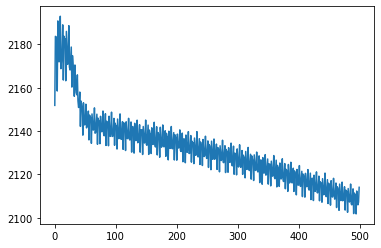

In [24]:
plt.plot(mean_history)

Με συντελεστή φθοράς r=0.9

In [25]:
# l1 regularization - r=0.9
rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(100,activation='relu',kernel_regularizer=keras.regularizers.l1(0.9)))
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.1,momentum=0.6),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Epoch 1/500
754/754 [==============================] - 1s 888us/step - loss: 4248.8041 - rmse: 0.9324 - mae: 0.2338
Epoch 2/500
754/754 [==============================] - 0s 466us/step - loss: 4279.5027 - rmse: 0.9327 - mae: 0.2340
Epoch 3/500
754/754 [==============================] - 0s 464us/step - loss: 4287.8035 - rmse: 0.9289 - mae: 0.2344
Epoch 4/500
754/754 [==============================] - 0s 447us/step - loss: 4284.7108 - rmse: 0.9292 - mae: 0.2352
Epoch 5/500
754/754 [==============================] - 0s 466us/step - loss: 4275.8277 - rmse: 0.9291 - mae: 0.2360
Epoch 6/500
754/754 [==============================] - 0s 475us/step - loss: 4281.3142 - rmse: 0.9285 - mae: 0.2369
Epoch 7/500
754/754 [==============================] - 0s 468us/step - loss: 4281.9882 - rmse: 0.9266 - mae: 0.2380
Epoch 8/500
754/754 [==============================] - 0s 475us/step - loss: 4277.4433 - rmse: 0.9207 - mae: 0.2391
Epoch 9/500
754/754 [==============================] - 1s 787us/step - l

754/754 [==============================] - 0s 459us/step - loss: 4288.1677 - rmse: 0.8449 - mae: 0.3673
Epoch 69/500
754/754 [==============================] - 0s 447us/step - loss: 4293.4526 - rmse: 0.8443 - mae: 0.3682
Epoch 70/500
754/754 [==============================] - 0s 443us/step - loss: 4292.0784 - rmse: 0.8446 - mae: 0.3680
Epoch 71/500
754/754 [==============================] - 1s 872us/step - loss: 4286.6538 - rmse: 0.8469 - mae: 0.3677
Epoch 72/500
754/754 [==============================] - 1s 1ms/step - loss: 4289.5736 - rmse: 0.8418 - mae: 0.3681
Epoch 73/500
754/754 [==============================] - 0s 643us/step - loss: 4293.3605 - rmse: 0.8428 - mae: 0.3679
Epoch 74/500
754/754 [==============================] - 0s 445us/step - loss: 4292.3612 - rmse: 0.8446 - mae: 0.3682
Epoch 75/500
754/754 [==============================] - 0s 452us/step - loss: 4287.1938 - rmse: 0.8435 - mae: 0.3675
Epoch 76/500
754/754 [==============================] - 0s 438us/step - loss: 4

754/754 [==============================] - 1s 1ms/step - loss: 4284.4408 - rmse: 0.8449 - mae: 0.3673
Epoch 203/500
754/754 [==============================] - 1s 779us/step - loss: 4286.5589 - rmse: 0.8444 - mae: 0.3675
Epoch 204/500
754/754 [==============================] - 0s 455us/step - loss: 4284.3035 - rmse: 0.8410 - mae: 0.3678
Epoch 205/500
754/754 [==============================] - 0s 445us/step - loss: 4285.0574 - rmse: 0.8456 - mae: 0.3675
Epoch 206/500
754/754 [==============================] - 0s 481us/step - loss: 4285.5806 - rmse: 0.8463 - mae: 0.3678
Epoch 207/500
754/754 [==============================] - 0s 460us/step - loss: 4282.9801 - rmse: 0.8437 - mae: 0.3681
Epoch 208/500
754/754 [==============================] - 1s 894us/step - loss: 4282.9076 - rmse: 0.8435 - mae: 0.3678
Epoch 209/500
754/754 [==============================] - 1s 1ms/step - loss: 4287.5989 - rmse: 0.8431 - mae: 0.3673
Epoch 210/500
754/754 [==============================] - 1s 687us/step - l

Epoch 271/500
754/754 [==============================] - 0s 605us/step - loss: 4277.7601 - rmse: 0.8446 - mae: 0.3678
Epoch 272/500
754/754 [==============================] - 0s 447us/step - loss: 4281.1764 - rmse: 0.8445 - mae: 0.3678
Epoch 273/500
754/754 [==============================] - 0s 448us/step - loss: 4283.0106 - rmse: 0.8468 - mae: 0.3679
Epoch 274/500
754/754 [==============================] - 0s 462us/step - loss: 4280.6585 - rmse: 0.8443 - mae: 0.3683 0s - loss: 4219.6404 - rmse: 0.8530 - mae: 0.3 - ETA: 0s - loss: 4263.6635 - rmse: 0.8474 - mae: 0.369
Epoch 275/500
754/754 [==============================] - 0s 477us/step - loss: 4281.1710 - rmse: 0.8462 - mae: 0.3677
Epoch 276/500
754/754 [==============================] - 1s 1ms/step - loss: 4282.1721 - rmse: 0.8420 - mae: 0.3678
Epoch 277/500
754/754 [==============================] - 1s 1ms/step - loss: 4279.1223 - rmse: 0.8460 - mae: 0.3677
Epoch 278/500
754/754 [==============================] - 0s 545us/step - lo

754/754 [==============================] - 1s 1ms/step - loss: 4271.4610 - rmse: 0.8407 - mae: 0.3684
Epoch 406/500
754/754 [==============================] - 0s 433us/step - loss: 4272.0019 - rmse: 0.8422 - mae: 0.3678
Epoch 407/500
754/754 [==============================] - 0s 449us/step - loss: 4267.7869 - rmse: 0.8432 - mae: 0.3675
Epoch 408/500
754/754 [==============================] - 0s 468us/step - loss: 4272.2123 - rmse: 0.8436 - mae: 0.3678
Epoch 409/500
754/754 [==============================] - 0s 497us/step - loss: 4274.2480 - rmse: 0.8446 - mae: 0.3679
Epoch 410/500
754/754 [==============================] - 1s 731us/step - loss: 4270.7538 - rmse: 0.8439 - mae: 0.3682
Epoch 411/500
754/754 [==============================] - 1s 1ms/step - loss: 4266.9345 - rmse: 0.8443 - mae: 0.3679
Epoch 412/500
754/754 [==============================] - 1s 819us/step - loss: 4270.8296 - rmse: 0.8445 - mae: 0.3679
Epoch 413/500
754/754 [==============================] - 0s 432us/step - l

754/754 [==============================] - 0s 485us/step - loss: 4295.6453 - rmse: 0.8407 - mae: 0.3183
Epoch 38/500
754/754 [==============================] - 0s 472us/step - loss: 4300.7865 - rmse: 0.8395 - mae: 0.3226
Epoch 39/500
754/754 [==============================] - 0s 475us/step - loss: 4298.7077 - rmse: 0.8381 - mae: 0.3259
Epoch 40/500
754/754 [==============================] - 1s 926us/step - loss: 4293.0529 - rmse: 0.8315 - mae: 0.3294
Epoch 41/500
754/754 [==============================] - 1s 1ms/step - loss: 4296.5763 - rmse: 0.8331 - mae: 0.3326
Epoch 42/500
754/754 [==============================] - 0s 619us/step - loss: 4296.6826 - rmse: 0.8336 - mae: 0.3356
Epoch 43/500
754/754 [==============================] - 0s 498us/step - loss: 4292.7816 - rmse: 0.8299 - mae: 0.3385
Epoch 44/500
754/754 [==============================] - 0s 465us/step - loss: 4298.3547 - rmse: 0.8314 - mae: 0.3400
Epoch 45/500
754/754 [==============================] - 0s 498us/step - loss: 4

754/754 [==============================] - 0s 502us/step - loss: 4288.6444 - rmse: 0.8286 - mae: 0.3513 0s - loss: 4260.1810 - rmse: 0.8259 - mae: 0.35
Epoch 171/500
754/754 [==============================] - 1s 757us/step - loss: 4289.6691 - rmse: 0.8249 - mae: 0.3517
Epoch 172/500
754/754 [==============================] - 1s 1ms/step - loss: 4286.5780 - rmse: 0.8254 - mae: 0.3511
Epoch 173/500
754/754 [==============================] - 1s 1ms/step - loss: 4284.9751 - rmse: 0.8263 - mae: 0.3512
Epoch 174/500
754/754 [==============================] - 1s 1ms/step - loss: 4291.5152 - rmse: 0.8234 - mae: 0.3511A: 0s - loss: 4256.5294 - rmse: 0.8230 - mae: 0.3
Epoch 175/500
754/754 [==============================] - 1s 839us/step - loss: 4289.6181 - rmse: 0.8266 - mae: 0.3507
Epoch 176/500
754/754 [==============================] - 0s 444us/step - loss: 4283.8195 - rmse: 0.8246 - mae: 0.3514
Epoch 177/500
754/754 [==============================] - 0s 441us/step - loss: 4286.9626 - rmse: 

754/754 [==============================] - 1s 912us/step - loss: 4284.5316 - rmse: 0.8237 - mae: 0.3515
Epoch 240/500
754/754 [==============================] - 0s 447us/step - loss: 4285.4601 - rmse: 0.8247 - mae: 0.3515
Epoch 241/500
754/754 [==============================] - 0s 457us/step - loss: 4287.2782 - rmse: 0.8259 - mae: 0.3514
Epoch 242/500
754/754 [==============================] - 0s 471us/step - loss: 4283.7384 - rmse: 0.8262 - mae: 0.3507
Epoch 243/500
754/754 [==============================] - 0s 477us/step - loss: 4282.2688 - rmse: 0.8249 - mae: 0.3511
Epoch 244/500
754/754 [==============================] - 1s 794us/step - loss: 4288.3689 - rmse: 0.8245 - mae: 0.3512
Epoch 245/500
754/754 [==============================] - 1s 1ms/step - loss: 4287.1236 - rmse: 0.8255 - mae: 0.3508
Epoch 246/500
754/754 [==============================] - 1s 797us/step - loss: 4280.9516 - rmse: 0.8272 - mae: 0.3512
Epoch 247/500
754/754 [==============================] - 0s 445us/step -

754/754 [==============================] - 1s 1ms/step - loss: 4273.8574 - rmse: 0.8251 - mae: 0.3511
Epoch 373/500
754/754 [==============================] - 1s 1ms/step - loss: 4278.4352 - rmse: 0.8256 - mae: 0.3510
Epoch 374/500
754/754 [==============================] - 1s 721us/step - loss: 4282.1511 - rmse: 0.8270 - mae: 0.3514
Epoch 375/500
754/754 [==============================] - 0s 446us/step - loss: 4277.3363 - rmse: 0.8249 - mae: 0.3511
Epoch 376/500
754/754 [==============================] - 0s 463us/step - loss: 4273.7253 - rmse: 0.8262 - mae: 0.3515
Epoch 377/500
754/754 [==============================] - 0s 494us/step - loss: 4277.3863 - rmse: 0.8285 - mae: 0.3515
Epoch 378/500
754/754 [==============================] - 0s 499us/step - loss: 4279.7034 - rmse: 0.8232 - mae: 0.3516
Epoch 379/500
754/754 [==============================] - 1s 1ms/step - loss: 4276.3936 - rmse: 0.8259 - mae: 0.3516
Epoch 380/500
754/754 [==============================] - 1s 1ms/step - loss:

754/754 [==============================] - 0s 603us/step - loss: 4287.3483 - rmse: 0.9122 - mae: 0.2239
Epoch 5/500
754/754 [==============================] - 0s 442us/step - loss: 4277.7275 - rmse: 0.9105 - mae: 0.2247
Epoch 6/500
754/754 [==============================] - 0s 487us/step - loss: 4283.8469 - rmse: 0.9051 - mae: 0.2257
Epoch 7/500
754/754 [==============================] - 0s 492us/step - loss: 4284.6991 - rmse: 0.9067 - mae: 0.2267
Epoch 8/500
754/754 [==============================] - 0s 510us/step - loss: 4279.5117 - rmse: 0.9041 - mae: 0.2278
Epoch 9/500
754/754 [==============================] - 1s 1ms/step - loss: 4289.3428 - rmse: 0.9044 - mae: 0.2289
Epoch 10/500
754/754 [==============================] - 1s 1ms/step - loss: 4289.4964 - rmse: 0.8990 - mae: 0.2301
Epoch 11/500
754/754 [==============================] - 0s 454us/step - loss: 4280.7823 - rmse: 0.9020 - mae: 0.2314
Epoch 12/500
754/754 [==============================] - 0s 461us/step - loss: 4275.693

754/754 [==============================] - 1s 1ms/step - loss: 4287.1158 - rmse: 0.8302 - mae: 0.3527
Epoch 72/500
754/754 [==============================] - 0s 574us/step - loss: 4290.2238 - rmse: 0.8275 - mae: 0.3530
Epoch 73/500
754/754 [==============================] - 0s 444us/step - loss: 4294.8028 - rmse: 0.8269 - mae: 0.3531
Epoch 74/500
754/754 [==============================] - 0s 471us/step - loss: 4292.9781 - rmse: 0.8290 - mae: 0.3532
Epoch 75/500
754/754 [==============================] - 0s 472us/step - loss: 4287.7998 - rmse: 0.8297 - mae: 0.3530
Epoch 76/500
754/754 [==============================] - 0s 508us/step - loss: 4290.9850 - rmse: 0.8314 - mae: 0.3530
Epoch 77/500
754/754 [==============================] - 1s 1ms/step - loss: 4291.2876 - rmse: 0.8282 - mae: 0.3529
Epoch 78/500
754/754 [==============================] - 1s 1ms/step - loss: 4288.2505 - rmse: 0.8291 - mae: 0.3532
Epoch 79/500
754/754 [==============================] - 0s 445us/step - loss: 4293.

754/754 [==============================] - 1s 800us/step - loss: 4285.9473 - rmse: 0.8326 - mae: 0.3527 0s - loss: 4276.0251 - rmse: 0.8229 - mae: 0.34
Epoch 207/500
754/754 [==============================] - 1s 1ms/step - loss: 4283.3139 - rmse: 0.8292 - mae: 0.3523
Epoch 208/500
754/754 [==============================] - 1s 1ms/step - loss: 4282.0034 - rmse: 0.8272 - mae: 0.3534
Epoch 209/500
754/754 [==============================] - 1s 1ms/step - loss: 4287.7514 - rmse: 0.8286 - mae: 0.3530
Epoch 210/500
754/754 [==============================] - 1s 790us/step - loss: 4285.6799 - rmse: 0.8291 - mae: 0.3526
Epoch 211/500
754/754 [==============================] - 0s 439us/step - loss: 4280.7602 - rmse: 0.8272 - mae: 0.3532 0s - loss: 4220.0179 - rmse: 0.8388 - mae: 0.
Epoch 212/500
754/754 [==============================] - 0s 476us/step - loss: 4283.0558 - rmse: 0.8283 - mae: 0.3528
Epoch 213/500
754/754 [==============================] - 0s 471us/step - loss: 4287.8128 - rmse: 0.8

Epoch 272/500
754/754 [==============================] - 1s 1ms/step - loss: 4280.7914 - rmse: 0.8294 - mae: 0.3527
Epoch 273/500
754/754 [==============================] - 1s 740us/step - loss: 4283.5848 - rmse: 0.8283 - mae: 0.3529
Epoch 274/500
754/754 [==============================] - 0s 437us/step - loss: 4280.5506 - rmse: 0.8283 - mae: 0.3529
Epoch 275/500
754/754 [==============================] - 0s 457us/step - loss: 4281.7623 - rmse: 0.8280 - mae: 0.3527
Epoch 276/500
754/754 [==============================] - 0s 488us/step - loss: 4282.1556 - rmse: 0.8303 - mae: 0.3528
Epoch 277/500
754/754 [==============================] - 0s 477us/step - loss: 4279.8493 - rmse: 0.8304 - mae: 0.3525
Epoch 278/500
754/754 [==============================] - 1s 972us/step - loss: 4278.7350 - rmse: 0.8294 - mae: 0.3528
Epoch 279/500
754/754 [==============================] - 1s 1ms/step - loss: 4284.0054 - rmse: 0.8300 - mae: 0.3532A: 0s - loss: 4322.5776 - rmse: 0.8238 - mae: 0.3
Epoch 280/5

754/754 [==============================] - 1s 1ms/step - loss: 4270.8760 - rmse: 0.8282 - mae: 0.3532
Epoch 407/500
754/754 [==============================] - 1s 1ms/step - loss: 4266.6777 - rmse: 0.8288 - mae: 0.3529
Epoch 408/500
754/754 [==============================] - 1s 811us/step - loss: 4271.1866 - rmse: 0.8278 - mae: 0.3530
Epoch 409/500
754/754 [==============================] - 0s 433us/step - loss: 4274.4866 - rmse: 0.8281 - mae: 0.3532
Epoch 410/500
754/754 [==============================] - 0s 481us/step - loss: 4269.7766 - rmse: 0.8304 - mae: 0.3533
Epoch 411/500
754/754 [==============================] - 0s 477us/step - loss: 4266.9271 - rmse: 0.8312 - mae: 0.3529
Epoch 412/500
754/754 [==============================] - 0s 474us/step - loss: 4270.0032 - rmse: 0.8292 - mae: 0.3529
Epoch 413/500
754/754 [==============================] - 1s 899us/step - loss: 4271.8978 - rmse: 0.8272 - mae: 0.3528
Epoch 414/500
754/754 [==============================] - 1s 1ms/step - los

755/755 [==============================] - 1s 1ms/step - loss: 4297.1311 - rmse: 0.8612 - mae: 0.3587
Epoch 40/500
755/755 [==============================] - 1s 763us/step - loss: 4291.7301 - rmse: 0.8610 - mae: 0.3600
Epoch 41/500
755/755 [==============================] - 0s 461us/step - loss: 4295.2351 - rmse: 0.8586 - mae: 0.3633
Epoch 42/500
755/755 [==============================] - 0s 459us/step - loss: 4295.1123 - rmse: 0.8574 - mae: 0.3648
Epoch 43/500
755/755 [==============================] - 0s 479us/step - loss: 4291.5311 - rmse: 0.8567 - mae: 0.3661
Epoch 44/500
755/755 [==============================] - 0s 482us/step - loss: 4297.0796 - rmse: 0.8563 - mae: 0.3673
Epoch 45/500
755/755 [==============================] - 1s 916us/step - loss: 4296.3800 - rmse: 0.8562 - mae: 0.3675
Epoch 46/500
755/755 [==============================] - 1s 1ms/step - loss: 4292.1133 - rmse: 0.8553 - mae: 0.3691
Epoch 47/500
755/755 [==============================] - 1s 1ms/step - loss: 4288.

755/755 [==============================] - 1s 1ms/step - loss: 4288.4719 - rmse: 0.8531 - mae: 0.3739
Epoch 172/500
755/755 [==============================] - 0s 610us/step - loss: 4285.6283 - rmse: 0.8554 - mae: 0.3741 0s - loss: 4149.4478 - rmse: 0.8896 - mae: 0
Epoch 173/500
755/755 [==============================] - 0s 457us/step - loss: 4284.5387 - rmse: 0.8509 - mae: 0.3740
Epoch 174/500
755/755 [==============================] - 0s 475us/step - loss: 4289.9355 - rmse: 0.8510 - mae: 0.3739
Epoch 175/500
755/755 [==============================] - 0s 514us/step - loss: 4288.1037 - rmse: 0.8529 - mae: 0.3736
Epoch 176/500
755/755 [==============================] - 0s 608us/step - loss: 4283.2558 - rmse: 0.8543 - mae: 0.3732
Epoch 177/500
755/755 [==============================] - 1s 1ms/step - loss: 4285.8572 - rmse: 0.8548 - mae: 0.3734
Epoch 178/500
755/755 [==============================] - 1s 985us/step - loss: 4289.8155 - rmse: 0.8559 - mae: 0.3736
Epoch 179/500
755/755 [======

755/755 [==============================] - 0s 416us/step - loss: 4291.4140 - rmse: 0.8530 - mae: 0.3498
Epoch 43/500
755/755 [==============================] - 0s 426us/step - loss: 4286.8134 - rmse: 0.8482 - mae: 0.3520
Epoch 44/500
755/755 [==============================] - 0s 437us/step - loss: 4293.1081 - rmse: 0.8510 - mae: 0.3544
Epoch 45/500
755/755 [==============================] - 0s 432us/step - loss: 4292.5834 - rmse: 0.8489 - mae: 0.3571
Epoch 46/500
755/755 [==============================] - 1s 839us/step - loss: 4287.4858 - rmse: 0.8518 - mae: 0.3583
Epoch 47/500
755/755 [==============================] - 1s 905us/step - loss: 4283.1728 - rmse: 0.8468 - mae: 0.3593
Epoch 48/500
755/755 [==============================] - 1s 683us/step - loss: 4291.2546 - rmse: 0.8476 - mae: 0.3610
Epoch 49/500
755/755 [==============================] - 0s 404us/step - loss: 4292.7528 - rmse: 0.8447 - mae: 0.3614
Epoch 50/500
755/755 [==============================] - 0s 422us/step - loss:

755/755 [==============================] - 1s 902us/step - loss: 4278.0459 - rmse: 0.8429 - mae: 0.3670 0s - loss: 4164.1451 - rmse: 0.8506 - mae: 0.
Epoch 177/500
755/755 [==============================] - 0s 616us/step - loss: 4281.4518 - rmse: 0.8461 - mae: 0.3669 0s - loss: 4281.4644 - rmse: 0.8566 - mae: 0.
Epoch 178/500
755/755 [==============================] - 0s 398us/step - loss: 4286.2650 - rmse: 0.8451 - mae: 0.3667
Epoch 179/500
755/755 [==============================] - 0s 425us/step - loss: 4284.0018 - rmse: 0.8442 - mae: 0.3668
Epoch 180/500
755/755 [==============================] - 0s 433us/step - loss: 4278.8267 - rmse: 0.8463 - mae: 0.3667
Epoch 181/500
755/755 [==============================] - 0s 438us/step - loss: 4282.6786 - rmse: 0.8466 - mae: 0.3668
Epoch 182/500
755/755 [==============================] - 0s 648us/step - loss: 4282.4957 - rmse: 0.8435 - mae: 0.3664
Epoch 183/500
755/755 [==============================] - 1s 906us/step - loss: 4279.2649 - rmse:

755/755 [==============================] - 0s 459us/step - loss: 4278.4542 - rmse: 0.8448 - mae: 0.3664
Epoch 309/500
755/755 [==============================] - 0s 482us/step - loss: 4274.8305 - rmse: 0.8442 - mae: 0.3665
Epoch 310/500
755/755 [==============================] - 0s 462us/step - loss: 4276.6152 - rmse: 0.8447 - mae: 0.3668
Epoch 311/500
755/755 [==============================] - 0s 482us/step - loss: 4277.5958 - rmse: 0.8457 - mae: 0.3672
Epoch 312/500
755/755 [==============================] - 1s 780us/step - loss: 4273.9366 - rmse: 0.8465 - mae: 0.3671
Epoch 313/500
755/755 [==============================] - 1s 986us/step - loss: 4273.3757 - rmse: 0.8464 - mae: 0.3669
Epoch 314/500
755/755 [==============================] - 1s 760us/step - loss: 4279.8067 - rmse: 0.8429 - mae: 0.3672
Epoch 315/500
755/755 [==============================] - 0s 422us/step - loss: 4276.9573 - rmse: 0.8463 - mae: 0.3665
Epoch 316/500
755/755 [==============================] - 0s 466us/step

755/755 [==============================] - 1s 2ms/step - loss: 4261.0915 - rmse: 0.8456 - mae: 0.3666
Epoch 443/500
755/755 [==============================] - 0s 561us/step - loss: 4266.5580 - rmse: 0.8426 - mae: 0.3670
Epoch 444/500
755/755 [==============================] - 0s 618us/step - loss: 4269.5767 - rmse: 0.8447 - mae: 0.3671
Epoch 445/500
755/755 [==============================] - 0s 589us/step - loss: 4264.5821 - rmse: 0.8445 - mae: 0.3666 0s - loss: 4264.9708 - rmse: 0.8396 - mae: 0
Epoch 446/500
755/755 [==============================] - 1s 968us/step - loss: 4260.9434 - rmse: 0.8449 - mae: 0.3671
Epoch 447/500
755/755 [==============================] - 1s 2ms/step - loss: 4264.5941 - rmse: 0.8448 - mae: 0.3664A: 1s - loss: 4200.4681 - rmse: 0
Epoch 448/500
755/755 [==============================] - 1s 1ms/step - loss: 4266.9573 - rmse: 0.8447 - mae: 0.3667
Epoch 449/500
755/755 [==============================] - 1s 925us/step - loss: 4264.2288 - rmse: 0.8489 - mae: 0.366

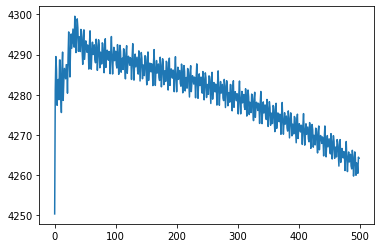

In [26]:
plt.plot(mean_history)

### Α5. Βαθύ νευρωνικό δίκτυο

In [8]:
from sklearn.model_selection import KFold
import tensorflow as tf
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import keras
from keras import backend as K

def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(500,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(500,activation='relu'))
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.1,momentum=0.6),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Using TensorFlow backend.


Epoch 1/500
754/754 [==============================] - 1s 2ms/step - loss: 0.8763 - rmse: 0.9334 - mae: 0.2297
Epoch 2/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8734 - rmse: 0.9320 - mae: 0.2308
Epoch 3/500
754/754 [==============================] - 1s 2ms/step - loss: 0.8705 - rmse: 0.9323 - mae: 0.2326
Epoch 4/500
754/754 [==============================] - 1s 793us/step - loss: 0.8675 - rmse: 0.9266 - mae: 0.2348
Epoch 5/500
754/754 [==============================] - 1s 919us/step - loss: 0.8644 - rmse: 0.9253 - mae: 0.2375
Epoch 6/500
754/754 [==============================] - 1s 2ms/step - loss: 0.8609 - rmse: 0.9252 - mae: 0.2405
Epoch 7/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8569 - rmse: 0.9213 - mae: 0.2440
Epoch 8/500
754/754 [==============================] - 1s 858us/step - loss: 0.8522 - rmse: 0.9241 - mae: 0.2485
Epoch 9/500
754/754 [==============================] - 1s 1ms/step - loss: 0.8464 - rmse: 0.9162 - mae: 0.

754/754 [==============================] - 1s 1ms/step - loss: 0.6924 - rmse: 0.8308 - mae: 0.3565
Epoch 141/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6917 - rmse: 0.8309 - mae: 0.3557: 0s - loss: 0.7
Epoch 142/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6909 - rmse: 0.8314 - mae: 0.3587
Epoch 143/500
754/754 [==============================] - 1s 785us/step - loss: 0.6913 - rmse: 0.8306 - mae: 0.3557
Epoch 144/500
754/754 [==============================] - 1s 826us/step - loss: 0.6914 - rmse: 0.8273 - mae: 0.3596
Epoch 145/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6916 - rmse: 0.8298 - mae: 0.3569
Epoch 146/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6913 - rmse: 0.8307 - mae: 0.3573
Epoch 147/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6912 - rmse: 0.8298 - mae: 0.3563
Epoch 148/500
754/754 [==============================] - 1s 774us/step - loss: 0.6907 - rm

754/754 [==============================] - 1s 1ms/step - loss: 0.6846 - rmse: 0.8268 - mae: 0.3543
Epoch 279/500
754/754 [==============================] - 1s 826us/step - loss: 0.6848 - rmse: 0.8260 - mae: 0.3563
Epoch 280/500
754/754 [==============================] - 1s 837us/step - loss: 0.6846 - rmse: 0.8261 - mae: 0.3532
Epoch 281/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6842 - rmse: 0.8253 - mae: 0.3566
Epoch 282/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6849 - rmse: 0.8263 - mae: 0.3518: 0s - loss: 0.6678 - rmse
Epoch 283/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6851 - rmse: 0.8253 - mae: 0.3568
Epoch 284/500
754/754 [==============================] - 1s 784us/step - loss: 0.6846 - rmse: 0.8262 - mae: 0.3528
Epoch 285/500
754/754 [==============================] - 1s 844us/step - loss: 0.6839 - rmse: 0.8240 - mae: 0.3583
Epoch 286/500
754/754 [==============================] - 1s 1ms/step - loss:

754/754 [==============================] - 1s 837us/step - loss: 0.6814 - rmse: 0.8232 - mae: 0.3500
Epoch 419/500
754/754 [==============================] - 1s 872us/step - loss: 0.6801 - rmse: 0.8244 - mae: 0.3527
Epoch 420/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6800 - rmse: 0.8246 - mae: 0.3517
Epoch 421/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6803 - rmse: 0.8231 - mae: 0.3506
Epoch 422/500
754/754 [==============================] - 2s 2ms/step - loss: 0.6805 - rmse: 0.8225 - mae: 0.3539
Epoch 423/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6803 - rmse: 0.8233 - mae: 0.3533
Epoch 424/500
754/754 [==============================] - 1s 914us/step - loss: 0.6799 - rmse: 0.8235 - mae: 0.3507
Epoch 425/500
754/754 [==============================] - 1s 926us/step - loss: 0.6805 - rmse: 0.8234 - mae: 0.3525
Epoch 426/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6800 - rmse: 0.8238 - m

754/754 [==============================] - 1s 2ms/step - loss: 0.6804 - rmse: 0.8226 - mae: 0.3521
Epoch 57/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6801 - rmse: 0.8223 - mae: 0.3523
Epoch 58/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6800 - rmse: 0.8263 - mae: 0.3496
Epoch 59/500
754/754 [==============================] - 1s 866us/step - loss: 0.6797 - rmse: 0.8227 - mae: 0.3546
Epoch 60/500
754/754 [==============================] - 1s 881us/step - loss: 0.6795 - rmse: 0.8190 - mae: 0.3489
Epoch 61/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6793 - rmse: 0.8201 - mae: 0.3504
Epoch 62/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6791 - rmse: 0.8235 - mae: 0.3522
Epoch 63/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6788 - rmse: 0.8205 - mae: 0.3556
Epoch 64/500
754/754 [==============================] - 1s 832us/step - loss: 0.6788 - rmse: 0.8213 - mae: 0.3502

754/754 [==============================] - 1s 782us/step - loss: 0.6588 - rmse: 0.8082 - mae: 0.3433
Epoch 192/500
754/754 [==============================] - 1s 832us/step - loss: 0.6584 - rmse: 0.8121 - mae: 0.3398
Epoch 193/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6589 - rmse: 0.8084 - mae: 0.3433
Epoch 194/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6596 - rmse: 0.8073 - mae: 0.3420
Epoch 195/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6588 - rmse: 0.8077 - mae: 0.3408
Epoch 196/500
754/754 [==============================] - 1s 797us/step - loss: 0.6586 - rmse: 0.8107 - mae: 0.3405
Epoch 197/500
754/754 [==============================] - 1s 851us/step - loss: 0.6586 - rmse: 0.8105 - mae: 0.3418
Epoch 198/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6587 - rmse: 0.8119 - mae: 0.3414
Epoch 199/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6592 - rmse: 0.8111 - m

754/754 [==============================] - 1s 2ms/step - loss: 0.6535 - rmse: 0.8087 - mae: 0.3394
Epoch 332/500
754/754 [==============================] - 2s 3ms/step - loss: 0.6534 - rmse: 0.8065 - mae: 0.3402
Epoch 333/500
754/754 [==============================] - 1s 884us/step - loss: 0.6526 - rmse: 0.8062 - mae: 0.3399
Epoch 334/500
754/754 [==============================] - 1s 869us/step - loss: 0.6544 - rmse: 0.8060 - mae: 0.3319
Epoch 335/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6543 - rmse: 0.8069 - mae: 0.3413
Epoch 336/500
754/754 [==============================] - 2s 2ms/step - loss: 0.6540 - rmse: 0.8078 - mae: 0.3402: 0s - loss: 0.6709 - rmse: 0.8174 - m
Epoch 337/500
754/754 [==============================] - 2s 2ms/step - loss: 0.6541 - rmse: 0.8065 - mae: 0.3378: 0s - loss: 0.6626 - rmse: 
Epoch 338/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6529 - rmse: 0.8088 - mae: 0.3384: 1s - loss: 0.6487 - rmse: 0.80
Epoch 33

754/754 [==============================] - 2s 3ms/step - loss: 0.6492 - rmse: 0.8011 - mae: 0.3383
Epoch 465/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6499 - rmse: 0.8046 - mae: 0.3366
Epoch 466/500
754/754 [==============================] - 1s 973us/step - loss: 0.6496 - rmse: 0.8037 - mae: 0.33640s - loss: 0.6682 - rmse: 0.8153 -
Epoch 467/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6497 - rmse: 0.8029 - mae: 0.3380
Epoch 468/500
754/754 [==============================] - 2s 3ms/step - loss: 0.6490 - rmse: 0.8017 - mae: 0.3390
Epoch 469/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6492 - rmse: 0.8052 - mae: 0.3352: 0s - loss: 0.6412 - rmse: 0.7990 - mae: 0.
Epoch 470/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6499 - rmse: 0.8046 - mae: 0.3372
Epoch 471/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6488 - rmse: 0.8042 - mae: 0.3381
Epoch 472/500
754/754 [=======

754/754 [==============================] - 1s 1ms/step - loss: 0.6715 - rmse: 0.8185 - mae: 0.3499
Epoch 99/500
754/754 [==============================] - 2s 2ms/step - loss: 0.6708 - rmse: 0.8165 - mae: 0.3472
Epoch 100/500
754/754 [==============================] - 2s 3ms/step - loss: 0.6707 - rmse: 0.8189 - mae: 0.3472: 1s - loss: 0.657
Epoch 101/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6701 - rmse: 0.8185 - mae: 0.3479
Epoch 102/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6696 - rmse: 0.8184 - mae: 0.3465
Epoch 103/500
754/754 [==============================] - 2s 3ms/step - loss: 0.6699 - rmse: 0.8165 - mae: 0.3495
Epoch 104/500
754/754 [==============================] - 2s 3ms/step - loss: 0.6689 - rmse: 0.8168 - mae: 0.3441
Epoch 105/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6687 - rmse: 0.8166 - mae: 0.3486
Epoch 106/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6686 - rmse: 0

754/754 [==============================] - 1s 1ms/step - loss: 0.6591 - rmse: 0.8103 - mae: 0.3392: 0s - loss: 0.6543 - rmse: 0.8066 - mae: 0.
Epoch 238/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6602 - rmse: 0.8119 - mae: 0.3430
Epoch 239/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6592 - rmse: 0.8100 - mae: 0.3442
Epoch 240/500
754/754 [==============================] - 1s 792us/step - loss: 0.6595 - rmse: 0.8097 - mae: 0.3410
Epoch 241/500
754/754 [==============================] - 1s 849us/step - loss: 0.6593 - rmse: 0.8073 - mae: 0.3424
Epoch 242/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6589 - rmse: 0.8118 - mae: 0.3375
Epoch 243/500
754/754 [==============================] - 2s 2ms/step - loss: 0.6586 - rmse: 0.8095 - mae: 0.3450: 0s - loss: 0.6826 - rm
Epoch 244/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6590 - rmse: 0.8090 - mae: 0.3410: 0s - loss: 0.6546 
Epoch 245/500
754/

754/754 [==============================] - 1s 756us/step - loss: 0.6547 - rmse: 0.8090 - mae: 0.3358
Epoch 375/500
754/754 [==============================] - 1s 810us/step - loss: 0.6551 - rmse: 0.8077 - mae: 0.3394
Epoch 376/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6540 - rmse: 0.8064 - mae: 0.3386
Epoch 377/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6545 - rmse: 0.8070 - mae: 0.3381
Epoch 378/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6539 - rmse: 0.8094 - mae: 0.3398
Epoch 379/500
754/754 [==============================] - 1s 769us/step - loss: 0.6542 - rmse: 0.8094 - mae: 0.3384
Epoch 380/500
754/754 [==============================] - 1s 819us/step - loss: 0.6538 - rmse: 0.8069 - mae: 0.3395
Epoch 381/500
754/754 [==============================] - 1s 1ms/step - loss: 0.6542 - rmse: 0.8068 - mae: 0.3373
Epoch 382/500
754/754 [==============================] - 1s 2ms/step - loss: 0.6537 - rmse: 0.8057 - m

755/755 [==============================] - 1s 975us/step - loss: 0.8732 - rmse: 0.9336 - mae: 0.2529
Epoch 9/500
755/755 [==============================] - 2s 2ms/step - loss: 0.8672 - rmse: 0.9294 - mae: 0.2587
Epoch 10/500
755/755 [==============================] - 2s 2ms/step - loss: 0.8593 - rmse: 0.9192 - mae: 0.2665
Epoch 11/500
755/755 [==============================] - 1s 929us/step - loss: 0.8482 - rmse: 0.9177 - mae: 0.2775
Epoch 12/500
755/755 [==============================] - 1s 954us/step - loss: 0.8315 - rmse: 0.9116 - mae: 0.2939
Epoch 13/500
755/755 [==============================] - 1s 2ms/step - loss: 0.8070 - rmse: 0.8925 - mae: 0.3195
Epoch 14/500
755/755 [==============================] - 2s 2ms/step - loss: 0.7777 - rmse: 0.8775 - mae: 0.3535
Epoch 15/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7551 - rmse: 0.8682 - mae: 0.3794
Epoch 16/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7435 - rmse: 0.8603 - mae: 0.3891


755/755 [==============================] - 2s 3ms/step - loss: 0.7198 - rmse: 0.8452 - mae: 0.3739
Epoch 78/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7192 - rmse: 0.8460 - mae: 0.3707
Epoch 79/500
755/755 [==============================] - 1s 952us/step - loss: 0.7191 - rmse: 0.8452 - mae: 0.3716
Epoch 80/500
755/755 [==============================] - 1s 2ms/step - loss: 0.7182 - rmse: 0.8459 - mae: 0.3741
Epoch 81/500
755/755 [==============================] - 2s 2ms/step - loss: 0.7184 - rmse: 0.8445 - mae: 0.3683
Epoch 82/500
755/755 [==============================] - 1s 2ms/step - loss: 0.7176 - rmse: 0.8460 - mae: 0.3700
Epoch 83/500
755/755 [==============================] - 1s 917us/step - loss: 0.7171 - rmse: 0.8475 - mae: 0.3697
Epoch 84/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7172 - rmse: 0.8447 - mae: 0.3711
Epoch 85/500
755/755 [==============================] - 2s 2ms/step - loss: 0.7164 - rmse: 0.8456 - mae: 0.3707
E

755/755 [==============================] - 1s 958us/step - loss: 0.7055 - rmse: 0.8374 - mae: 0.36100s - loss: 0.7169 - rmse: 0.8455 - mae - ETA: 0s - loss: 0.7079 - rmse: 0.8395 - m
Epoch 215/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7047 - rmse: 0.8367 - mae: 0.3629: 0s - loss: 0.7266 - rm
Epoch 216/500
755/755 [==============================] - 2s 3ms/step - loss: 0.7049 - rmse: 0.8375 - mae: 0.3630: 1s - loss: 0.7140 
Epoch 217/500
755/755 [==============================] - 1s 2ms/step - loss: 0.7048 - rmse: 0.8400 - mae: 0.3614
Epoch 218/500
755/755 [==============================] - 1s 925us/step - loss: 0.7052 - rmse: 0.8368 - mae: 0.3624
Epoch 219/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7046 - rmse: 0.8363 - mae: 0.3634
Epoch 220/500
755/755 [==============================] - 2s 2ms/step - loss: 0.7044 - rmse: 0.8356 - mae: 0.3636
Epoch 221/500
755/755 [==============================] - 1s 2ms/step - loss: 0.7052 - rmse: 0

755/755 [==============================] - 1s 962us/step - loss: 0.6995 - rmse: 0.8372 - mae: 0.35530s - loss: 0.7109 - rmse: 0.8417
Epoch 347/500
755/755 [==============================] - 1s 2ms/step - loss: 0.7033 - rmse: 0.8368 - mae: 0.3638
Epoch 348/500
755/755 [==============================] - 2s 2ms/step - loss: 0.7007 - rmse: 0.8341 - mae: 0.3616
Epoch 349/500
755/755 [==============================] - ETA: 0s - loss: 0.6963 - rmse: 0.8333 - mae: 0.35 - 1s 2ms/step - loss: 0.7001 - rmse: 0.8362 - mae: 0.3598
Epoch 350/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7004 - rmse: 0.8360 - mae: 0.3608: 0s - loss: 0.6930 - rmse: 0.8298 - mae: 0.
Epoch 351/500
755/755 [==============================] - 2s 2ms/step - loss: 0.7016 - rmse: 0.8372 - mae: 0.3591
Epoch 352/500
755/755 [==============================] - 2s 3ms/step - loss: 0.7004 - rmse: 0.8351 - mae: 0.3619
Epoch 353/500
755/755 [==============================] - 1s 1ms/step - loss: 0.7004 - rmse: 0

755/755 [==============================] - 1s 842us/step - loss: 0.6969 - rmse: 0.8329 - mae: 0.3556
Epoch 484/500
755/755 [==============================] - 1s 912us/step - loss: 0.6982 - rmse: 0.8330 - mae: 0.3603
Epoch 485/500
755/755 [==============================] - 1s 1ms/step - loss: 0.6972 - rmse: 0.8346 - mae: 0.3605
Epoch 486/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6970 - rmse: 0.8340 - mae: 0.3591: 0s - loss: 0.7
Epoch 487/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6978 - rmse: 0.8316 - mae: 0.3613
Epoch 488/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6976 - rmse: 0.8323 - mae: 0.3569
Epoch 489/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6978 - rmse: 0.8315 - mae: 0.3577
Epoch 490/500
755/755 [==============================] - 1s 1ms/step - loss: 0.6970 - rmse: 0.8330 - mae: 0.3596: 0s - loss: 0.6947 - rmse: 0.8317 - mae
Epoch 491/500
755/755 [===========================

755/755 [==============================] - 2s 3ms/step - loss: 0.6913 - rmse: 0.8280 - mae: 0.3584
Epoch 117/500
755/755 [==============================] - 2s 3ms/step - loss: 0.6904 - rmse: 0.8288 - mae: 0.3578
Epoch 118/500
755/755 [==============================] - 1s 1ms/step - loss: 0.6909 - rmse: 0.8292 - mae: 0.3557
Epoch 119/500
755/755 [==============================] - 1s 895us/step - loss: 0.6913 - rmse: 0.8304 - mae: 0.3558
Epoch 120/500
755/755 [==============================] - 1s 1ms/step - loss: 0.6896 - rmse: 0.8291 - mae: 0.3584
Epoch 121/500
755/755 [==============================] - 2s 3ms/step - loss: 0.6911 - rmse: 0.8289 - mae: 0.3569: 0s - loss: 0.6895 - rm
Epoch 122/500
755/755 [==============================] - 2s 2ms/step - loss: 0.6905 - rmse: 0.8276 - mae: 0.3556
Epoch 123/500
755/755 [==============================] - 1s 984us/step - loss: 0.6892 - rmse: 0.8290 - mae: 0.3561
Epoch 124/500
755/755 [==============================] - 1s 2ms/step - loss: 0.689

Epoch 186/500
755/755 [==============================] - 2s 2ms/step - loss: 0.6868 - rmse: 0.8273 - mae: 0.3576
Epoch 187/500
755/755 [==============================] - 2s 2ms/step - loss: 0.6871 - rmse: 0.8263 - mae: 0.3536
Epoch 188/500
755/755 [==============================] - 1s 1ms/step - loss: 0.6875 - rmse: 0.8266 - mae: 0.3522
Epoch 189/500
755/755 [==============================] - 1s 979us/step - loss: 0.6864 - rmse: 0.8280 - mae: 0.3541
Epoch 190/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6872 - rmse: 0.8267 - mae: 0.3584
Epoch 191/500
755/755 [==============================] - 2s 2ms/step - loss: 0.6872 - rmse: 0.8278 - mae: 0.3522
Epoch 192/500
755/755 [==============================] - 2s 3ms/step - loss: 0.6864 - rmse: 0.8261 - mae: 0.3545
Epoch 193/500
755/755 [==============================] - ETA: 0s - loss: 0.6827 - rmse: 0.8235 - mae: 0.35 - 1s 1ms/step - loss: 0.6874 - rmse: 0.8264 - mae: 0.3550
Epoch 194/500
755/755 [===================

755/755 [==============================] - 1s 2ms/step - loss: 0.6810 - rmse: 0.8241 - mae: 0.3511: 1s - l
Epoch 326/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6808 - rmse: 0.8222 - mae: 0.3527
Epoch 327/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6814 - rmse: 0.8235 - mae: 0.3501
Epoch 328/500
755/755 [==============================] - 1s 1ms/step - loss: 0.6809 - rmse: 0.8235 - mae: 0.3513
Epoch 329/500
755/755 [==============================] - 1s 859us/step - loss: 0.6804 - rmse: 0.8209 - mae: 0.3522
Epoch 330/500
755/755 [==============================] - 1s 910us/step - loss: 0.6809 - rmse: 0.8240 - mae: 0.3511
Epoch 331/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6808 - rmse: 0.8232 - mae: 0.3484
Epoch 332/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6808 - rmse: 0.8225 - mae: 0.3537
Epoch 333/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6806 - rmse: 0.8243

755/755 [==============================] - 1s 2ms/step - loss: 0.6772 - rmse: 0.8202 - mae: 0.3503
Epoch 461/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6778 - rmse: 0.8233 - mae: 0.3480
Epoch 462/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6768 - rmse: 0.8202 - mae: 0.3525
Epoch 463/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6775 - rmse: 0.8226 - mae: 0.3469
Epoch 464/500
755/755 [==============================] - 1s 785us/step - loss: 0.6770 - rmse: 0.8192 - mae: 0.3513
Epoch 465/500
755/755 [==============================] - 1s 863us/step - loss: 0.6767 - rmse: 0.8235 - mae: 0.3492
Epoch 466/500
755/755 [==============================] - 1s 1ms/step - loss: 0.6765 - rmse: 0.8218 - mae: 0.3497
Epoch 467/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6771 - rmse: 0.8201 - mae: 0.3527: 0s - loss: 0.738
Epoch 468/500
755/755 [==============================] - 1s 2ms/step - loss: 0.6764 - rm

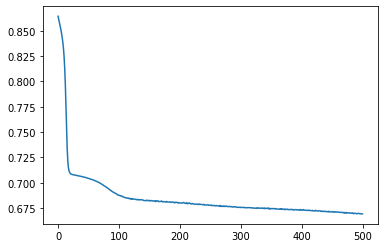

In [10]:
plt.plot(mean_history)

### Επιπλέον αποτελέσματα...
Παρουσιάζω ενδεικτικά κάποια αποτελέσματα απο την εκπαίδευση των ΤΝΔ με τις αρχιτεκτονικές που συζητήθηκαν στα πλαίσια της εργασίας αλλά έχωντας αντικαταστήσει τις αξιολογήσεις που λέιπουν με τις μέσες τιμές του διανύσματος αξιολόγησης..

In [32]:
m = ratings.mean(axis=1)
for i, col in enumerate(ratings):
    ratings.iloc[:,i] = ratings.iloc[:,i].fillna(m)
ratings.head()
# ratings = ratings.fillna(0)
# ratings.head()

item_id      1         2         3         4         5         6         7     \
user_id                                                                         
1        5.000000  3.000000  4.000000  3.000000  3.000000  5.000000  4.000000   
2        4.000000  3.709677  3.709677  3.709677  3.709677  3.709677  3.709677   
3        2.796296  2.796296  2.796296  2.796296  2.796296  2.796296  2.796296   
4        4.333333  4.333333  4.333333  4.333333  4.333333  4.333333  4.333333   
5        4.000000  3.000000  2.874286  2.874286  2.874286  2.874286  2.874286   

item_id      8         9         10    ...      1673      1674      1675  \
user_id                                ...                                 
1        1.000000  5.000000  3.000000  ...  3.610294  3.610294  3.610294   
2        3.709677  3.709677  2.000000  ...  3.709677  3.709677  3.709677   
3        2.796296  2.796296  2.796296  ...  2.796296  2.796296  2.796296   
4        4.333333  4.333333  4.333333  ...  4.333333  4.333333  4.333333   
5        2.874286  2.874286  2.874286  ...  2.874286  2.874286  2.874286   

item_id      1676      1677      1678      1679      1680      1681      1682  
user_id                                                                        
1        3.610294  3.610294  3.610294  3.610294  3.610294  3.610294  3.610294  
2        3.709677  3.709677  3.709677  3.709677  3.709677  3.709677  3.709677  
3        2.796296  2.796296  2.796296  2.796296  2.796296  2.796296  2.796296  
4        4.333333  4.333333  4.333333  4.333333  4.333333  4.333333  4.333333  
5        2.874286  2.874286  2.874286  2.874286  2.874286  2.874286  2.874286  

[5 rows x 1682 columns]

In [14]:
ratings_centered = ratings.subtract(ratings.mean(axis=1))
ratings_centered.head()

1             2             3             4             5     \
user_id                                                                     
1        1.389706 -7.096774e-01  1.203704e+00 -1.333333e+00  1.257143e-01   
2        0.389706 -3.552714e-14  9.133811e-01 -6.236559e-01  8.353917e-01   
3       -0.813998 -9.133811e-01  6.172840e-14 -1.537037e+00 -7.798942e-02   
4        0.723039  6.236559e-01  1.537037e+00  9.769963e-14  1.459048e+00   
5        0.389706 -7.096774e-01  7.798942e-02 -1.459048e+00 -1.199041e-14   

             6         7         8         9         10    ...  1673  1674  \
user_id                                                    ...               
1        1.364929  0.034739 -2.796610  0.727273 -1.206522  ...   NaN   NaN   
2        0.074606 -0.255583 -0.086933 -0.563050 -2.206522  ...   NaN   NaN   
3       -0.838775 -1.168964 -1.000314 -1.476431 -1.410225  ...   NaN   NaN   
4        0.698262  0.368073  0.536723  0.060606  0.126812  ...   NaN   NaN   
5       -0.760785 -1.090975 -0.922324 -1.398442 -1.332236  ...   NaN   NaN   

         1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                  
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 1682 columns]

In [52]:
from sklearn import preprocessing
# ratings_normalized = preprocessing.normalize(ratings,norm='l2') # kathe dianisma kanonikopoieitai kai to dot prosomoiazei cos-similarity
# ratings_normalized
# scaler = preprocessing.StandardScaler()
# ratings_scaled = scaler.fit_transform(ratings)
# --------------------------
min_max_scaler = preprocessing.MinMaxScaler()
ratings_scaled = min_max_scaler.fit_transform(ratings)
ratings_scaled

array([[1.        , 0.5       , 0.75      , ..., 0.62717109, 0.62717109,
        0.62717109],
       [0.75      , 0.67741935, 0.67741935, ..., 0.65659523, 0.65659523,
        0.65659523],
       [0.44907407, 0.44907407, 0.44907407, ..., 0.38617301, 0.38617301,
        0.38617301],
       ...,
       [1.        , 0.76136364, 0.76136364, ..., 0.75600783, 0.75600783,
        0.75600783],
       [0.8164557 , 0.8164557 , 0.8164557 , ..., 0.82125165, 0.82125165,
        0.82125165],
       [0.60267857, 1.        , 0.60267857, ..., 0.56808204, 0.56808204,
        0.56808204]])

In [56]:
X = np.array(users)
Y = np.array(ratings)
print(X.shape)
Y.shape

(943, 943)


(943, 1682)

Εδώ δοκιμάζουμε να εκπαιδεύσουμε ΤΝΔ με lr=0.001 και momentum=0.6 και βλέπουμε τα αποτελέσματα που έχουμε...

In [63]:
from sklearn.model_selection import KFold
import tensorflow as tf
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import keras
from keras import backend as K

def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

def mae(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true))

rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

# ME 10 KRIFOUS KOMVOYS
kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.001,momentum = 0.6),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Epoch 1/500
754/754 [==============================] - 1s 733us/step - loss: 13.0979 - rmse: 3.6177 - mae: 3.5821
Epoch 2/500
754/754 [==============================] - 0s 427us/step - loss: 13.0959 - rmse: 3.6191 - mae: 3.5818 0s - loss: 13.0821 - rmse: 3.6158 - mae: 3.579
Epoch 3/500
754/754 [==============================] - 0s 477us/step - loss: 13.0940 - rmse: 3.6149 - mae: 3.5816
Epoch 4/500
754/754 [==============================] - 1s 674us/step - loss: 13.0920 - rmse: 3.6185 - mae: 3.5813
Epoch 5/500
754/754 [==============================] - 1s 1ms/step - loss: 13.0900 - rmse: 3.6158 - mae: 3.5810
Epoch 6/500
754/754 [==============================] - 1s 880us/step - loss: 13.0880 - rmse: 3.6161 - mae: 3.5807
Epoch 7/500
754/754 [==============================] - 0s 445us/step - loss: 13.0861 - rmse: 3.6205 - mae: 3.5805
Epoch 8/500
754/754 [==============================] - 0s 449us/step - loss: 13.0841 - rmse: 3.6171 - mae: 3.5802
Epoch 9/500
754/754 [======================

754/754 [==============================] - 0s 415us/step - loss: 12.7274 - rmse: 3.5668 - mae: 3.5299
Epoch 136/500
754/754 [==============================] - 1s 937us/step - loss: 12.7215 - rmse: 3.5648 - mae: 3.5290
Epoch 137/500
754/754 [==============================] - 1s 1ms/step - loss: 12.7155 - rmse: 3.5625 - mae: 3.5282A: 0s - loss: 12.7840 - rmse: 3.5747 - mae: 3.
Epoch 138/500
754/754 [==============================] - 0s 596us/step - loss: 12.7093 - rmse: 3.5678 - mae: 3.5273 0s - loss: 12.5443 - rmse: 3.5403 - mae: 3.
Epoch 139/500
754/754 [==============================] - 0s 435us/step - loss: 12.7029 - rmse: 3.5662 - mae: 3.5264
Epoch 140/500
754/754 [==============================] - 0s 429us/step - loss: 12.6964 - rmse: 3.5619 - mae: 3.5254
Epoch 141/500
754/754 [==============================] - 0s 432us/step - loss: 12.6897 - rmse: 3.5604 - mae: 3.5245
Epoch 142/500
754/754 [==============================] - 0s 441us/step - loss: 12.6828 - rmse: 3.5616 - mae: 3.523

Epoch 272/500
754/754 [==============================] - 0s 460us/step - loss: 0.2822 - rmse: 0.5288 - mae: 0.4013
Epoch 273/500
754/754 [==============================] - 0s 440us/step - loss: 0.2805 - rmse: 0.5255 - mae: 0.3998
Epoch 274/500
754/754 [==============================] - 1s 959us/step - loss: 0.2790 - rmse: 0.5264 - mae: 0.3986
Epoch 275/500
754/754 [==============================] - 1s 1ms/step - loss: 0.2776 - rmse: 0.5235 - mae: 0.3972: 0s - loss: 0.2366 - rmse: 
Epoch 276/500
754/754 [==============================] - 0s 594us/step - loss: 0.2763 - rmse: 0.5230 - mae: 0.3962
Epoch 277/500
754/754 [==============================] - 0s 467us/step - loss: 0.2752 - rmse: 0.5202 - mae: 0.39510s - loss: 0.3048 - rmse: 0.5484 - m
Epoch 278/500
754/754 [==============================] - 0s 460us/step - loss: 0.2742 - rmse: 0.5228 - mae: 0.3943
Epoch 279/500
754/754 [==============================] - 0s 447us/step - loss: 0.2732 - rmse: 0.5181 - mae: 0.3934
Epoch 280/500
754/

754/754 [==============================] - 0s 436us/step - loss: 0.2625 - rmse: 0.5112 - mae: 0.3843
Epoch 409/500
754/754 [==============================] - 1s 873us/step - loss: 0.2625 - rmse: 0.5097 - mae: 0.3843
Epoch 410/500
754/754 [==============================] - 1s 1ms/step - loss: 0.2625 - rmse: 0.5121 - mae: 0.3843
Epoch 411/500
754/754 [==============================] - 1s 712us/step - loss: 0.2625 - rmse: 0.5093 - mae: 0.3843
Epoch 412/500
754/754 [==============================] - 0s 456us/step - loss: 0.2625 - rmse: 0.5073 - mae: 0.3843
Epoch 413/500
754/754 [==============================] - 0s 449us/step - loss: 0.2624 - rmse: 0.5059 - mae: 0.3843
Epoch 414/500
754/754 [==============================] - 0s 436us/step - loss: 0.2624 - rmse: 0.5073 - mae: 0.3842
Epoch 415/500
754/754 [==============================] - 0s 434us/step - loss: 0.2624 - rmse: 0.5108 - mae: 0.3842
Epoch 416/500
754/754 [==============================] - 1s 863us/step - loss: 0.2624 - rmse: 0.

754/754 [==============================] - 0s 436us/step - loss: 12.9534 - rmse: 3.5984 - mae: 3.5619
Epoch 46/500
754/754 [==============================] - 0s 507us/step - loss: 12.9512 - rmse: 3.5995 - mae: 3.5616 0s - loss: 13.0262 - rmse: 3.6088 - mae: 3.
Epoch 47/500
754/754 [==============================] - 1s 1ms/step - loss: 12.9491 - rmse: 3.5974 - mae: 3.5613
Epoch 48/500
754/754 [==============================] - 1s 1ms/step - loss: 12.9470 - rmse: 3.5951 - mae: 3.5610
Epoch 49/500
754/754 [==============================] - 0s 437us/step - loss: 12.9448 - rmse: 3.5989 - mae: 3.5607
Epoch 50/500
754/754 [==============================] - 0s 438us/step - loss: 12.9427 - rmse: 3.5951 - mae: 3.5604
Epoch 51/500
754/754 [==============================] - 0s 438us/step - loss: 12.9405 - rmse: 3.5949 - mae: 3.5601
Epoch 52/500
754/754 [==============================] - 0s 434us/step - loss: 12.9383 - rmse: 3.5979 - mae: 3.5598
Epoch 53/500
754/754 [==============================]

754/754 [==============================] - 0s 419us/step - loss: 11.8860 - rmse: 3.4467 - mae: 3.4075
Epoch 183/500
754/754 [==============================] - 1s 799us/step - loss: 11.8462 - rmse: 3.4403 - mae: 3.4016
Epoch 184/500
754/754 [==============================] - 1s 1ms/step - loss: 11.8043 - rmse: 3.4317 - mae: 3.3953
Epoch 185/500
754/754 [==============================] - 1s 738us/step - loss: 11.7601 - rmse: 3.4269 - mae: 3.3887
Epoch 186/500
754/754 [==============================] - 0s 439us/step - loss: 11.7133 - rmse: 3.4227 - mae: 3.3817
Epoch 187/500
754/754 [==============================] - 0s 406us/step - loss: 11.6639 - rmse: 3.4148 - mae: 3.3743
Epoch 188/500
754/754 [==============================] - 0s 437us/step - loss: 11.6117 - rmse: 3.4042 - mae: 3.3665
Epoch 189/500
754/754 [==============================] - 0s 415us/step - loss: 11.5564 - rmse: 3.3972 - mae: 3.3581
Epoch 190/500
754/754 [==============================] - 1s 673us/step - loss: 11.4978 -

754/754 [==============================] - 0s 425us/step - loss: 0.2611 - rmse: 0.5071 - mae: 0.3800
Epoch 320/500
754/754 [==============================] - 0s 440us/step - loss: 0.2611 - rmse: 0.5062 - mae: 0.3801
Epoch 321/500
754/754 [==============================] - 0s 451us/step - loss: 0.2611 - rmse: 0.5079 - mae: 0.3800
Epoch 322/500
754/754 [==============================] - 1s 797us/step - loss: 0.2610 - rmse: 0.5075 - mae: 0.3801
Epoch 323/500
754/754 [==============================] - 1s 1ms/step - loss: 0.2610 - rmse: 0.5064 - mae: 0.3799
Epoch 324/500
754/754 [==============================] - 1s 688us/step - loss: 0.2609 - rmse: 0.5063 - mae: 0.3800
Epoch 325/500
754/754 [==============================] - 0s 426us/step - loss: 0.2609 - rmse: 0.5064 - mae: 0.3800
Epoch 326/500
754/754 [==============================] - 0s 431us/step - loss: 0.2609 - rmse: 0.5093 - mae: 0.3800
Epoch 327/500
754/754 [==============================] - 0s 438us/step - loss: 0.2609 - rmse: 0.

754/754 [==============================] - 0s 427us/step - loss: 0.2577 - rmse: 0.5064 - mae: 0.3776
Epoch 458/500
754/754 [==============================] - 0s 408us/step - loss: 0.2577 - rmse: 0.5055 - mae: 0.3777
Epoch 459/500
754/754 [==============================] - 0s 427us/step - loss: 0.2576 - rmse: 0.5040 - mae: 0.3777
Epoch 460/500
754/754 [==============================] - 0s 438us/step - loss: 0.2576 - rmse: 0.5058 - mae: 0.3776
Epoch 461/500
754/754 [==============================] - 1s 1ms/step - loss: 0.2576 - rmse: 0.5014 - mae: 0.3776: 0s - loss: 0.2678 - rmse: 0.5137 - mae: 0. - ETA: 0s - loss: 0.2549 - rmse: 0.5015
Epoch 462/500
754/754 [==============================] - 1s 1ms/step - loss: 0.2575 - rmse: 0.5029 - mae: 0.3776
Epoch 463/500
754/754 [==============================] - 0s 495us/step - loss: 0.2575 - rmse: 0.5039 - mae: 0.3775
Epoch 464/500
754/754 [==============================] - 0s 430us/step - loss: 0.2575 - rmse: 0.5031 - mae: 0.3775
Epoch 465/500


754/754 [==============================] - 0s 543us/step - loss: 12.8908 - rmse: 3.5922 - mae: 3.5533
Epoch 93/500
754/754 [==============================] - 1s 1ms/step - loss: 12.8877 - rmse: 3.5897 - mae: 3.5528
Epoch 94/500
754/754 [==============================] - 1s 1ms/step - loss: 12.8847 - rmse: 3.5877 - mae: 3.5524A: 0s - loss: 12.8145 - rmse: 3.5788 - mae: 3.543
Epoch 95/500
754/754 [==============================] - 0s 430us/step - loss: 12.8815 - rmse: 3.5875 - mae: 3.5520
Epoch 96/500
754/754 [==============================] - 0s 433us/step - loss: 12.8784 - rmse: 3.5871 - mae: 3.5515
Epoch 97/500
754/754 [==============================] - 0s 437us/step - loss: 12.8752 - rmse: 3.5874 - mae: 3.5511
Epoch 98/500
754/754 [==============================] - 0s 441us/step - loss: 12.8719 - rmse: 3.5867 - mae: 3.5506
Epoch 99/500
754/754 [==============================] - 1s 726us/step - loss: 12.8686 - rmse: 3.5876 - mae: 3.5501
Epoch 100/500
754/754 [=========================

754/754 [==============================] - 0s 444us/step - loss: 2.4143 - rmse: 1.5500 - mae: 1.4139
Epoch 229/500
754/754 [==============================] - 0s 657us/step - loss: 2.1382 - rmse: 1.4600 - mae: 1.3164
Epoch 230/500
754/754 [==============================] - 1s 1ms/step - loss: 1.8864 - rmse: 1.3700 - mae: 1.2223
Epoch 231/500
754/754 [==============================] - 1s 824us/step - loss: 1.6605 - rmse: 1.2871 - mae: 1.1331
Epoch 232/500
754/754 [==============================] - 0s 454us/step - loss: 1.4593 - rmse: 1.2063 - mae: 1.0501
Epoch 233/500
754/754 [==============================] - 0s 420us/step - loss: 1.2827 - rmse: 1.1306 - mae: 0.9726
Epoch 234/500
754/754 [==============================] - 0s 429us/step - loss: 1.1293 - rmse: 1.0606 - mae: 0.9018
Epoch 235/500
754/754 [==============================] - 0s 442us/step - loss: 0.9976 - rmse: 0.9955 - mae: 0.8387
Epoch 236/500
754/754 [==============================] - 0s 650us/step - loss: 0.8853 - rmse: 0.

754/754 [==============================] - 0s 432us/step - loss: 0.2581 - rmse: 0.5080 - mae: 0.3809
Epoch 367/500
754/754 [==============================] - 0s 566us/step - loss: 0.2581 - rmse: 0.5072 - mae: 0.3810
Epoch 368/500
754/754 [==============================] - 1s 1ms/step - loss: 0.2580 - rmse: 0.5044 - mae: 0.3809: 0s - loss: 0.2566 - rmse: 0.5019 - mae: 0.38
Epoch 369/500
754/754 [==============================] - 1s 952us/step - loss: 0.2580 - rmse: 0.5036 - mae: 0.3809
Epoch 370/500
754/754 [==============================] - 0s 435us/step - loss: 0.2579 - rmse: 0.5053 - mae: 0.3809
Epoch 371/500
754/754 [==============================] - 0s 436us/step - loss: 0.2579 - rmse: 0.5019 - mae: 0.3810
Epoch 372/500
754/754 [==============================] - 0s 426us/step - loss: 0.2579 - rmse: 0.5060 - mae: 0.3808
Epoch 373/500
754/754 [==============================] - 0s 454us/step - loss: 0.2578 - rmse: 0.5034 - mae: 0.3808
Epoch 374/500
754/754 [===========================

755/755 [==============================] - 1s 936us/step - loss: 13.2976 - rmse: 3.6426 - mae: 3.6098
Epoch 2/500
755/755 [==============================] - 0s 458us/step - loss: 13.2956 - rmse: 3.6452 - mae: 3.6095
Epoch 3/500
755/755 [==============================] - 0s 446us/step - loss: 13.2936 - rmse: 3.6437 - mae: 3.6093
Epoch 4/500
755/755 [==============================] - 0s 441us/step - loss: 13.2915 - rmse: 3.6426 - mae: 3.6090
Epoch 5/500
755/755 [==============================] - 0s 457us/step - loss: 13.2895 - rmse: 3.6446 - mae: 3.6087
Epoch 6/500
755/755 [==============================] - 1s 929us/step - loss: 13.2875 - rmse: 3.6453 - mae: 3.6084
Epoch 7/500
755/755 [==============================] - 1s 1ms/step - loss: 13.2854 - rmse: 3.6442 - mae: 3.6081
Epoch 8/500
755/755 [==============================] - 0s 606us/step - loss: 13.2834 - rmse: 3.6447 - mae: 3.6079
Epoch 9/500
755/755 [==============================] - 0s 425us/step - loss: 13.2813 - rmse: 3.6422 - 

755/755 [==============================] - 0s 633us/step - loss: 12.8051 - rmse: 3.5769 - mae: 3.5406
Epoch 140/500
755/755 [==============================] - 0s 430us/step - loss: 12.7947 - rmse: 3.5807 - mae: 3.5391
Epoch 141/500
755/755 [==============================] - 0s 422us/step - loss: 12.7839 - rmse: 3.5765 - mae: 3.5376
Epoch 142/500
755/755 [==============================] - 0s 450us/step - loss: 12.7728 - rmse: 3.5703 - mae: 3.5360
Epoch 143/500
755/755 [==============================] - 0s 475us/step - loss: 12.7613 - rmse: 3.5710 - mae: 3.5344 0s - loss: 12.9263 - rmse: 3.5952 - mae: 3
Epoch 144/500
755/755 [==============================] - 1s 822us/step - loss: 12.7494 - rmse: 3.5696 - mae: 3.5327
Epoch 145/500
755/755 [==============================] - 1s 1ms/step - loss: 12.7371 - rmse: 3.5704 - mae: 3.5309
Epoch 146/500
755/755 [==============================] - 1s 720us/step - loss: 12.7243 - rmse: 3.5670 - mae: 3.5291
Epoch 147/500
755/755 [======================

755/755 [==============================] - 0s 650us/step - loss: 0.2651 - rmse: 0.5137 - mae: 0.3869
Epoch 277/500
755/755 [==============================] - 0s 437us/step - loss: 0.2648 - rmse: 0.5123 - mae: 0.3867
Epoch 278/500
755/755 [==============================] - 0s 438us/step - loss: 0.2646 - rmse: 0.5117 - mae: 0.3865
Epoch 279/500
755/755 [==============================] - 0s 458us/step - loss: 0.2644 - rmse: 0.5094 - mae: 0.3863
Epoch 280/500
755/755 [==============================] - 0s 442us/step - loss: 0.2641 - rmse: 0.5096 - mae: 0.3861
Epoch 281/500
755/755 [==============================] - 1s 727us/step - loss: 0.2639 - rmse: 0.5099 - mae: 0.3860
Epoch 282/500
755/755 [==============================] - 1s 1ms/step - loss: 0.2638 - rmse: 0.5091 - mae: 0.3858: 0s - loss: 0.2422 - rmse: 0.48
Epoch 283/500
755/755 [==============================] - 1s 748us/step - loss: 0.2636 - rmse: 0.5100 - mae: 0.3857
Epoch 284/500
755/755 [==============================] - 0s 393u

755/755 [==============================] - 0s 427us/step - loss: 0.2569 - rmse: 0.5046 - mae: 0.38070s - loss: 0.2793 - rmse: 0.5242 - mae: 
Epoch 413/500
755/755 [==============================] - 0s 417us/step - loss: 0.2569 - rmse: 0.5042 - mae: 0.3806
Epoch 414/500
755/755 [==============================] - 0s 412us/step - loss: 0.2569 - rmse: 0.5036 - mae: 0.3806
Epoch 415/500
755/755 [==============================] - 0s 434us/step - loss: 0.2568 - rmse: 0.5020 - mae: 0.3806
Epoch 416/500
755/755 [==============================] - 0s 449us/step - loss: 0.2568 - rmse: 0.5042 - mae: 0.3805
Epoch 417/500
755/755 [==============================] - 1s 959us/step - loss: 0.2568 - rmse: 0.5028 - mae: 0.3804
Epoch 418/500
755/755 [==============================] - 1s 1ms/step - loss: 0.2567 - rmse: 0.5037 - mae: 0.3805
Epoch 419/500
755/755 [==============================] - 0s 480us/step - loss: 0.2567 - rmse: 0.5020 - mae: 0.3804
Epoch 420/500
755/755 [==============================] -

755/755 [==============================] - 1s 884us/step - loss: 0.2544 - rmse: 0.5012 - mae: 0.3787
Epoch 483/500
755/755 [==============================] - 1s 1ms/step - loss: 0.2544 - rmse: 0.4999 - mae: 0.3785
Epoch 484/500
755/755 [==============================] - 0s 607us/step - loss: 0.2543 - rmse: 0.5028 - mae: 0.3785
Epoch 485/500
755/755 [==============================] - 0s 423us/step - loss: 0.2543 - rmse: 0.5042 - mae: 0.3787
Epoch 486/500
755/755 [==============================] - 0s 435us/step - loss: 0.2543 - rmse: 0.5019 - mae: 0.3786
Epoch 487/500
755/755 [==============================] - 0s 471us/step - loss: 0.2542 - rmse: 0.5034 - mae: 0.3785
Epoch 488/500
755/755 [==============================] - 0s 438us/step - loss: 0.2542 - rmse: 0.4986 - mae: 0.3785
Epoch 489/500
755/755 [==============================] - 1s 875us/step - loss: 0.2541 - rmse: 0.5014 - mae: 0.3785
Epoch 490/500
755/755 [==============================] - 1s 1ms/step - loss: 0.2541 - rmse: 0.50

755/755 [==============================] - 0s 652us/step - loss: 12.8841 - rmse: 3.5911 - mae: 3.5529
Epoch 116/500
755/755 [==============================] - 1s 1ms/step - loss: 12.8801 - rmse: 3.5882 - mae: 3.5523A: 0s - loss: 12.9467 - rmse: 3.5973 - mae:
Epoch 117/500
755/755 [==============================] - 1s 843us/step - loss: 12.8761 - rmse: 3.5881 - mae: 3.5517
Epoch 118/500
755/755 [==============================] - 0s 436us/step - loss: 12.8719 - rmse: 3.5857 - mae: 3.5511
Epoch 119/500
755/755 [==============================] - 0s 459us/step - loss: 12.8677 - rmse: 3.5830 - mae: 3.5506
Epoch 120/500
755/755 [==============================] - 0s 445us/step - loss: 12.8634 - rmse: 3.5880 - mae: 3.5499
Epoch 121/500
755/755 [==============================] - 0s 437us/step - loss: 12.8591 - rmse: 3.5839 - mae: 3.5493
Epoch 122/500
755/755 [==============================] - 0s 651us/step - loss: 12.8546 - rmse: 3.5846 - mae: 3.5487
Epoch 123/500
755/755 [======================

755/755 [==============================] - 1s 717us/step - loss: 0.3863 - rmse: 0.6199 - mae: 0.4852
Epoch 253/500
755/755 [==============================] - 1s 1ms/step - loss: 0.3704 - rmse: 0.6073 - mae: 0.4731
Epoch 254/500
755/755 [==============================] - 1s 823us/step - loss: 0.3568 - rmse: 0.5949 - mae: 0.4623
Epoch 255/500
755/755 [==============================] - 0s 426us/step - loss: 0.3451 - rmse: 0.5837 - mae: 0.4529
Epoch 256/500
755/755 [==============================] - 0s 432us/step - loss: 0.3351 - rmse: 0.5774 - mae: 0.4446
Epoch 257/500
755/755 [==============================] - 0s 431us/step - loss: 0.3265 - rmse: 0.5675 - mae: 0.4374
Epoch 258/500
755/755 [==============================] - 0s 442us/step - loss: 0.3190 - rmse: 0.5622 - mae: 0.4310
Epoch 259/500
755/755 [==============================] - 0s 658us/step - loss: 0.3124 - rmse: 0.5562 - mae: 0.4253
Epoch 260/500
755/755 [==============================] - 1s 1ms/step - loss: 0.3066 - rmse: 0.54

755/755 [==============================] - 0s 441us/step - loss: 0.2516 - rmse: 0.4983 - mae: 0.3685
Epoch 390/500
755/755 [==============================] - 1s 1ms/step - loss: 0.2515 - rmse: 0.4974 - mae: 0.3685
Epoch 391/500
755/755 [==============================] - 1s 1ms/step - loss: 0.2515 - rmse: 0.4988 - mae: 0.3686
Epoch 392/500
755/755 [==============================] - 0s 501us/step - loss: 0.2515 - rmse: 0.4964 - mae: 0.3684
Epoch 393/500
755/755 [==============================] - 0s 453us/step - loss: 0.2514 - rmse: 0.4975 - mae: 0.3684
Epoch 394/500
755/755 [==============================] - 0s 439us/step - loss: 0.2514 - rmse: 0.4992 - mae: 0.3684
Epoch 395/500
755/755 [==============================] - 0s 435us/step - loss: 0.2514 - rmse: 0.4993 - mae: 0.3684
Epoch 396/500
755/755 [==============================] - 0s 454us/step - loss: 0.2513 - rmse: 0.4997 - mae: 0.3683
Epoch 397/500
755/755 [==============================] - 1s 995us/step - loss: 0.2513 - rmse: 0.49

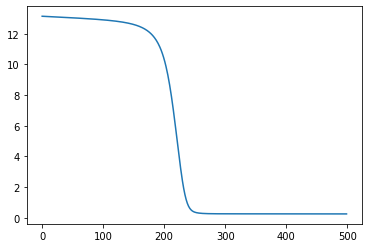

In [64]:
import matplotlib.pyplot as plt
plt.plot(mean_history)

Και εδώ χρησιμοποιούμε lr=0.1 και momentum=0.6

In [65]:
rmseList = []
maeList = []
# gia tis grafikes parastaseis sigklisis
sum_history=[0 for i in range(500)] # range osa kai ta epochs

# ME 10 KRIFOUS KOMVOYS
kf = KFold(n_splits=5)
fold = 1
for train,test in kf.split(X,Y):
    model = Sequential()
    model.add(Dense(943,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(1682,activation='linear'))

    model.compile(optimizer=keras.optimizers.SGD(lr=0.1,momentum = 0.6),
             loss = 'mean_squared_error',
             metrics=[rmse,'mae'])
    history = model.fit(X[train],Y[train],epochs=500)
    
    sum_history = [sum(x) for x in zip(sum_history,history.history['loss'])]  
    
    scores = model.evaluate(X[test],Y[test])
    
    rmseList.append(scores[1]) # to scores[1] krataei to rmse
    maeList.append(scores[2]) # to scores[2] krataei to mae
    print('-----------------------------------------------------')
    print(f'Fold number {fold}: Sto test set exw {model.metrics_names[0]} :{scores[0]}, {model.metrics_names[1]}: {scores[1]} kai {model.metrics_names[2]}:{scores[2]}' )
    fold = fold +1

print('------------------------------------------------------------------------')
print('Average test scores gia ola ta folds:')
print(f'> RMSE: {np.mean(rmseList)} (+- {np.std(rmseList)})')
print(f'> MAE: {np.mean(maeList)} (+-{np.std(maeList)})')

mean_history = [x/5 for x in sum_history]

Epoch 1/500
754/754 [==============================] - 1s 765us/step - loss: 13.0119 - rmse: 3.6101 - mae: 3.5701
Epoch 2/500
754/754 [==============================] - 0s 444us/step - loss: 12.6195 - rmse: 3.5480 - mae: 3.5143
Epoch 3/500
754/754 [==============================] - 0s 451us/step - loss: 5.5301 - rmse: 2.0223 - mae: 1.9525
Epoch 4/500
754/754 [==============================] - 0s 444us/step - loss: 0.2677 - rmse: 0.5156 - mae: 0.3879
Epoch 5/500
754/754 [==============================] - 0s 504us/step - loss: 0.2665 - rmse: 0.5136 - mae: 0.3874
Epoch 6/500
754/754 [==============================] - 0s 477us/step - loss: 0.2635 - rmse: 0.5089 - mae: 0.3856
Epoch 7/500
754/754 [==============================] - 0s 474us/step - loss: 0.2619 - rmse: 0.5072 - mae: 0.3829
Epoch 8/500
754/754 [==============================] - 0s 481us/step - loss: 0.2619 - rmse: 0.5117 - mae: 0.3822
Epoch 9/500
754/754 [==============================] - 0s 494us/step - loss: 0.2596 - rmse: 0.

754/754 [==============================] - 0s 421us/step - loss: 0.2413 - rmse: 0.4889 - mae: 0.3519
Epoch 142/500
754/754 [==============================] - 0s 444us/step - loss: 0.2417 - rmse: 0.4905 - mae: 0.3497
Epoch 143/500
754/754 [==============================] - 0s 467us/step - loss: 0.2422 - rmse: 0.4877 - mae: 0.3511
Epoch 144/500
754/754 [==============================] - 0s 430us/step - loss: 0.2423 - rmse: 0.4886 - mae: 0.3515
Epoch 145/500
754/754 [==============================] - 0s 431us/step - loss: 0.2402 - rmse: 0.4890 - mae: 0.3493
Epoch 146/500
754/754 [==============================] - 0s 424us/step - loss: 0.2422 - rmse: 0.4907 - mae: 0.3503
Epoch 147/500
754/754 [==============================] - 0s 437us/step - loss: 0.2419 - rmse: 0.4862 - mae: 0.3523
Epoch 148/500
754/754 [==============================] - 0s 473us/step - loss: 0.2407 - rmse: 0.4871 - mae: 0.3484
Epoch 149/500
754/754 [==============================] - 0s 448us/step - loss: 0.2407 - rmse: 

754/754 [==============================] - 0s 622us/step - loss: 0.2439 - rmse: 0.4891 - mae: 0.3518
Epoch 277/500
754/754 [==============================] - 0s 394us/step - loss: 0.2403 - rmse: 0.4835 - mae: 0.3505
Epoch 278/500
754/754 [==============================] - 0s 373us/step - loss: 0.2398 - rmse: 0.4845 - mae: 0.3458
Epoch 279/500
754/754 [==============================] - 0s 394us/step - loss: 0.2429 - rmse: 0.4901 - mae: 0.3492
Epoch 280/500
754/754 [==============================] - 0s 394us/step - loss: 0.2392 - rmse: 0.4867 - mae: 0.3471
Epoch 281/500
754/754 [==============================] - 0s 394us/step - loss: 0.2408 - rmse: 0.4878 - mae: 0.3465
Epoch 282/500
754/754 [==============================] - 1s 767us/step - loss: 0.2408 - rmse: 0.4869 - mae: 0.3484
Epoch 283/500
754/754 [==============================] - 1s 956us/step - loss: 0.2385 - rmse: 0.4874 - mae: 0.34710s - loss: 0.2329 - rmse: 0.4783
Epoch 284/500
754/754 [==============================] - 1s 70

754/754 [==============================] - 1s 705us/step - loss: 0.2387 - rmse: 0.4870 - mae: 0.34520s - loss: 0.2402 - rmse: 0.4880 - mae
Epoch 413/500
754/754 [==============================] - 1s 969us/step - loss: 0.2413 - rmse: 0.4867 - mae: 0.3471
Epoch 414/500
754/754 [==============================] - 1s 864us/step - loss: 0.2401 - rmse: 0.4887 - mae: 0.3457
Epoch 415/500
754/754 [==============================] - 0s 436us/step - loss: 0.2410 - rmse: 0.4863 - mae: 0.3471
Epoch 416/500
754/754 [==============================] - 0s 431us/step - loss: 0.2400 - rmse: 0.4853 - mae: 0.3464
Epoch 417/500
754/754 [==============================] - 0s 434us/step - loss: 0.2403 - rmse: 0.4855 - mae: 0.3471
Epoch 418/500
754/754 [==============================] - 0s 444us/step - loss: 0.2408 - rmse: 0.4870 - mae: 0.3490
Epoch 419/500
754/754 [==============================] - 0s 628us/step - loss: 0.2382 - rmse: 0.4840 - mae: 0.3463
Epoch 420/500
754/754 [==============================] -

754/754 [==============================] - 0s 422us/step - loss: 0.2357 - rmse: 0.4837 - mae: 0.3496
Epoch 47/500
754/754 [==============================] - 0s 438us/step - loss: 0.2348 - rmse: 0.4812 - mae: 0.3479
Epoch 48/500
754/754 [==============================] - 0s 434us/step - loss: 0.2349 - rmse: 0.4819 - mae: 0.3484
Epoch 49/500
754/754 [==============================] - 0s 439us/step - loss: 0.2346 - rmse: 0.4823 - mae: 0.3475
Epoch 50/500
754/754 [==============================] - 0s 470us/step - loss: 0.2347 - rmse: 0.4814 - mae: 0.3474
Epoch 51/500
754/754 [==============================] - 1s 1ms/step - loss: 0.2351 - rmse: 0.4835 - mae: 0.3473: 0s - loss: 0.2341 - rmse: 0.4816 - - ETA: 0s - loss: 0.2356 - rmse: 0.4823 - mae
Epoch 52/500
754/754 [==============================] - 1s 1ms/step - loss: 0.2337 - rmse: 0.4798 - mae: 0.3463
Epoch 53/500
754/754 [==============================] - 0s 519us/step - loss: 0.2345 - rmse: 0.4819 - mae: 0.3465
Epoch 54/500
754/754 [=

754/754 [==============================] - 0s 424us/step - loss: 0.2276 - rmse: 0.4732 - mae: 0.3315
Epoch 184/500
754/754 [==============================] - 0s 438us/step - loss: 0.2282 - rmse: 0.4756 - mae: 0.3307
Epoch 185/500
754/754 [==============================] - 0s 435us/step - loss: 0.2290 - rmse: 0.4767 - mae: 0.3310
Epoch 186/500
754/754 [==============================] - 0s 456us/step - loss: 0.2272 - rmse: 0.4729 - mae: 0.3296
Epoch 187/500
754/754 [==============================] - 0s 628us/step - loss: 0.2290 - rmse: 0.4734 - mae: 0.3326
Epoch 188/500
754/754 [==============================] - 1s 1ms/step - loss: 0.2280 - rmse: 0.4749 - mae: 0.3323
Epoch 189/500
754/754 [==============================] - 1s 948us/step - loss: 0.2276 - rmse: 0.4747 - mae: 0.3280
Epoch 190/500
754/754 [==============================] - 0s 442us/step - loss: 0.2292 - rmse: 0.4744 - mae: 0.3332
Epoch 191/500
754/754 [==============================] - 0s 428us/step - loss: 0.2272 - rmse: 0.

754/754 [==============================] - 1s 746us/step - loss: 0.2266 - rmse: 0.4727 - mae: 0.3286
Epoch 321/500
754/754 [==============================] - 1s 808us/step - loss: 0.2290 - rmse: 0.4765 - mae: 0.3301
Epoch 322/500
754/754 [==============================] - 1s 725us/step - loss: 0.2263 - rmse: 0.4704 - mae: 0.3296
Epoch 323/500
754/754 [==============================] - 0s 373us/step - loss: 0.2283 - rmse: 0.4747 - mae: 0.3294
Epoch 324/500
754/754 [==============================] - 0s 373us/step - loss: 0.2266 - rmse: 0.4708 - mae: 0.3279
Epoch 325/500
754/754 [==============================] - 0s 373us/step - loss: 0.2279 - rmse: 0.4718 - mae: 0.3297
Epoch 326/500
754/754 [==============================] - 0s 394us/step - loss: 0.2270 - rmse: 0.4731 - mae: 0.3300
Epoch 327/500
754/754 [==============================] - 0s 394us/step - loss: 0.2300 - rmse: 0.4749 - mae: 0.3334
Epoch 328/500
754/754 [==============================] - 0s 601us/step - loss: 0.2301 - rmse: 

754/754 [==============================] - 0s 441us/step - loss: 0.2271 - rmse: 0.4747 - mae: 0.3269
Epoch 456/500
754/754 [==============================] - 0s 646us/step - loss: 0.2282 - rmse: 0.4754 - mae: 0.3308
Epoch 457/500
754/754 [==============================] - 1s 995us/step - loss: 0.2281 - rmse: 0.4711 - mae: 0.3302
Epoch 458/500
754/754 [==============================] - 1s 973us/step - loss: 0.2269 - rmse: 0.4732 - mae: 0.3273
Epoch 459/500
754/754 [==============================] - 0s 424us/step - loss: 0.2262 - rmse: 0.4732 - mae: 0.3276
Epoch 460/500
754/754 [==============================] - 0s 434us/step - loss: 0.2268 - rmse: 0.4757 - mae: 0.3283
Epoch 461/500
754/754 [==============================] - 0s 445us/step - loss: 0.2272 - rmse: 0.4751 - mae: 0.3317
Epoch 462/500
754/754 [==============================] - 0s 473us/step - loss: 0.2268 - rmse: 0.4714 - mae: 0.3282
Epoch 463/500
754/754 [==============================] - 0s 563us/step - loss: 0.2289 - rmse: 

754/754 [==============================] - 0s 444us/step - loss: 0.2022 - rmse: 0.4493 - mae: 0.2999
Epoch 89/500
754/754 [==============================] - 1s 816us/step - loss: 0.2027 - rmse: 0.4475 - mae: 0.3010
Epoch 90/500
754/754 [==============================] - 1s 1ms/step - loss: 0.2029 - rmse: 0.4495 - mae: 0.3003: 0s - loss: 0.2013 - rmse: 0.4465 - mae: 0.29
Epoch 91/500
754/754 [==============================] - 1s 743us/step - loss: 0.2028 - rmse: 0.4472 - mae: 0.2999
Epoch 92/500
754/754 [==============================] - 0s 433us/step - loss: 0.2031 - rmse: 0.4481 - mae: 0.2998
Epoch 93/500
754/754 [==============================] - 0s 428us/step - loss: 0.2053 - rmse: 0.4530 - mae: 0.3021
Epoch 94/500
754/754 [==============================] - 0s 464us/step - loss: 0.2015 - rmse: 0.4466 - mae: 0.2988
Epoch 95/500
754/754 [==============================] - 0s 478us/step - loss: 0.2014 - rmse: 0.4480 - mae: 0.2984
Epoch 96/500
754/754 [==============================] - 1

Epoch 225/500
754/754 [==============================] - 1s 752us/step - loss: 0.1994 - rmse: 0.4415 - mae: 0.2918
Epoch 226/500
754/754 [==============================] - 1s 1ms/step - loss: 0.1997 - rmse: 0.4411 - mae: 0.2901
Epoch 227/500
754/754 [==============================] - ETA: 0s - loss: 0.1966 - rmse: 0.4406 - mae: 0.29 - 1s 768us/step - loss: 0.2004 - rmse: 0.4457 - mae: 0.2950
Epoch 228/500
754/754 [==============================] - 0s 448us/step - loss: 0.1997 - rmse: 0.4433 - mae: 0.2894
Epoch 229/500
754/754 [==============================] - 0s 443us/step - loss: 0.2001 - rmse: 0.4448 - mae: 0.2888
Epoch 230/500
754/754 [==============================] - 0s 446us/step - loss: 0.2004 - rmse: 0.4435 - mae: 0.2916
Epoch 231/500
754/754 [==============================] - 0s 464us/step - loss: 0.1994 - rmse: 0.4424 - mae: 0.2905
Epoch 232/500
754/754 [==============================] - 1s 716us/step - loss: 0.2011 - rmse: 0.4415 - mae: 0.2935
Epoch 233/500
754/754 [=======

754/754 [==============================] - 0s 451us/step - loss: 0.2003 - rmse: 0.4417 - mae: 0.2893
Epoch 364/500
754/754 [==============================] - 0s 416us/step - loss: 0.1988 - rmse: 0.4403 - mae: 0.2895
Epoch 365/500
754/754 [==============================] - 0s 467us/step - loss: 0.1990 - rmse: 0.4414 - mae: 0.2887
Epoch 366/500
754/754 [==============================] - 0s 463us/step - loss: 0.1999 - rmse: 0.4469 - mae: 0.2898
Epoch 367/500
754/754 [==============================] - 0s 458us/step - loss: 0.2013 - rmse: 0.4464 - mae: 0.2939
Epoch 368/500
754/754 [==============================] - 1s 1ms/step - loss: 0.2012 - rmse: 0.4460 - mae: 0.2927
Epoch 369/500
754/754 [==============================] - 1s 993us/step - loss: 0.1988 - rmse: 0.4433 - mae: 0.2924
Epoch 370/500
754/754 [==============================] - 0s 510us/step - loss: 0.1998 - rmse: 0.4433 - mae: 0.2935
Epoch 371/500
754/754 [==============================] - 0s 432us/step - loss: 0.1997 - rmse: 0.

754/754 [==============================] - 1s 887us/step - loss: 0.1990 - rmse: 0.4428 - mae: 0.2901
Epoch 499/500
754/754 [==============================] - 0s 443us/step - loss: 0.1994 - rmse: 0.4456 - mae: 0.2878
Epoch 500/500
189/189 [==============================] - 0s 859us/step
-----------------------------------------------------
Fold number 3: Sto test set exw loss :0.26398930655270025, rmse: 0.5092918276786804 kai mae:0.3754734992980957
Epoch 1/500
755/755 [==============================] - 1s 845us/step - loss: 13.2114 - rmse: 3.6355 - mae: 3.5979
Epoch 2/500
755/755 [==============================] - 0s 447us/step - loss: 12.8341 - rmse: 3.5819 - mae: 3.5447
Epoch 3/500
755/755 [==============================] - 0s 462us/step - loss: 6.0736 - rmse: 2.1383 - mae: 2.0716
Epoch 4/500
755/755 [==============================] - 0s 470us/step - loss: 0.2656 - rmse: 0.5118 - mae: 0.3898
Epoch 5/500
755/755 [==============================] - 1s 1ms/step - loss: 0.2603 - rmse: 0.50

755/755 [==============================] - 0s 455us/step - loss: 0.2034 - rmse: 0.4463 - mae: 0.2981
Epoch 135/500
755/755 [==============================] - 0s 564us/step - loss: 0.2040 - rmse: 0.4488 - mae: 0.3001
Epoch 136/500
755/755 [==============================] - 1s 979us/step - loss: 0.2032 - rmse: 0.4496 - mae: 0.29660s - loss: 0.2210 - rmse: 0.46
Epoch 137/500
755/755 [==============================] - 1s 1ms/step - loss: 0.2018 - rmse: 0.4449 - mae: 0.2958: 0s - loss: 0.2024 - rmse: 0.4483
Epoch 138/500
755/755 [==============================] - 0s 463us/step - loss: 0.2036 - rmse: 0.4481 - mae: 0.3001
Epoch 139/500
755/755 [==============================] - 0s 442us/step - loss: 0.2019 - rmse: 0.4473 - mae: 0.29460s - loss: 0.2078 - rmse: 0.4540 - mae: 
Epoch 140/500
755/755 [==============================] - 0s 467us/step - loss: 0.2025 - rmse: 0.4475 - mae: 0.2954
Epoch 141/500
755/755 [==============================] - 0s 464us/step - loss: 0.2022 - rmse: 0.4464 - mae:

755/755 [==============================] - 1s 969us/step - loss: 0.2021 - rmse: 0.4459 - mae: 0.2926
Epoch 271/500
755/755 [==============================] - 1s 999us/step - loss: 0.2015 - rmse: 0.4470 - mae: 0.2924
Epoch 272/500
755/755 [==============================] - 0s 524us/step - loss: 0.2020 - rmse: 0.4442 - mae: 0.2935
Epoch 273/500
755/755 [==============================] - 0s 437us/step - loss: 0.2020 - rmse: 0.4478 - mae: 0.2927
Epoch 274/500
755/755 [==============================] - 0s 467us/step - loss: 0.2019 - rmse: 0.4448 - mae: 0.2945
Epoch 275/500
755/755 [==============================] - 0s 470us/step - loss: 0.2036 - rmse: 0.4474 - mae: 0.2955
Epoch 276/500
755/755 [==============================] - 0s 473us/step - loss: 0.2024 - rmse: 0.4482 - mae: 0.2954
Epoch 277/500
755/755 [==============================] - 1s 991us/step - loss: 0.2038 - rmse: 0.4491 - mae: 0.2975
Epoch 278/500
755/755 [==============================] - 1s 1ms/step - loss: 0.2019 - rmse: 0.

755/755 [==============================] - 1s 973us/step - loss: 0.2015 - rmse: 0.4421 - mae: 0.2943
Epoch 408/500
755/755 [==============================] - 1s 967us/step - loss: 0.2008 - rmse: 0.4465 - mae: 0.2927
Epoch 409/500
755/755 [==============================] - 0s 533us/step - loss: 0.2020 - rmse: 0.4472 - mae: 0.2952
Epoch 410/500
755/755 [==============================] - 0s 430us/step - loss: 0.2013 - rmse: 0.4453 - mae: 0.2925
Epoch 411/500
755/755 [==============================] - 0s 460us/step - loss: 0.2028 - rmse: 0.4474 - mae: 0.2956
Epoch 412/500
755/755 [==============================] - 0s 461us/step - loss: 0.2027 - rmse: 0.4476 - mae: 0.2934
Epoch 413/500
755/755 [==============================] - 0s 501us/step - loss: 0.2021 - rmse: 0.4472 - mae: 0.2938
Epoch 414/500
755/755 [==============================] - 1s 996us/step - loss: 0.2051 - rmse: 0.4463 - mae: 0.2989
Epoch 415/500
755/755 [==============================] - 1s 985us/step - loss: 0.2023 - rmse: 

Epoch 477/500
755/755 [==============================] - 0s 393us/step - loss: 0.2016 - rmse: 0.4479 - mae: 0.2922
Epoch 478/500
755/755 [==============================] - 0s 393us/step - loss: 0.2010 - rmse: 0.4454 - mae: 0.2924
Epoch 479/500
755/755 [==============================] - 0s 414us/step - loss: 0.2026 - rmse: 0.4454 - mae: 0.2942
Epoch 480/500
755/755 [==============================] - 0s 414us/step - loss: 0.2039 - rmse: 0.4473 - mae: 0.2990
Epoch 481/500
755/755 [==============================] - 0s 579us/step - loss: 0.2024 - rmse: 0.4477 - mae: 0.2927
Epoch 482/500
755/755 [==============================] - 1s 866us/step - loss: 0.2024 - rmse: 0.4446 - mae: 0.2930
Epoch 483/500
755/755 [==============================] - 1s 848us/step - loss: 0.2020 - rmse: 0.4475 - mae: 0.2920
Epoch 484/500
755/755 [==============================] - 0s 517us/step - loss: 0.2024 - rmse: 0.4454 - mae: 0.2923
Epoch 485/500
755/755 [==============================] - 0s 393us/step - loss: 0

755/755 [==============================] - 1s 807us/step - loss: 0.1956 - rmse: 0.4362 - mae: 0.2807
Epoch 303/500
755/755 [==============================] - 1s 766us/step - loss: 0.1966 - rmse: 0.4379 - mae: 0.2825
Epoch 304/500
755/755 [==============================] - 0s 373us/step - loss: 0.1942 - rmse: 0.4369 - mae: 0.2796
Epoch 305/500
755/755 [==============================] - 0s 393us/step - loss: 0.1954 - rmse: 0.4348 - mae: 0.2816
Epoch 306/500
755/755 [==============================] - 0s 393us/step - loss: 0.1970 - rmse: 0.4431 - mae: 0.2816
Epoch 307/500
755/755 [==============================] - 0s 393us/step - loss: 0.1959 - rmse: 0.4393 - mae: 0.2795
Epoch 308/500
755/755 [==============================] - 0s 393us/step - loss: 0.1960 - rmse: 0.4377 - mae: 0.2823
Epoch 309/500
755/755 [==============================] - 0s 621us/step - loss: 0.1959 - rmse: 0.4408 - mae: 0.2794
Epoch 310/500
755/755 [==============================] - 1s 807us/step - loss: 0.1952 - rmse: 

755/755 [==============================] - 0s 393us/step - loss: 0.1959 - rmse: 0.4380 - mae: 0.2803
Epoch 441/500
755/755 [==============================] - 0s 414us/step - loss: 0.1966 - rmse: 0.4398 - mae: 0.2818
Epoch 442/500
755/755 [==============================] - 0s 393us/step - loss: 0.1959 - rmse: 0.4389 - mae: 0.2807
Epoch 443/500
755/755 [==============================] - 1s 786us/step - loss: 0.1951 - rmse: 0.4377 - mae: 0.2796
Epoch 444/500
755/755 [==============================] - 1s 828us/step - loss: 0.1977 - rmse: 0.4409 - mae: 0.2851
Epoch 445/500
755/755 [==============================] - 1s 704us/step - loss: 0.1958 - rmse: 0.4371 - mae: 0.2790
Epoch 446/500
755/755 [==============================] - 0s 373us/step - loss: 0.1948 - rmse: 0.4366 - mae: 0.2783
Epoch 447/500
755/755 [==============================] - 0s 373us/step - loss: 0.1950 - rmse: 0.4371 - mae: 0.2792
Epoch 448/500
755/755 [==============================] - 0s 393us/step - loss: 0.1958 - rmse: 

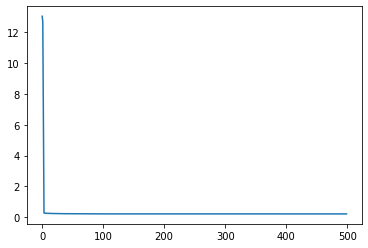

In [66]:
plt.plot(mean_history)